<a href="https://colab.research.google.com/github/GSP31/GSP31/blob/main/Word_Cloud/Topics_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUIZ-2**

# 1. Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import spacy
from wordcloud import WordCloud

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Code to read csv file into colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
data = drive.CreateFile({'id':'1EMWULuA4OdrzsC3tFvEowe-nosBniFYg'}) # replace the id with id of file you want to access
data.GetContentFile('india-news-headlines.csv')

2. Reading dataset Dataset info

In [ ]:
df = pd.read_csv("india-news-headlines.csv", dtype={'publish_date': object})

In [ ]:
df['publish_month'] = df.publish_date.str[:6]
df['publish_year'] = df.publish_date.str[:4]
df['publish_month_only'] = df.publish_date.str[4:6]
df['publish_day_only'] = df.publish_date.str[6:8]

df['dt_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df['dt_month'] = pd.to_datetime(df['publish_month'], format='%Y%m')

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735346 entries, 0 to 2735345
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   publish_date        object        
 1   headline_category   object        
 2   headline_text       object        
 3   publish_month       object        
 4   publish_year        object        
 5   publish_month_only  object        
 6   publish_day_only    object        
 7   dt_date             datetime64[ns]
 8   dt_month            datetime64[ns]
dtypes: datetime64[ns](2), object(7)
memory usage: 187.8+ MB
None


In [ ]:
import matplotlib.pyplot as plt

['bengaluru', 'delhi', 'patna', 'ahmedabad', 'thiruvananthapuram', 'chandigarh', 'mumbai', 'pune', 'kolkata', 'lucknow', 'hyderabad', 'nagpur', 'chennai', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru', 'mysuru', 'rajkot', 'surat', 'vadodara', 'allahabad', 'kanpur', 'varanasi', 'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'banglore', 'gurgaon', 'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode', 'bhopal', 'nashik', 'raipur', 'aurangabad', 'visakhapatnam', 'kolhapur', 'trichy', 'puducherry', 'bareilly', 'dehradun', 'meerut', 'agra', 'vijayawada', 'jamshedpur', 'amritsar', 'cuttack', 'imphal', 'jind', 'shillong', 'shimla', 'agartala', 'jammu', 'faridabad', 'rajahmundry', 'salem', 'srinagar', 'erode', 'ghaziabad', 'itanagar', 'ajmer', 'gaya', 'kohima', 'jodhpur', 'udaipur', 'amaravati']


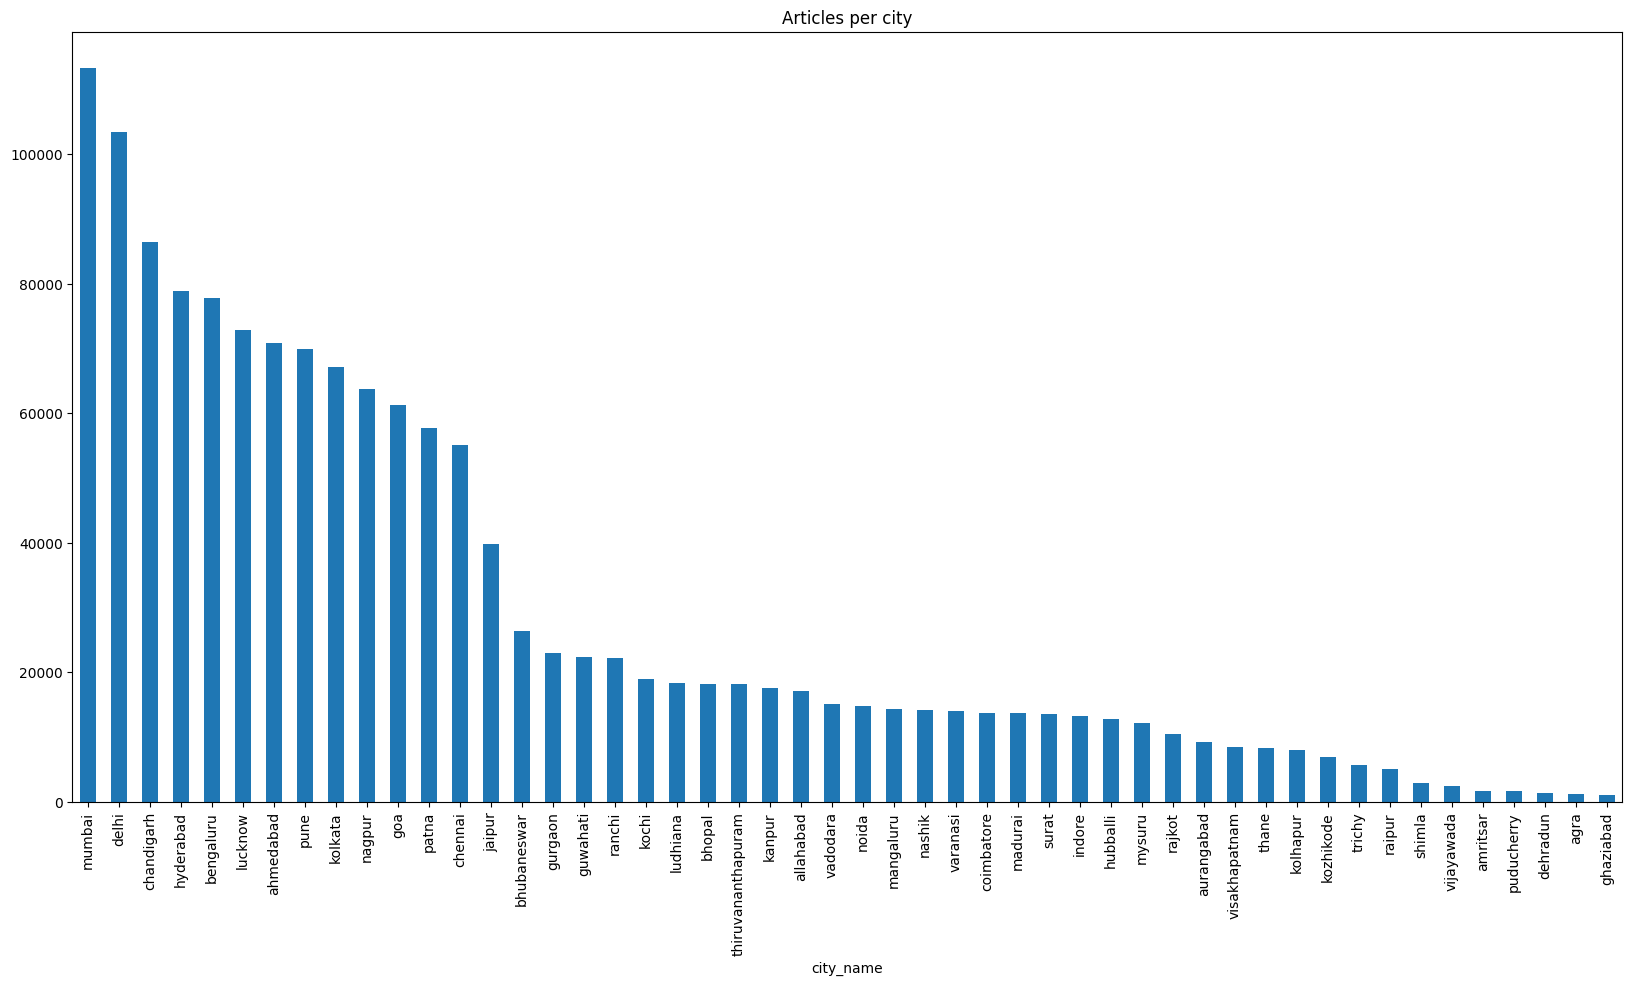

In [ ]:
# city slice plotting

df_city = df[df['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
df_city['city_name'] = df_city.headline_category.str[5:]

city_list=df_city['city_name'].unique().tolist()
print (city_list)

# bar plot of all

grp_city = df_city.groupby(['city_name'])['headline_text'].count().nlargest(50)
ts = pd.Series(grp_city)
ts.plot(kind='bar', figsize=(20,10),title='Articles per city')
plt.show()

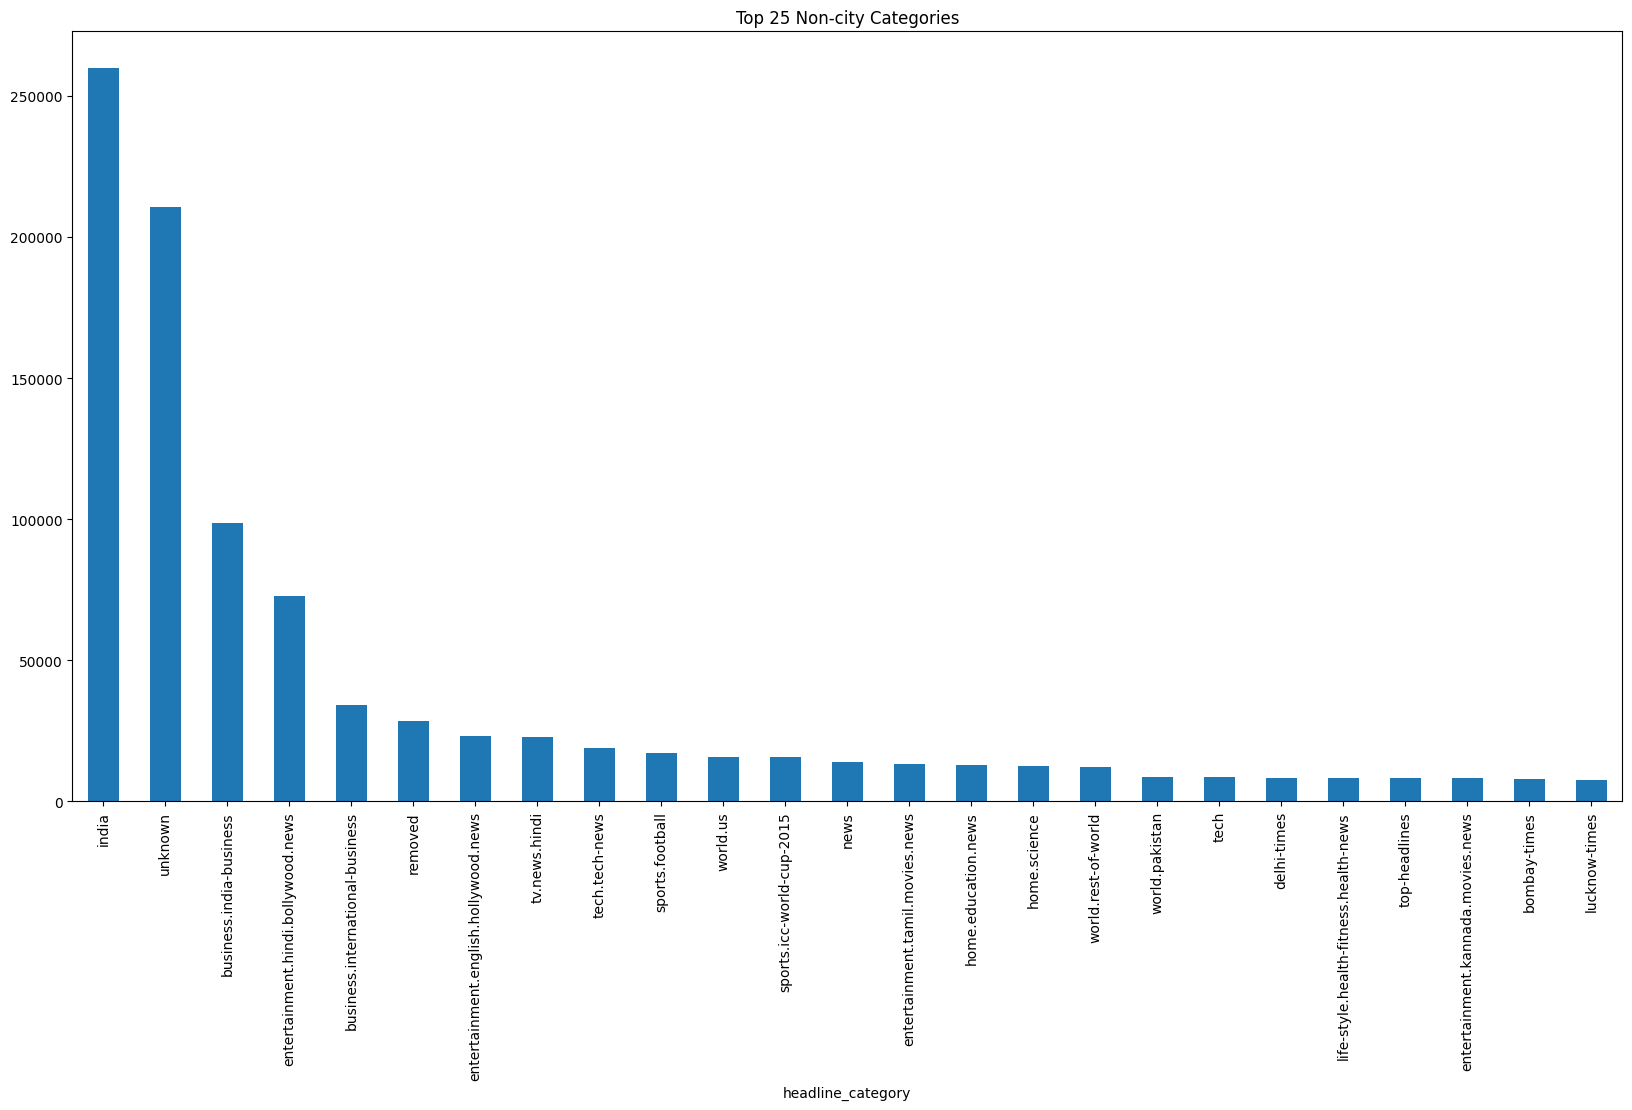

In [ ]:
# non city related categories

df_non_city = df[~df['headline_category'].str.contains('city', regex=False)]
grp_non_city = df_non_city.groupby(['headline_category'])['headline_text'].count().nlargest(25)

ts = pd.Series(grp_non_city)
ts.plot(kind='bar', figsize=(20,10),title='Top 25 Non-city Categories')
plt.show()

# **TOP 10 TOPICS**

In [ ]:
data = pd.read_csv("india-news-headlines.csv")

In [ ]:
data=data[['publish_date','headline_text']].drop_duplicates()
data['publish_date']=pd.to_datetime(data['publish_date'],format="%Y%M%d")
data['year']=data['publish_date'].dt.year


In [ ]:
#Get imp words by year
import sklearn.feature_extraction.text as text

def get_imp(bow, mf, ngram):
    tfidf = text.CountVectorizer(max_features=mf, stop_words='english', ngram_range=(ngram, ngram))
    matrix = tfidf.fit_transform(bow)
    return pd.Series(np.array(matrix.sum(axis=0))[0], index=tfidf.get_feature_names_()).sort_values(ascending=False).head(100)


In [ ]:
import sklearn.feature_extraction.text as text

def get_imp(data, mf=5000, ngram=1):
    bow = data['headline_text'].tolist()
    tfidf = text.CountVectorizer(max_features=mf, stop_words='english', ngram_range=(ngram, ngram))
    matrix = tfidf.fit_transform(bow)
    feature_names = [feature for feature, index in sorted(tfidf.vocabulary_.items(), key=lambda x: x[1])]
    return pd.Series(np.array(matrix.sum(axis=0))[0], index=feature_names).sort_values(ascending=False).head(100)

bow = data['headline_text'].tolist()
total_data = get_imp(data, mf=5000, ngram=1)
total_data_bigram = get_imp(data, mf=5000, ngram=2)
total_data_trigram = get_imp(data, mf=5000, ngram=3)

imp_terms_unigram = {y: get_imp(data[data['year']==y], mf=5000, ngram=1) for y in data['year'].unique()}
imp_terms_bigram = {y: get_imp(data[data['year']==y], mf=5000, ngram=2) for y in data['year'].unique()}
imp_terms_trigram = {y: get_imp(data[data['year']==y], mf=5000, ngram=3) for y in data['year'].unique()}

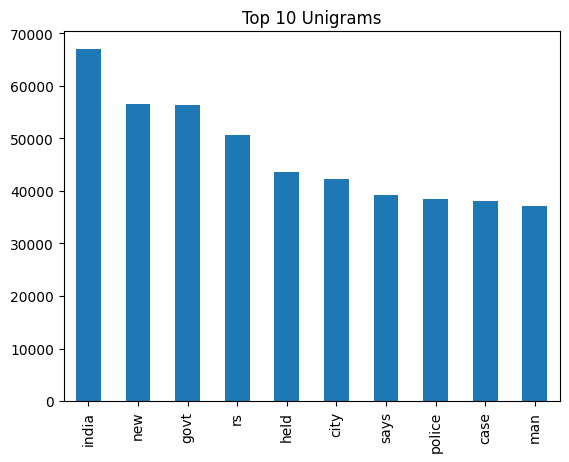

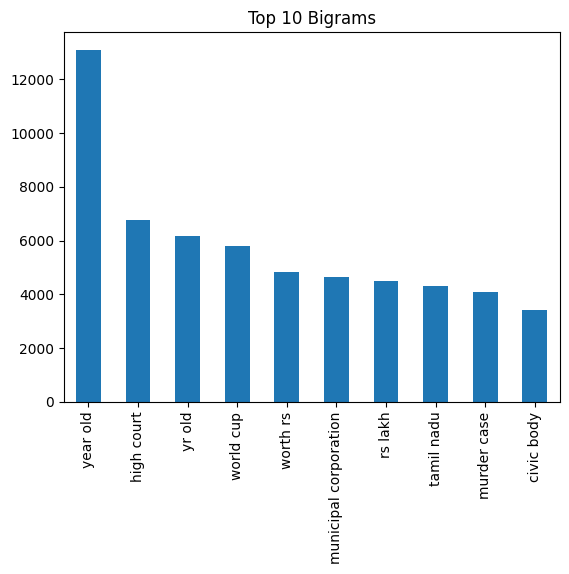

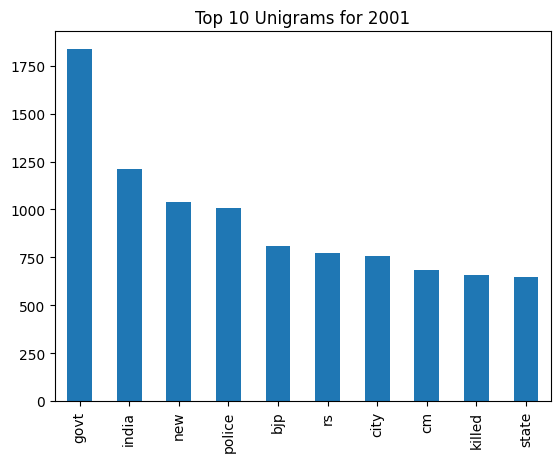

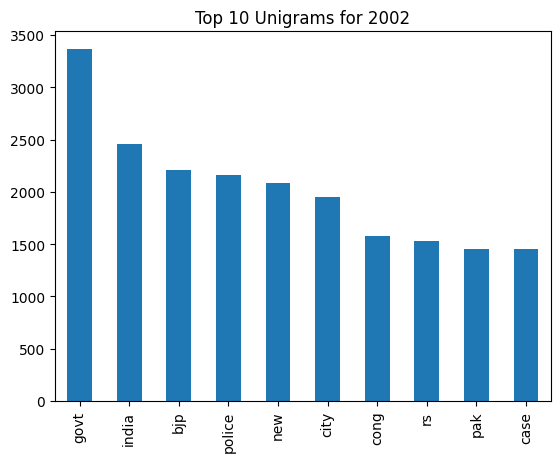

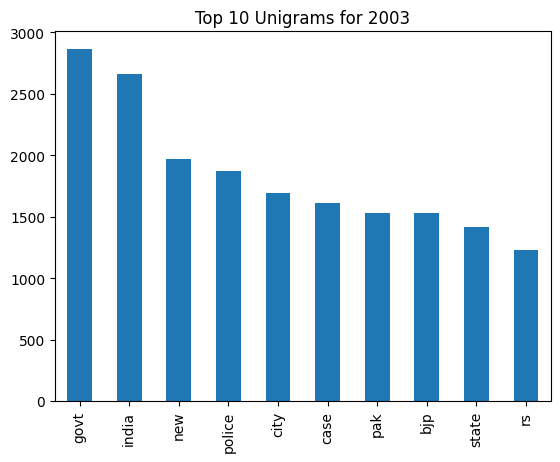

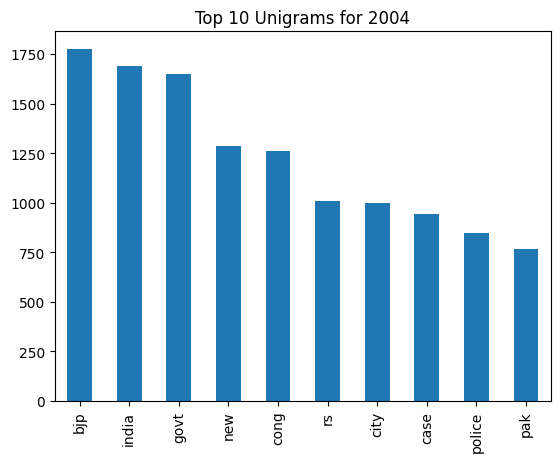

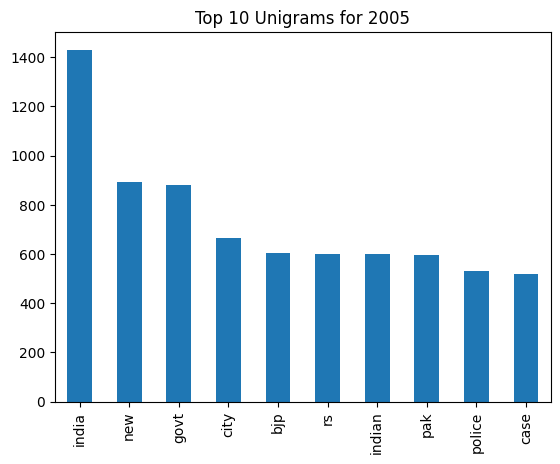

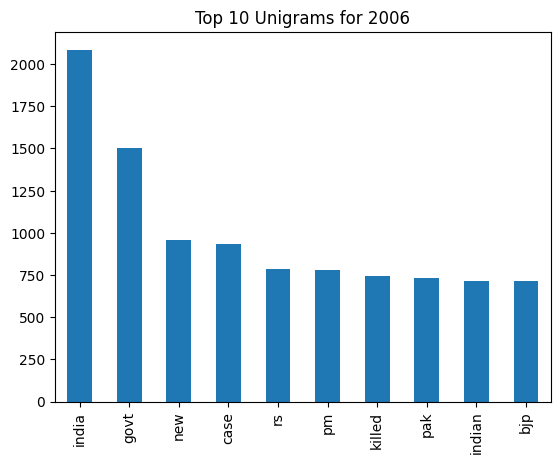

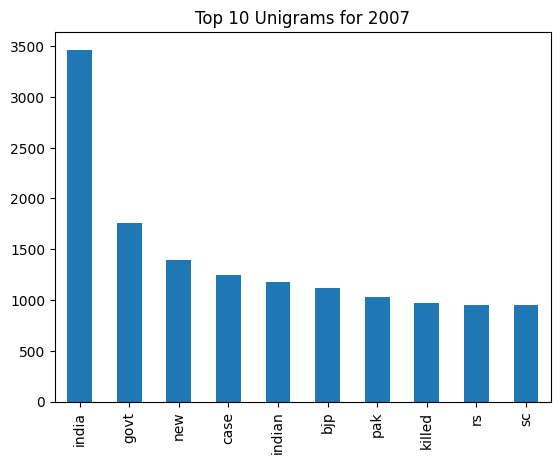

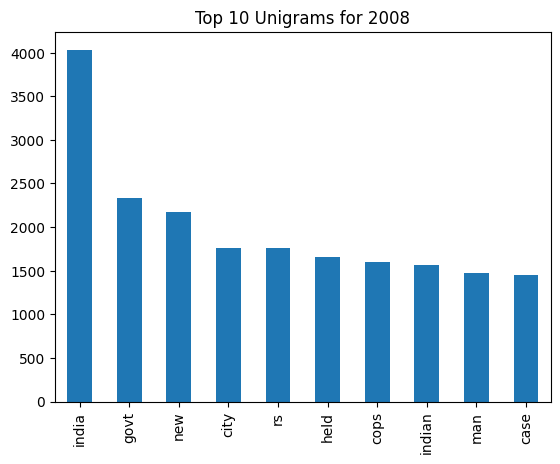

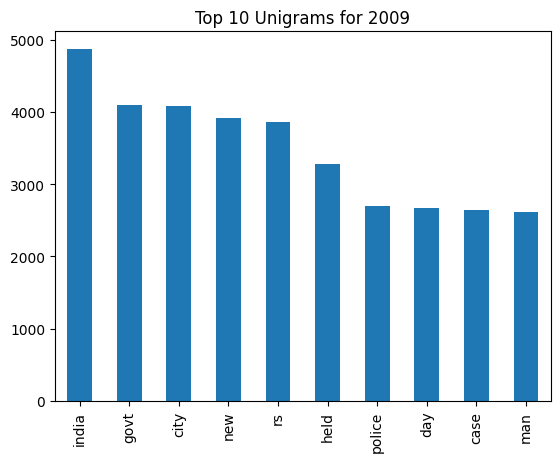

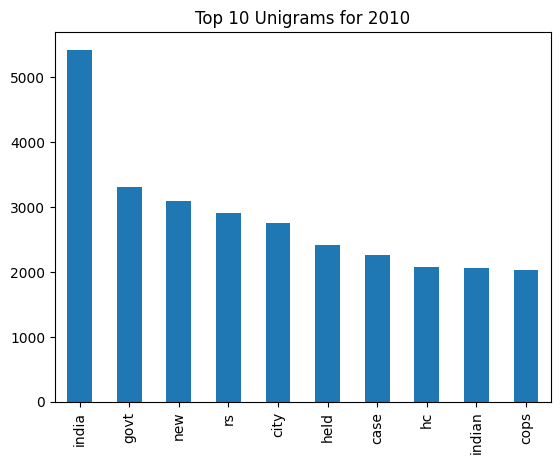

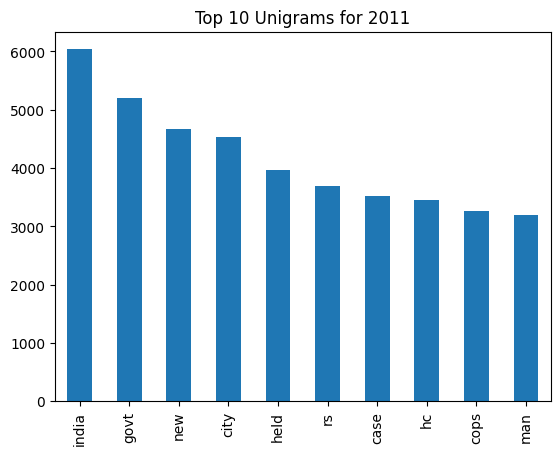

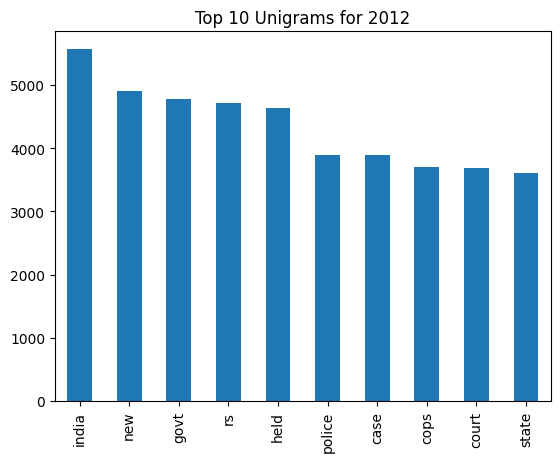

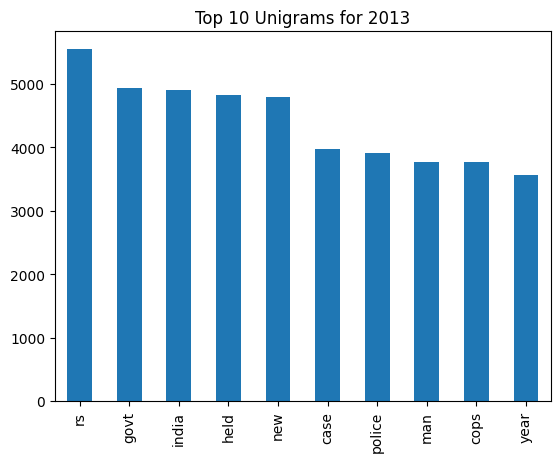

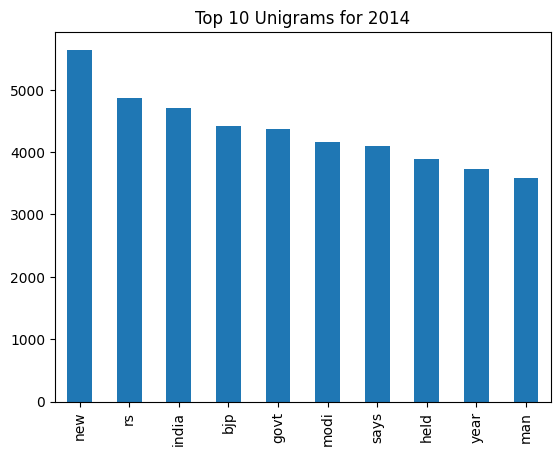

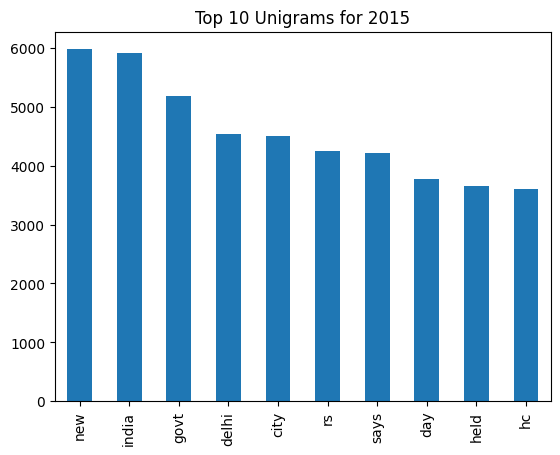

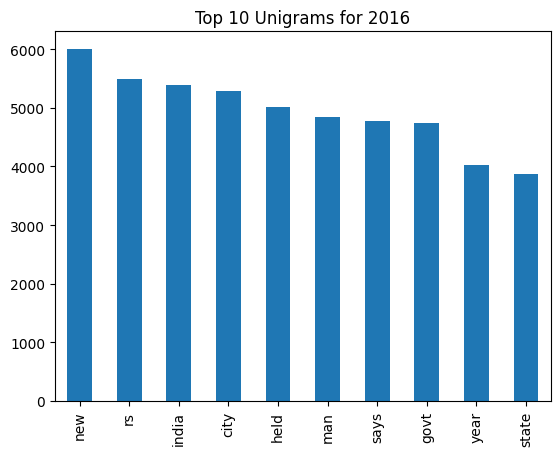

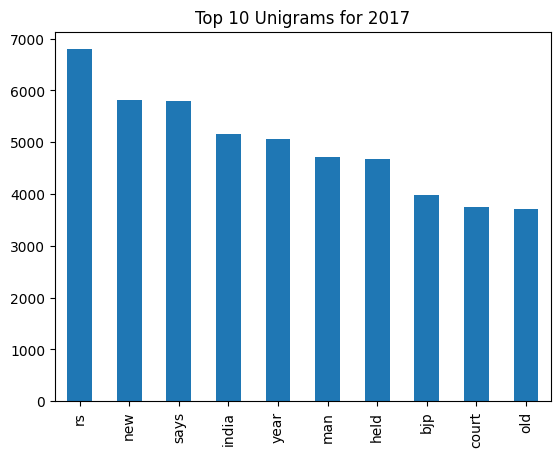

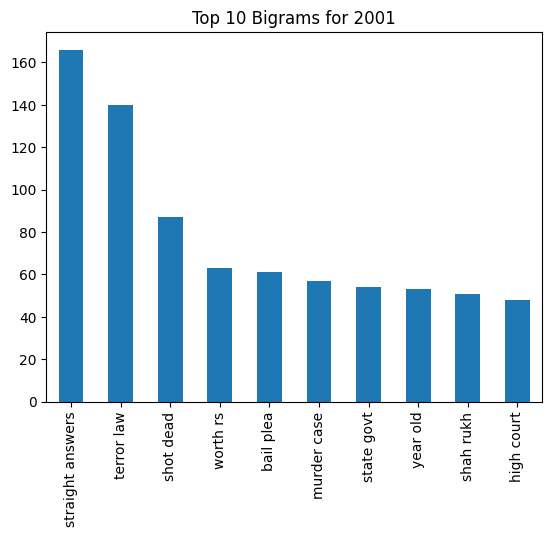

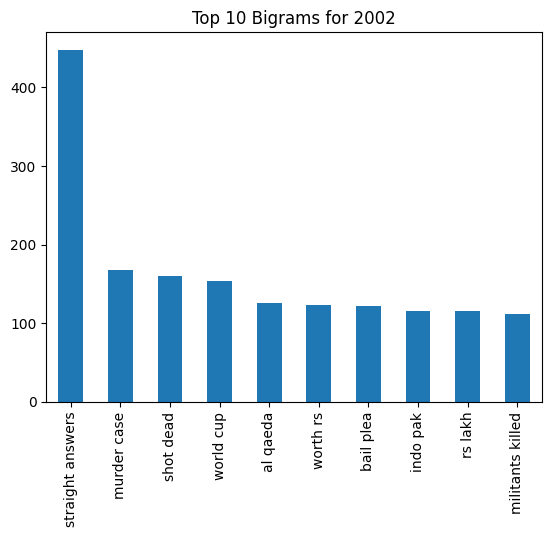

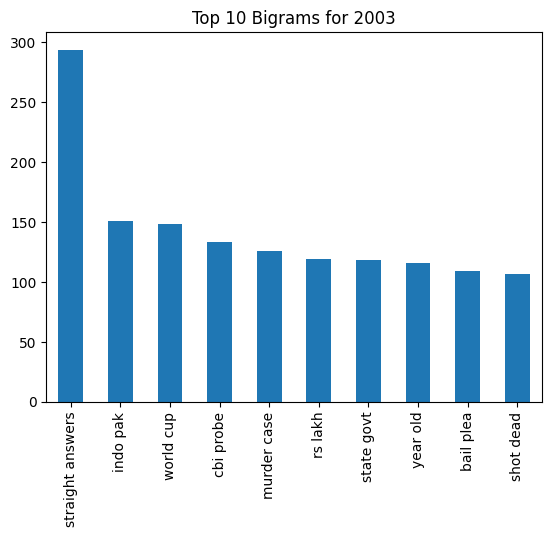

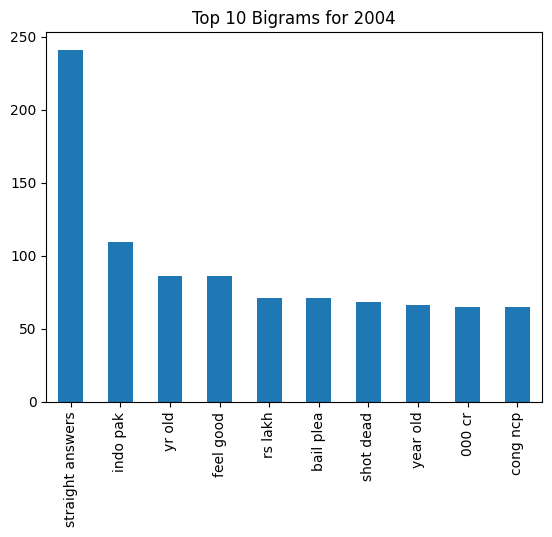

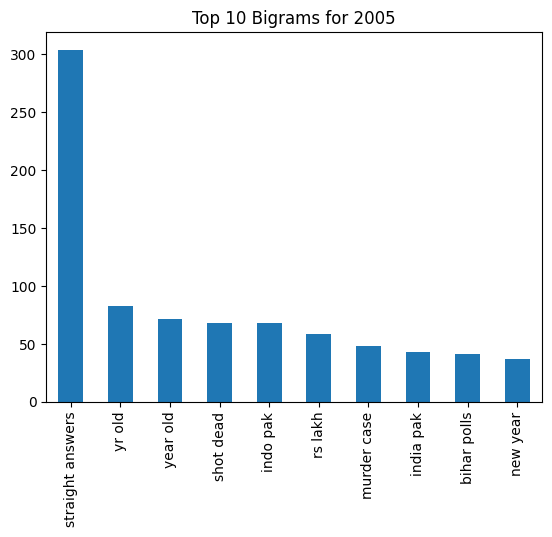

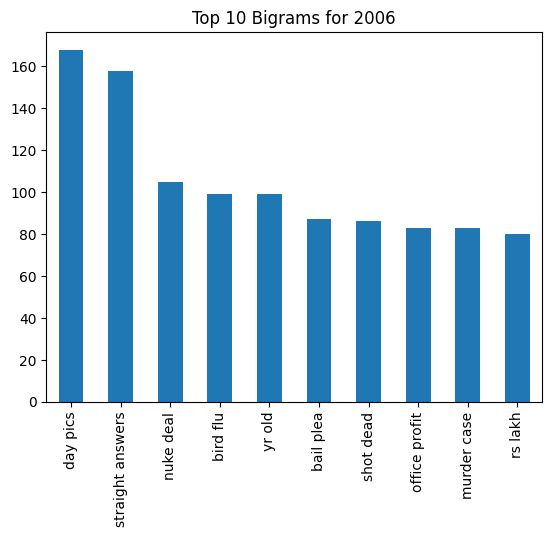

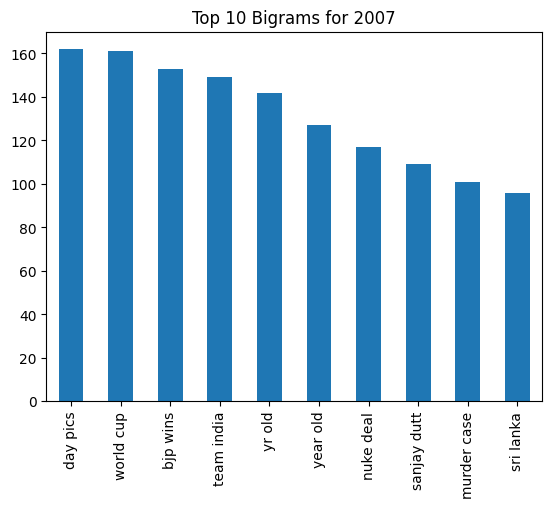

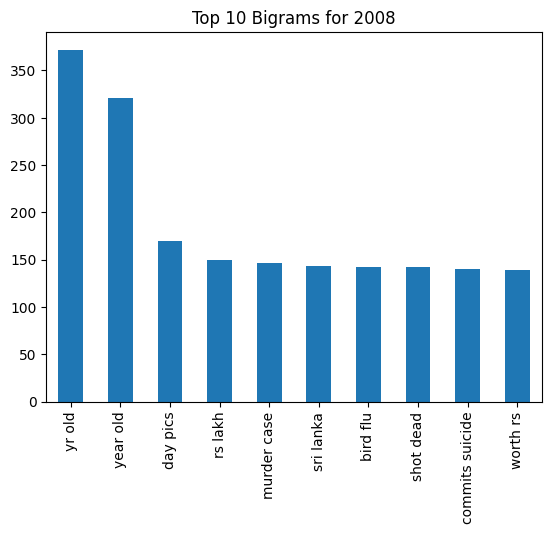

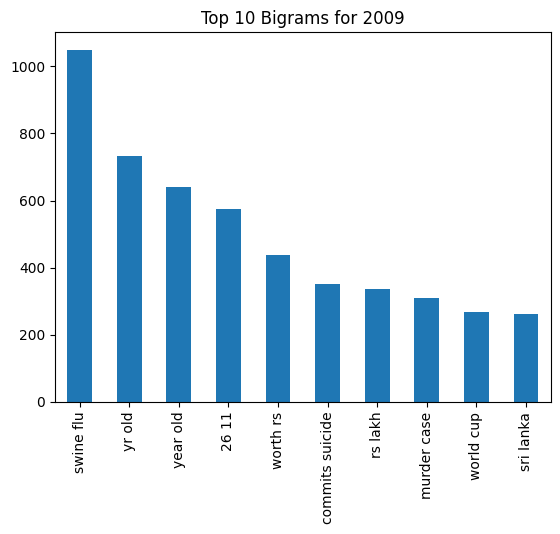

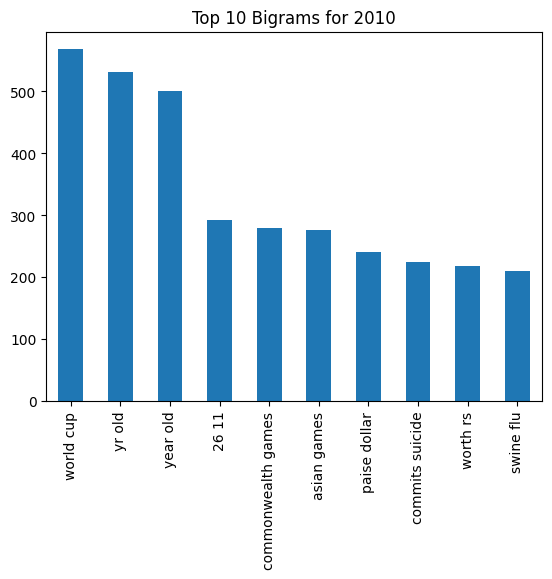

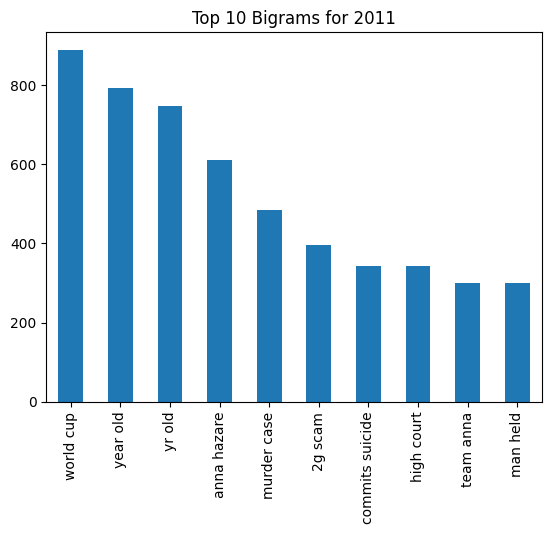

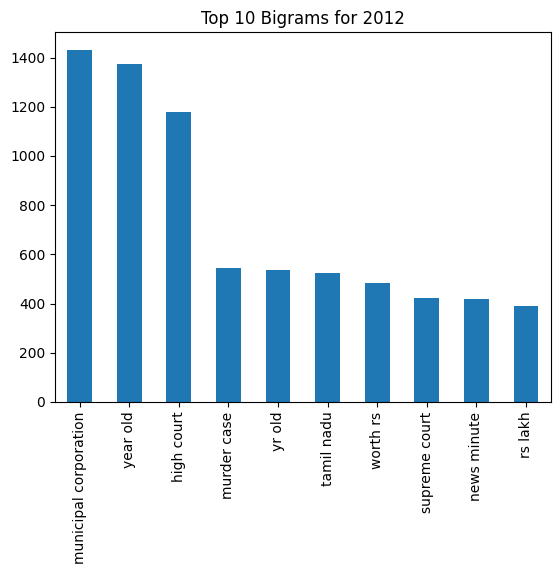

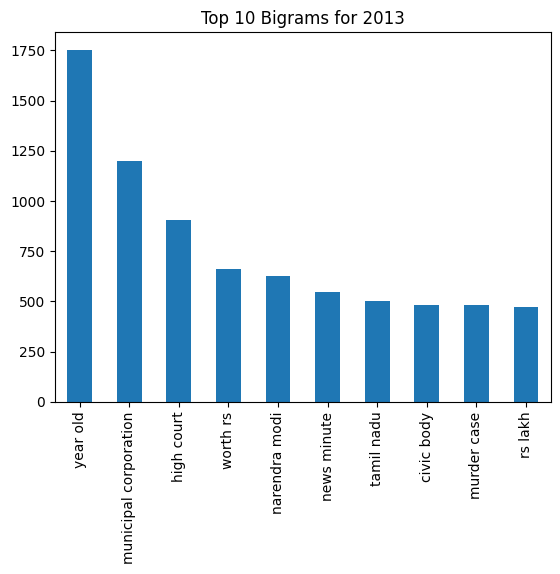

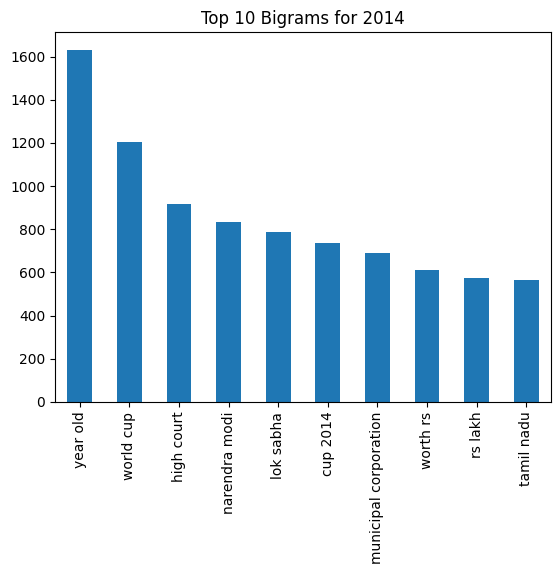

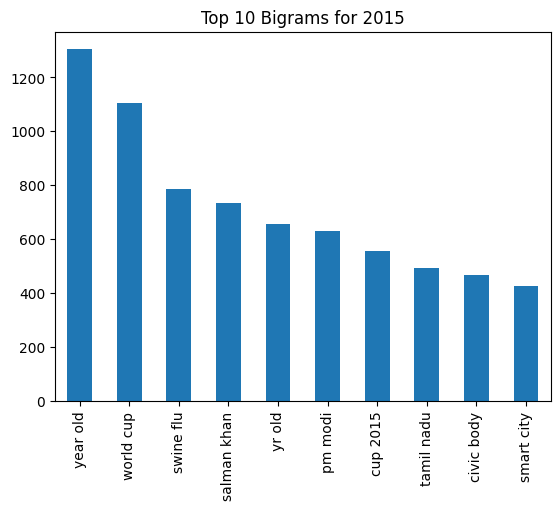

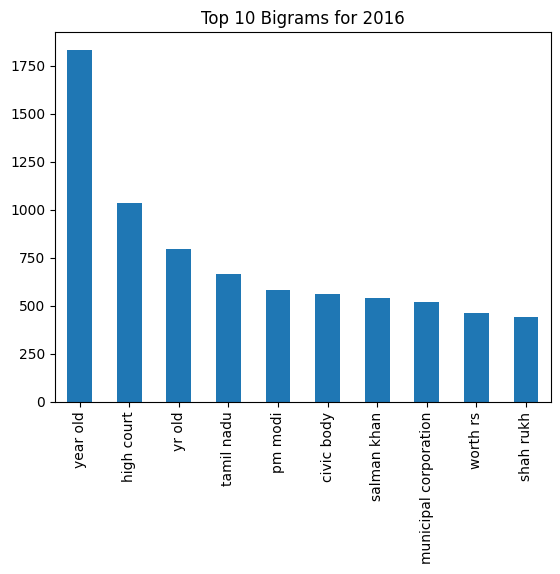

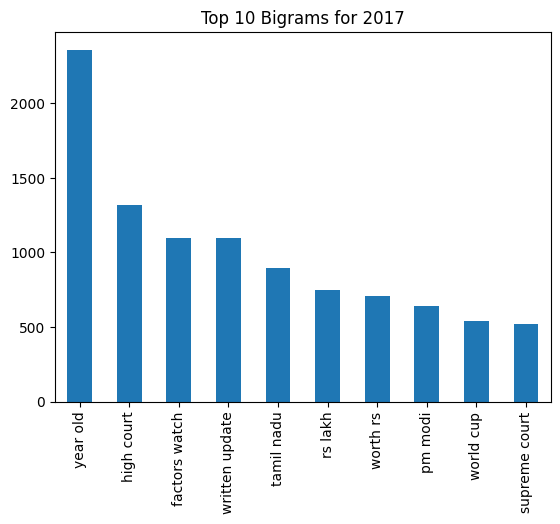

In [ ]:
import matplotlib.pyplot as plt

# create bar plots of the top 10 unigrams and bigrams for the entire dataset
total_data.head(10).plot(kind='bar', title='Top 10 Unigrams')
plt.show()

total_data_bigram.head(10).plot(kind='bar', title='Top 10 Bigrams')
plt.show()

# create bar plots of the top 10 unigrams and bigrams for each year
for year, imp_terms in imp_terms_unigram.items():
    imp_terms.head(10).plot(kind='bar', title=f'Top 10 Unigrams for {year}')
    plt.show()

for year, imp_terms in imp_terms_bigram.items():
    imp_terms.head(10).plot(kind='bar', title=f'Top 10 Bigrams for {year}')
    plt.show()

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk import FreqDist


In [ ]:
data.head()

publish_date                                      headline_text  year
0 2001-01-01 00:01:00  win over cena satisfying but defeating underta...  2001
1 2001-01-02 00:01:00                                        Raju Chacha  2001
2 2001-01-02 00:01:00  Status quo will not be disturbed at Ayodhya; s...  2001
3 2001-01-02 00:01:00                Fissures in Hurriyat over Pak visit  2001
4 2001-01-02 00:01:00              America's unwanted heading for India?  2001

In [ ]:
df_city.head()

publish_date headline_category  \
129     20010104    city.bengaluru   
130     20010104    city.bengaluru   
131     20010104        city.delhi   
132     20010104        city.patna   
643     20010110        city.patna   

                                      headline_text publish_month  \
129                         He's not so inscrutable        200101   
130             Three in race for chief secy's post        200101   
131                          DPCC stages Nyay rally        200101   
132  Druggists' stir leads to shortage of medicines        200101   
643        Fend for yourselves; Pande tells doctors        200101   

    publish_year publish_month_only publish_day_only    dt_date   dt_month  \
129         2001                 01               04 2001-01-04 2001-01-01   
130         2001                 01               04 2001-01-04 2001-01-01   
131         2001                 01               04 2001-01-04 2001-01-01   
132         2001                 01               04 2001-01-04 2001-01-01   
643         2001                 01               10 2001-01-10 2001-01-01   

     city_name  
129  bengaluru  
130  bengaluru  
131      delhi  
132      patna  
643      patna

df_city = df[df['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
df_city['city_name'] = df_city.headline_category.str[5:]

city_list=df_city['city_name'].unique().tolist()
print (city_list)

# bar plot of all

grp_city = df_city.groupby(['city_name'])['headline_text'].count().nlargest(50)
ts = pd.Series(grp_city)
ts.plot(kind='bar', figsize=(20,10),title='Articles per city')
plt.show()

In [ ]:
def get_top_ngrams(city_name, n=10):
    # get the headlines for the given city_name
    city_headlines = df_city[df_city['city_name'] == city_name]['headline_text']

    # tokenize the headlines and create a frequency distribution of words
    tokens = word_tokenize(' '.join(city_headlines).lower())
    word_freq = Counter(tokens)

    # get the top n themes
    top_themes = [word for word, freq in word_freq.most_common() if len(word) > 3][:n]

    # create unigrams and bigrams
    unigrams = list(ngrams(tokens, 1))
    bigrams = list(ngrams(tokens, 2))

    # create frequency distributions of unigrams and bigrams
    unigram_freq = Counter(unigrams)
    bigram_freq = Counter(bigrams)

    # get the top n unigrams and bigrams
    top_unigrams = [word for word, freq in unigram_freq.most_common() if len(word[0]) > 3][:n]
    top_bigrams = [word for word, freq in bigram_freq.most_common() if len(word[0]) > 3][:n]

    # return the top themes, unigrams, bigrams, and word frequency as a dictionary
    return {'city_name': city_name, 'top_themes': top_themes, 'top_unigrams': top_unigrams, 'top_bigrams': top_bigrams, 'word_freq': word_freq, 'unigram_freq': unigram_freq, 'bigram_freq' : bigram_freq }

In [ ]:
# create a list of dictionaries, where each dictionary contains the top 10 themes and top 10 uni and bigrams for a given city_name
top_ngrams_list = [get_top_ngrams(city_name) for city_name in df_city['city_name'].unique()]

# convert the list of dictionaries to a pandas dataframe
top_ngrams_df = pd.DataFrame(top_ngrams_list)



In [ ]:
# print the top 10 themes and top 10 uni and bigrams for each city_name
for i, row in top_ngrams_df.iterrows():
    print(row['city_name'])
    print('Top Themes:', row['top_themes'])
    print('Top Unigrams:', row['top_unigrams'])
    print('Top Bigrams:', row['top_bigrams'])
    print('\n')

bengaluru
Top Themes: ['bangalore', 'from', 'karnataka', 'with', 'bengaluru', 'govt', 'will', 'over', 'city', 'students']
Top Unigrams: [('bangalore',), ('from',), ('karnataka',), ('with',), ('bengaluru',), ('govt',), ('will',), ('over',), ('city',), ('students',)]
Top Bigrams: [('held', 'for'), ('will', 'be'), ('govt', 'to'), ('killed', 'in'), ('ends', 'life'), ('arrested', 'for'), ('bengaluru', "'s"), ('notice', 'to'), ('high', 'court'), ('case', ':')]


delhi
Top Themes: ['delhi', 'held', 'with', 'from', 'govt', 'cops', 'case', 'over', 'police', 'court']
Top Unigrams: [('delhi',), ('held',), ('with',), ('from',), ('govt',), ('cops',), ('case',), ('over',), ('police',), ('court',)]
Top Bigrams: [('held', 'for'), ('case', ':'), ('delhi', "'s"), ('arrested', 'for'), ('south', 'delhi'), ('delhi', 'police'), ('delhi', ';'), ('delhi', 'govt'), ('high', 'court'), ('killed', 'in')]


patna
Top Themes: ['bihar', 'patna', 'govt', 'from', 'nitish', 'state', 'against', 'police', 'with', 'held']

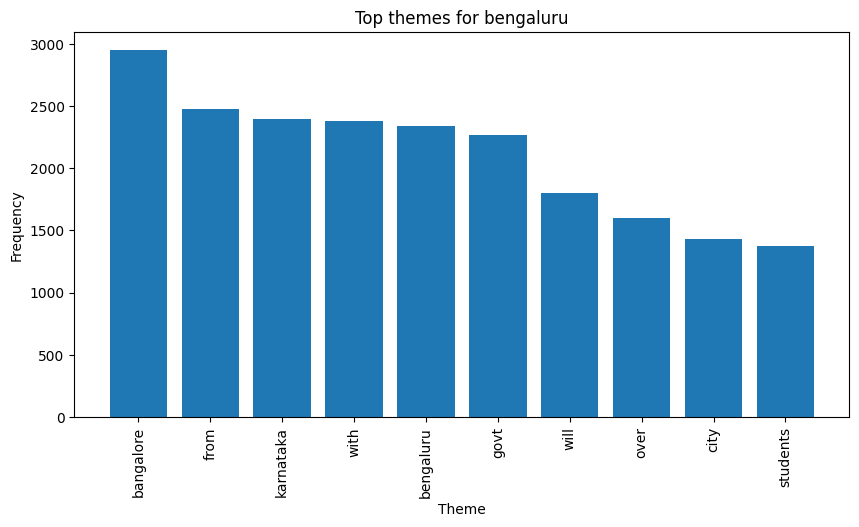

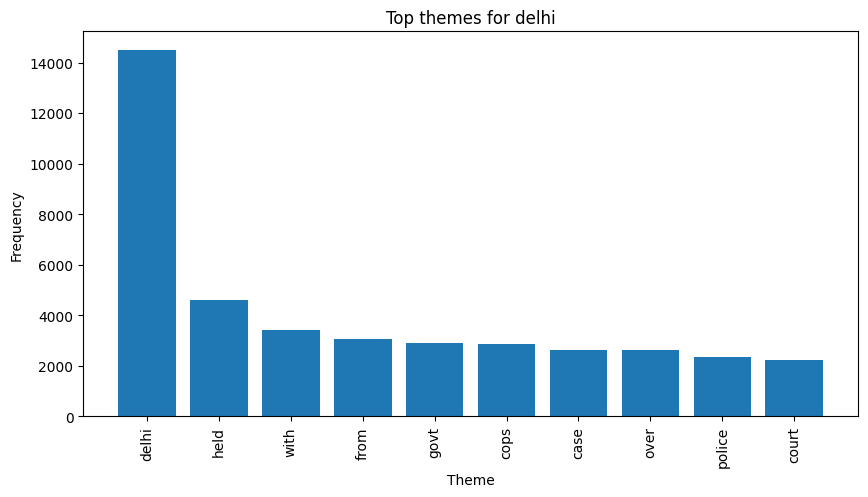

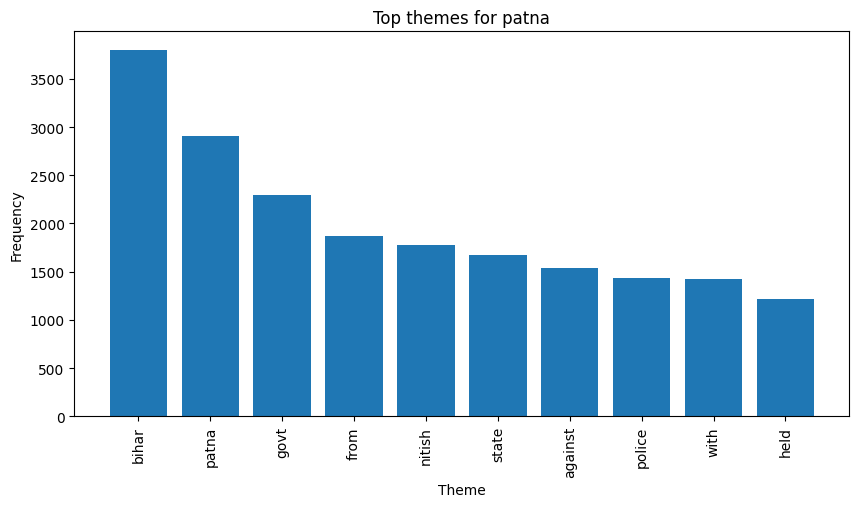

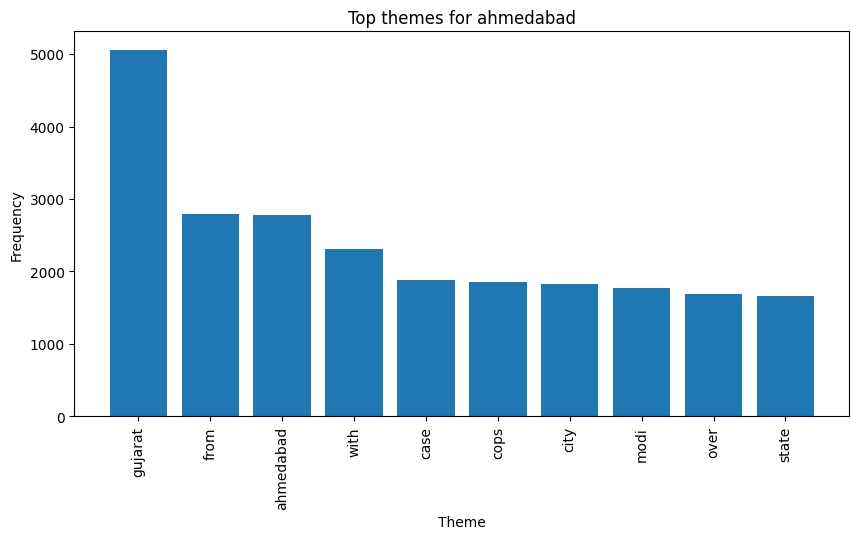

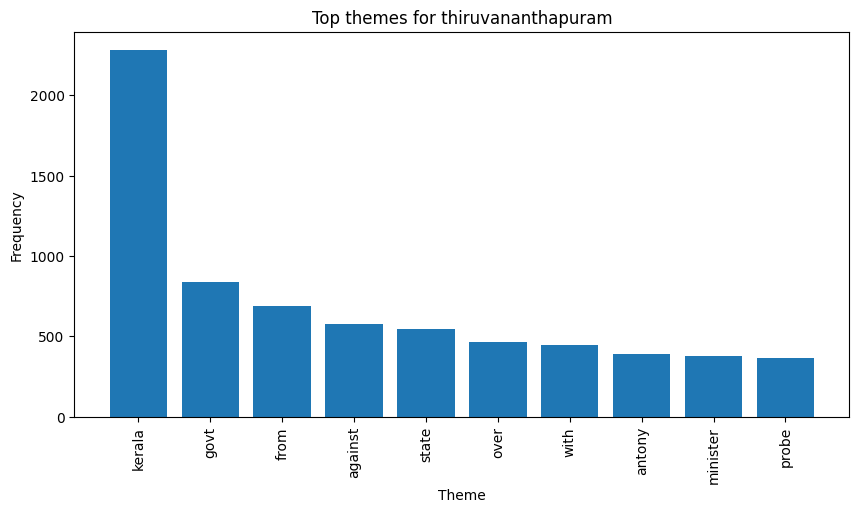

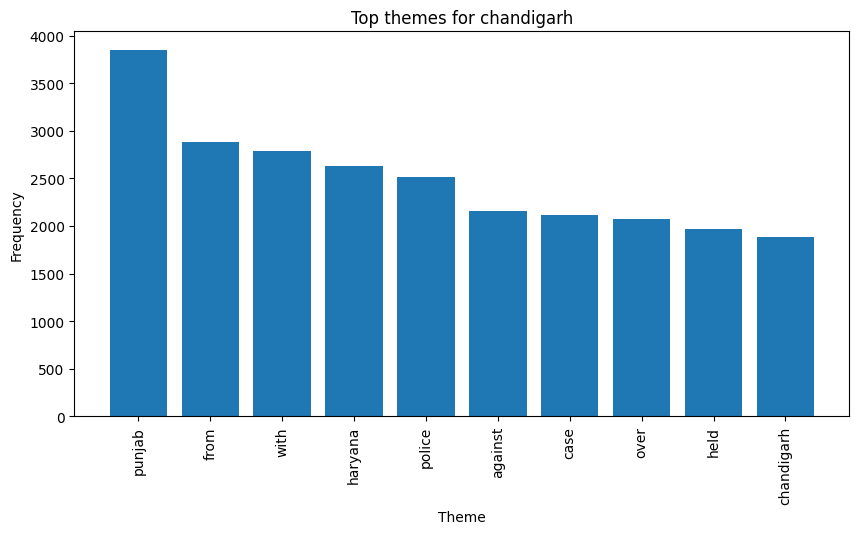

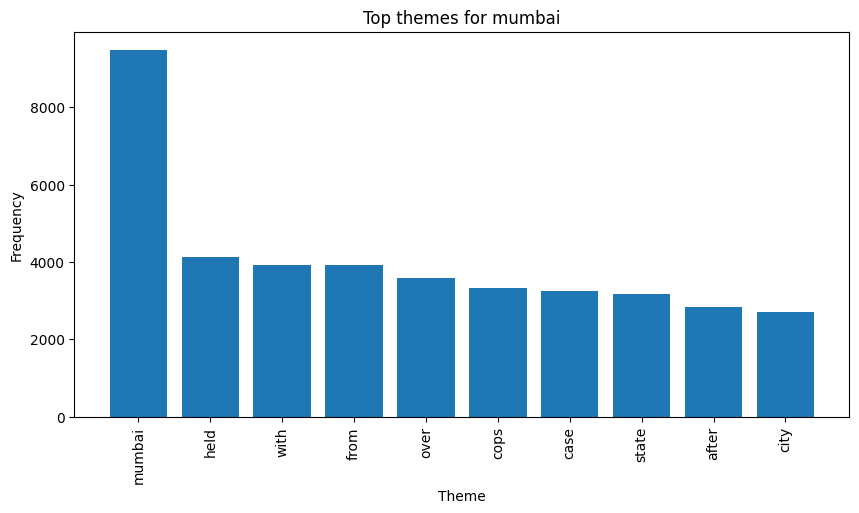

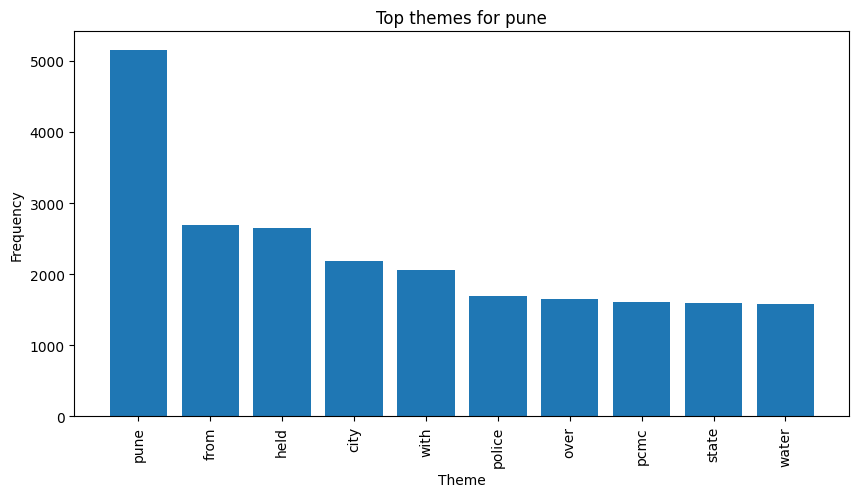

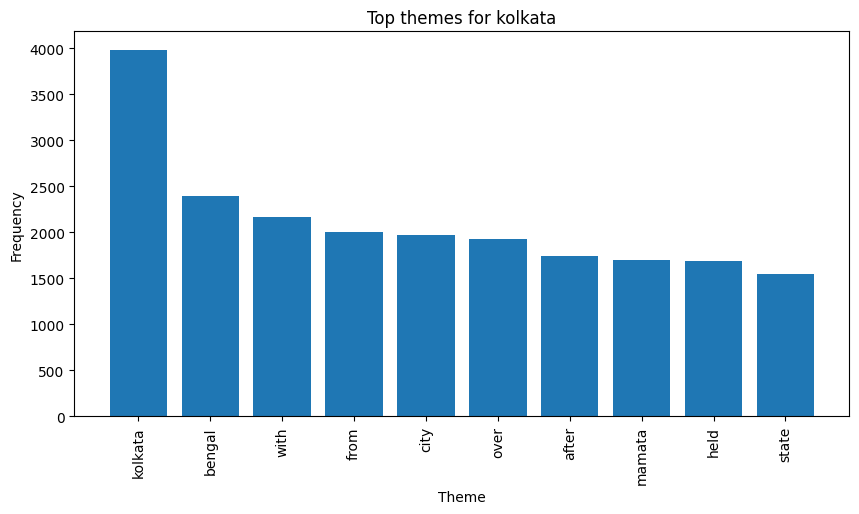

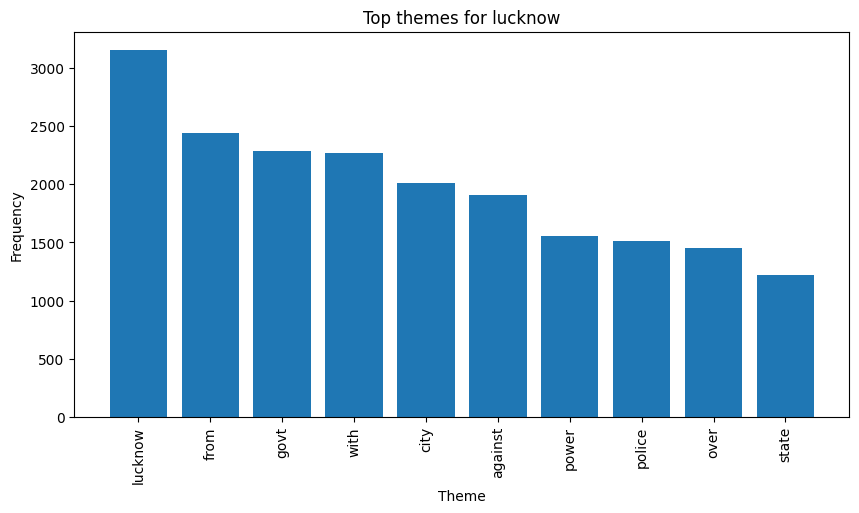

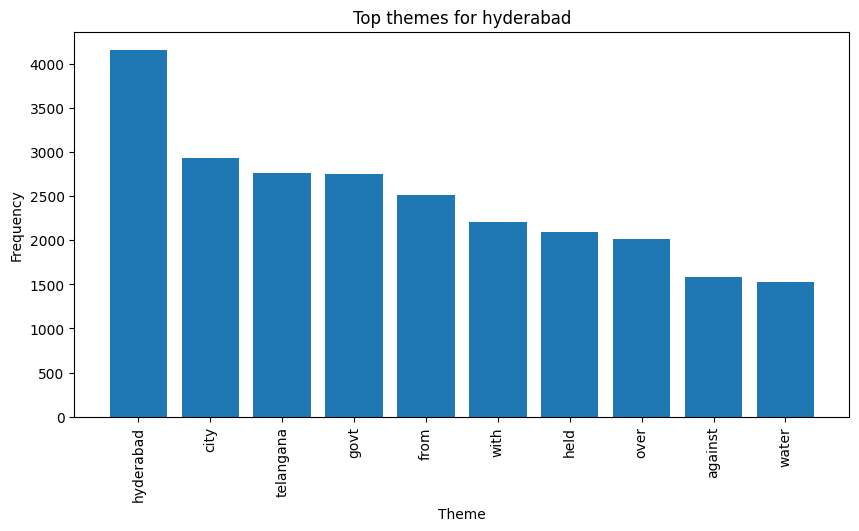

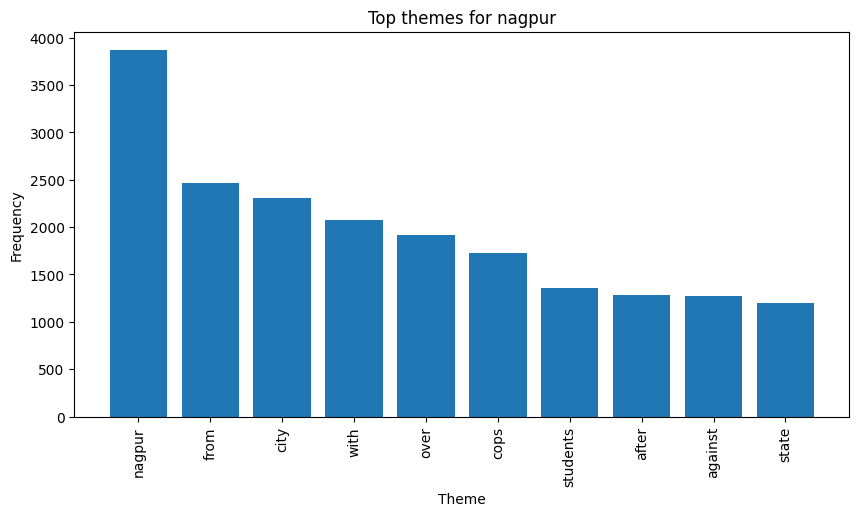

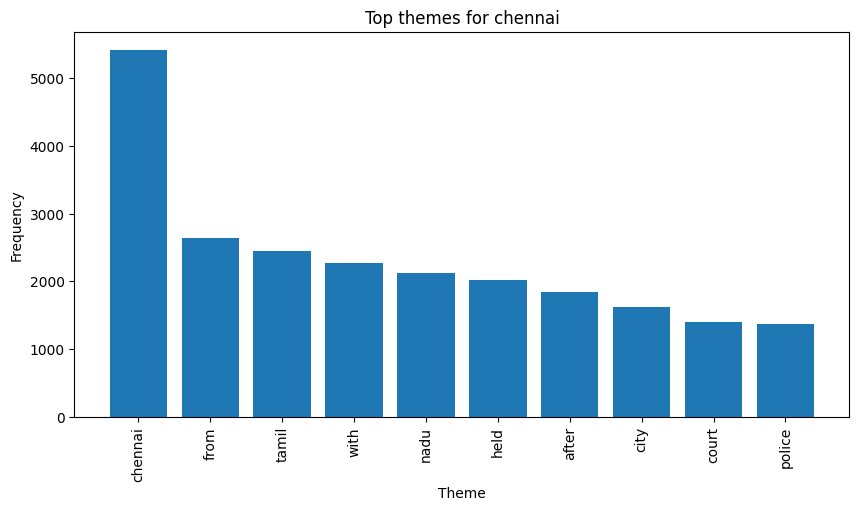

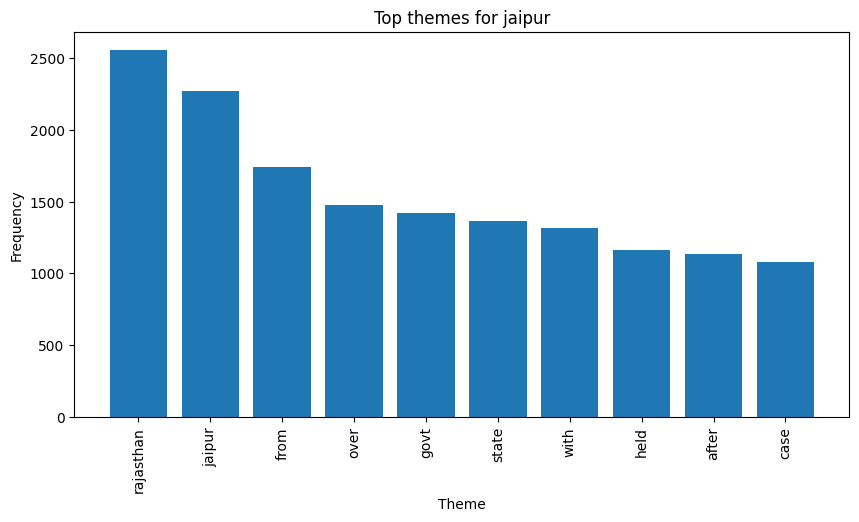

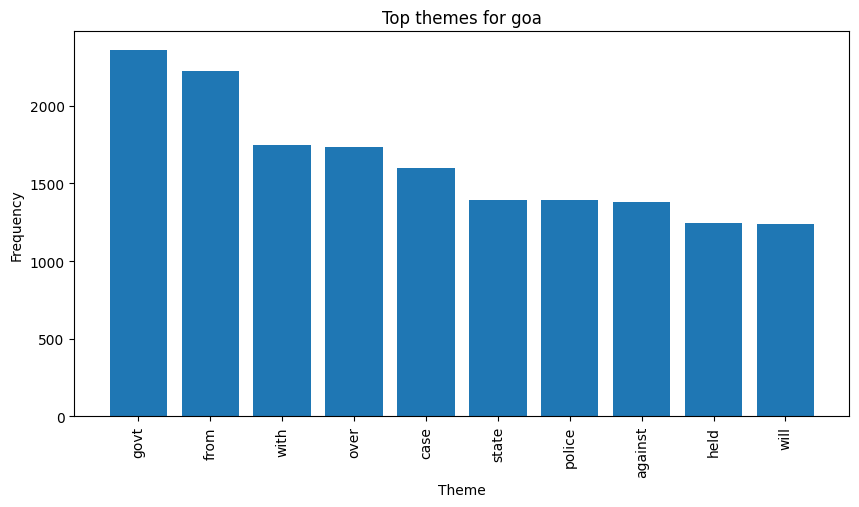

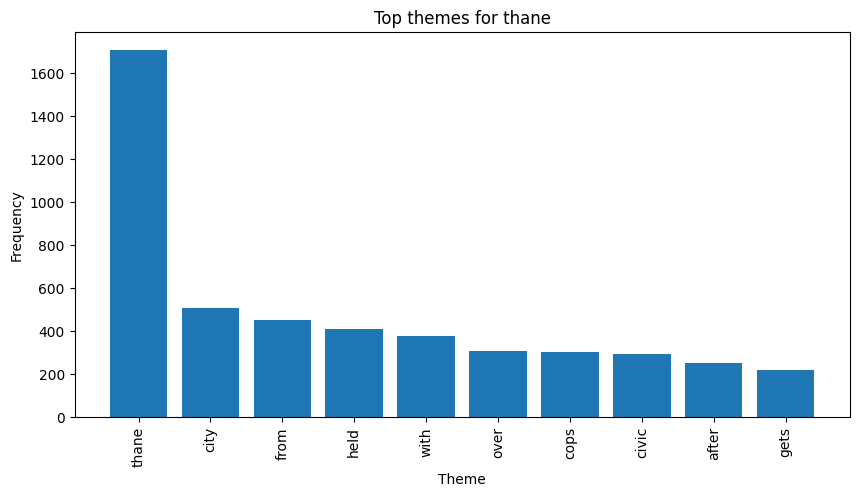

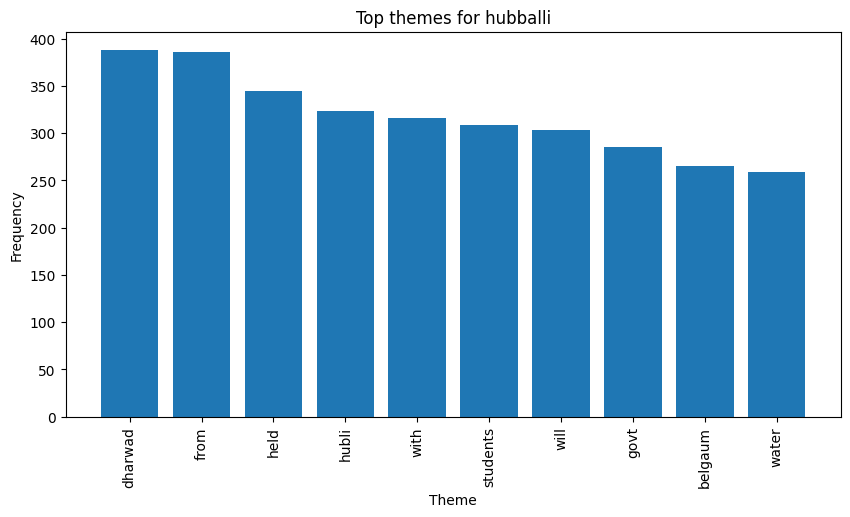

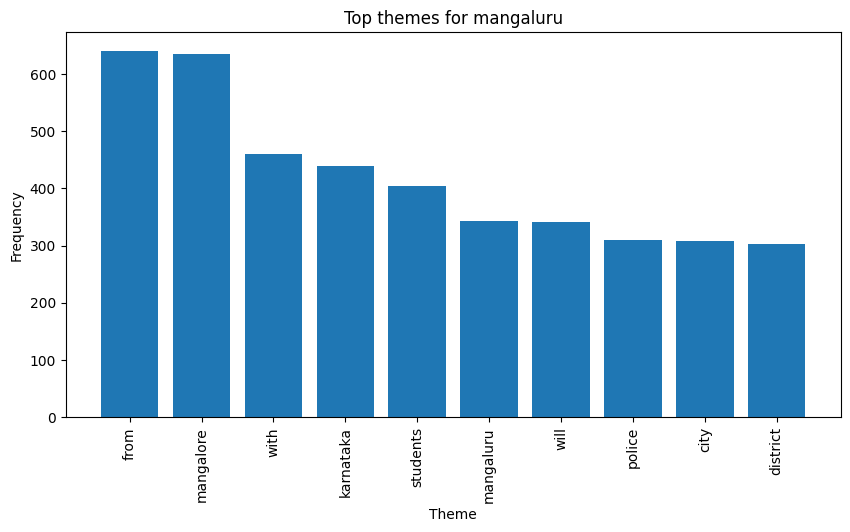

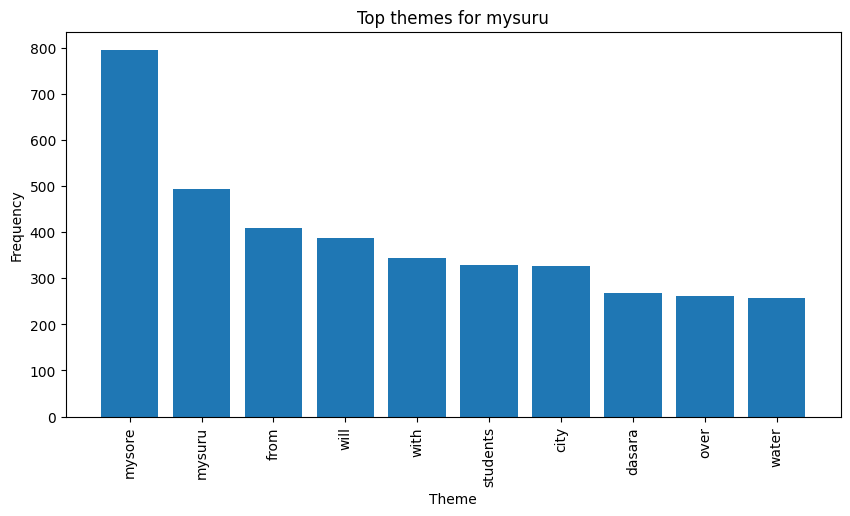

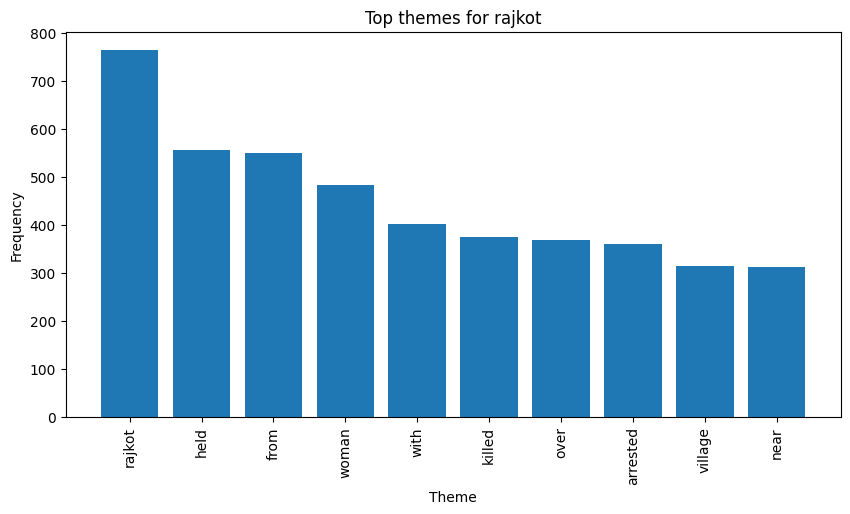

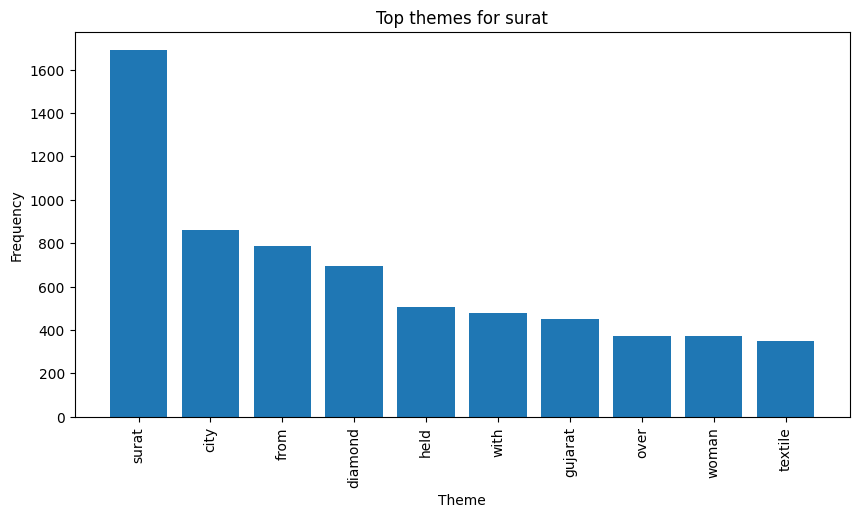

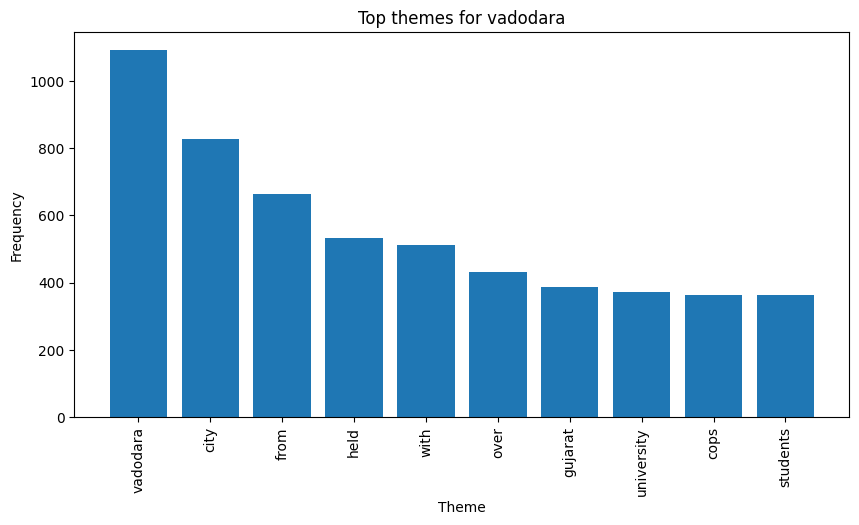

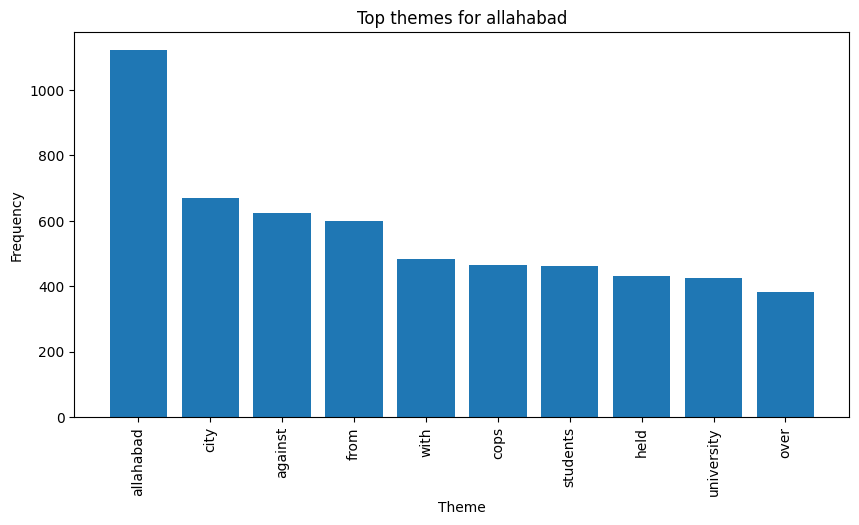

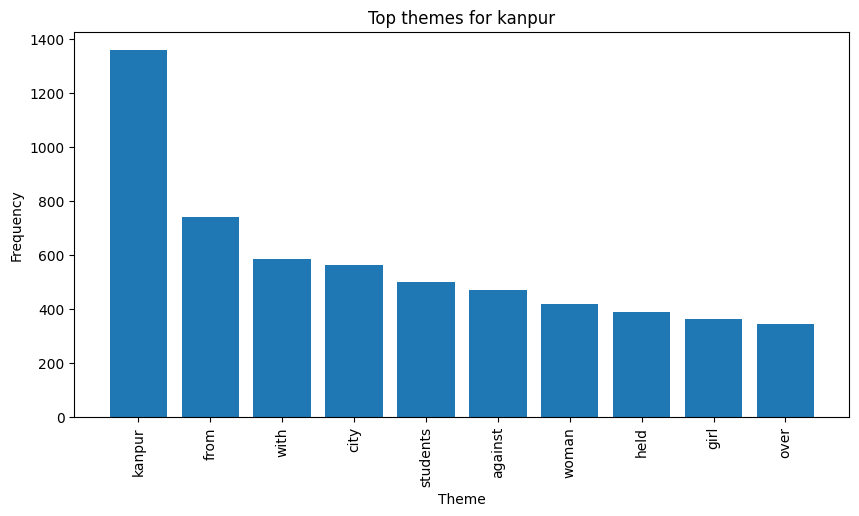

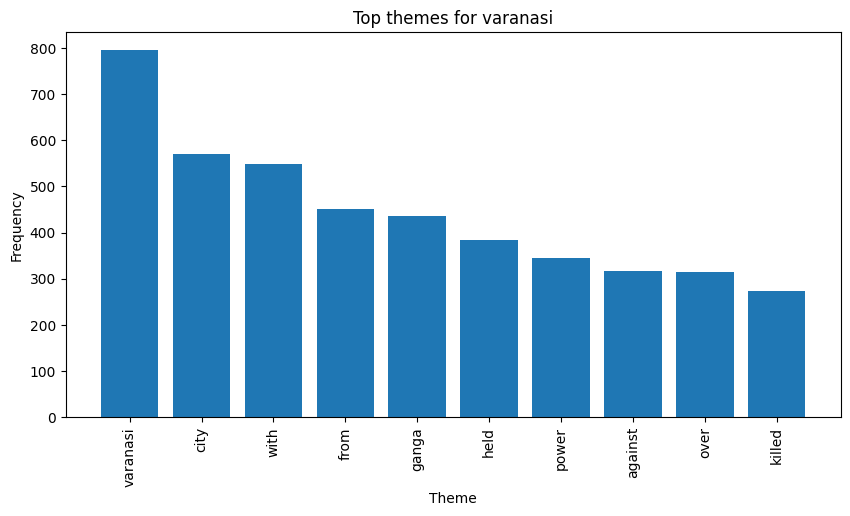

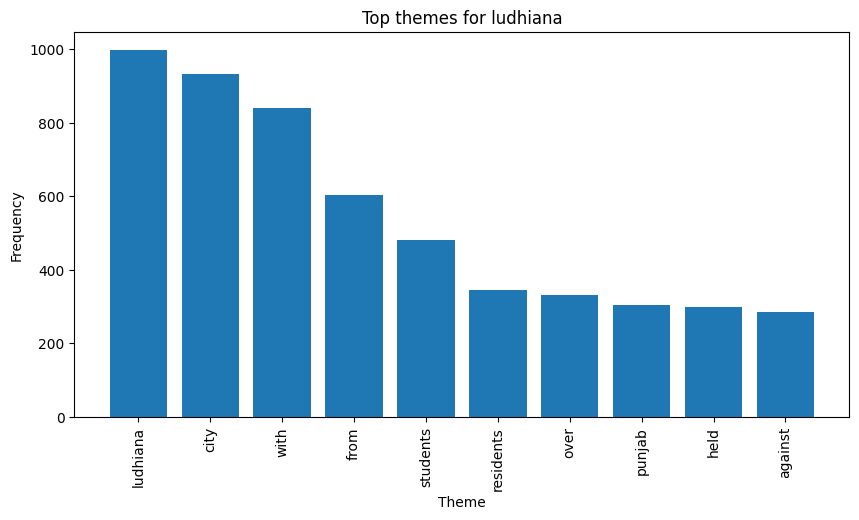

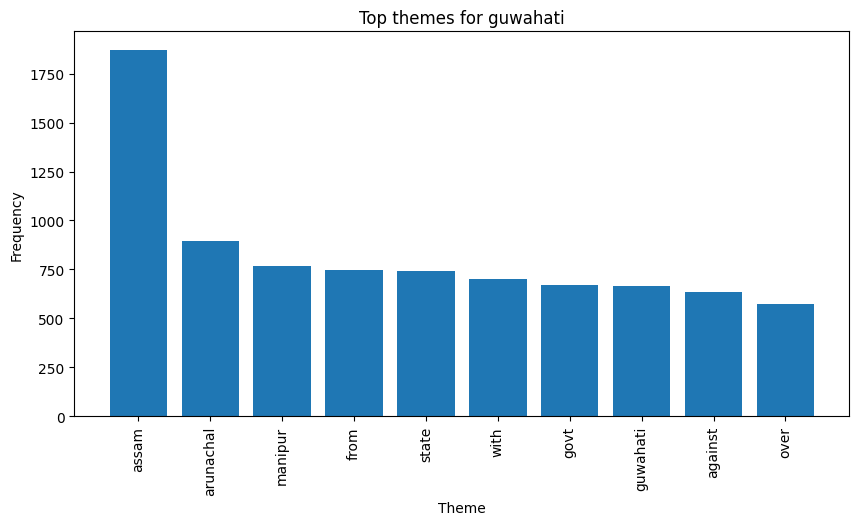

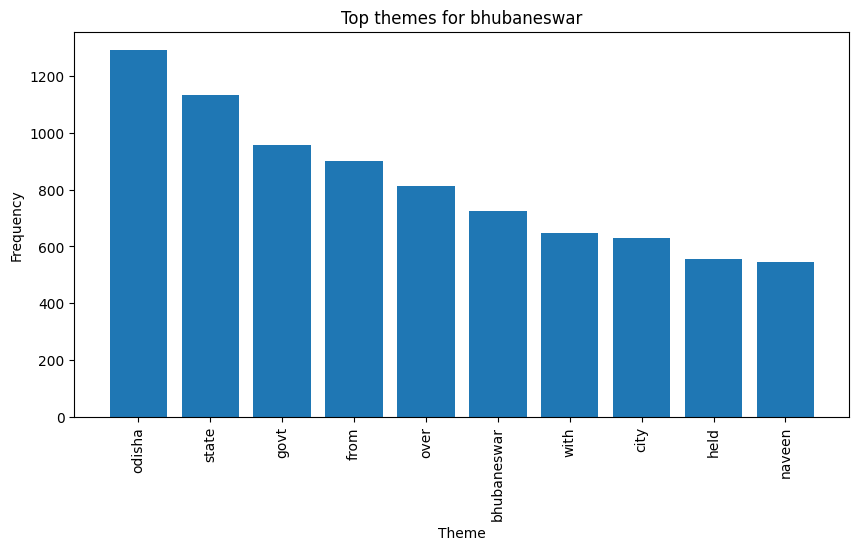

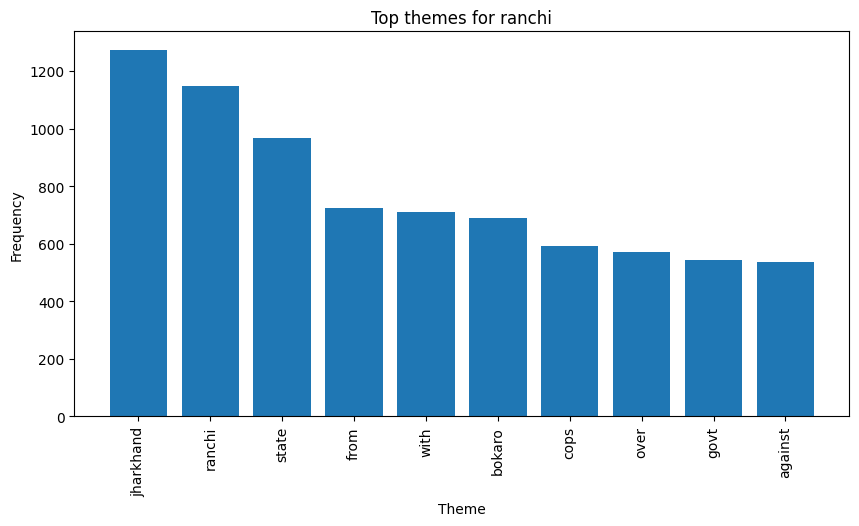

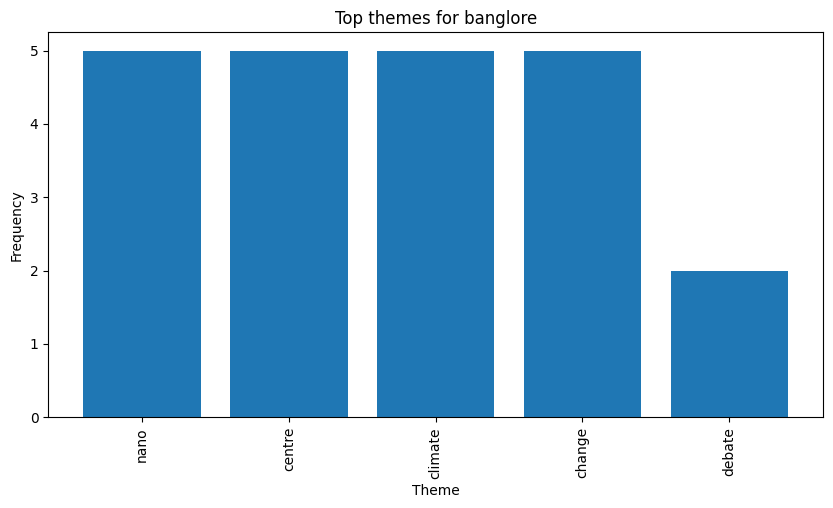

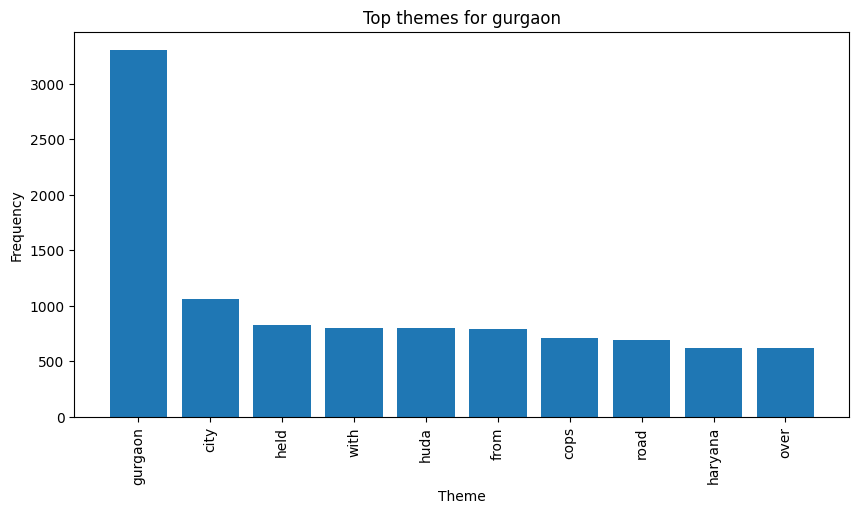

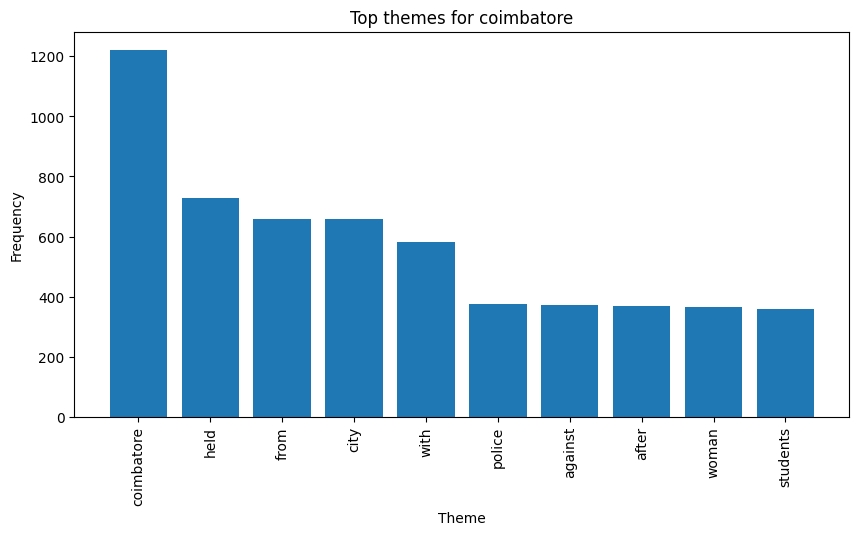

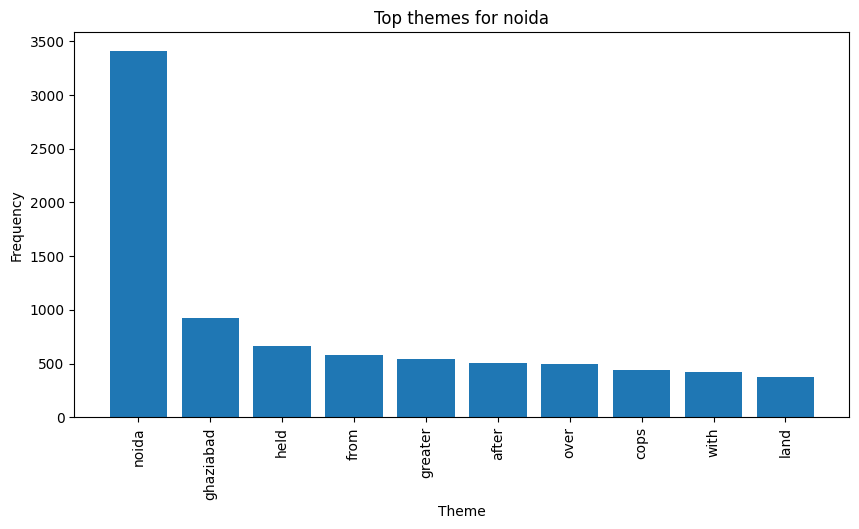

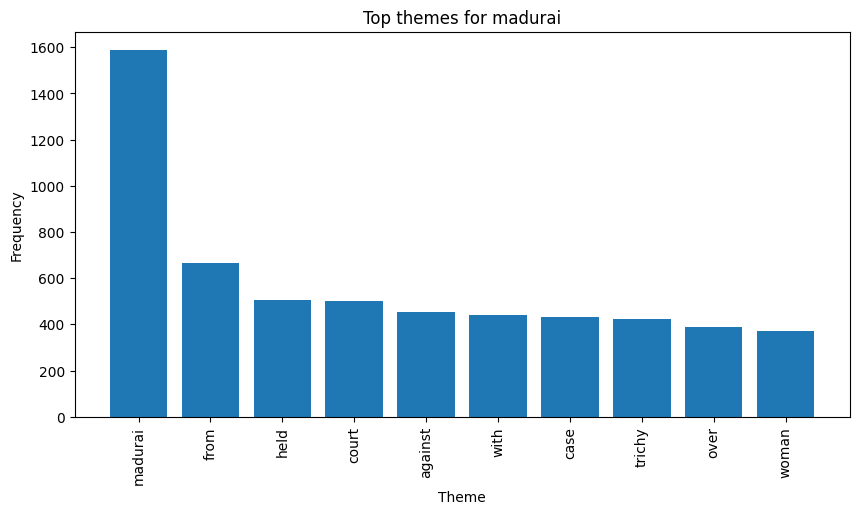

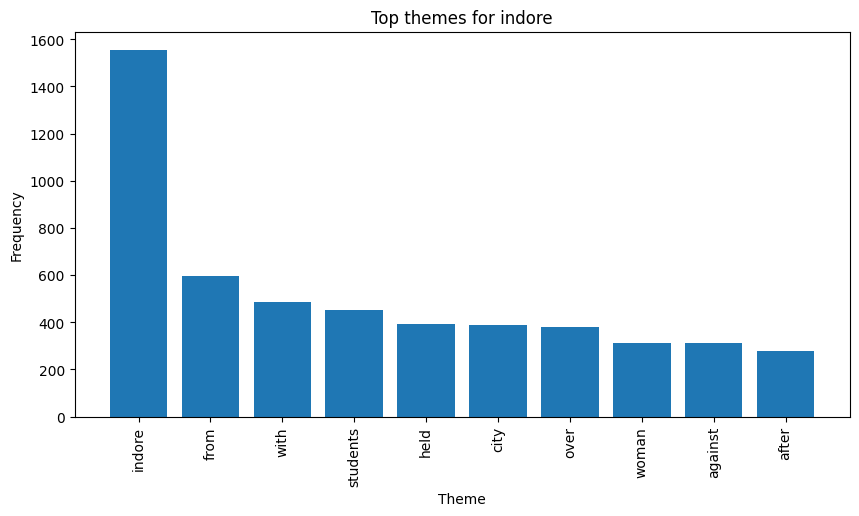

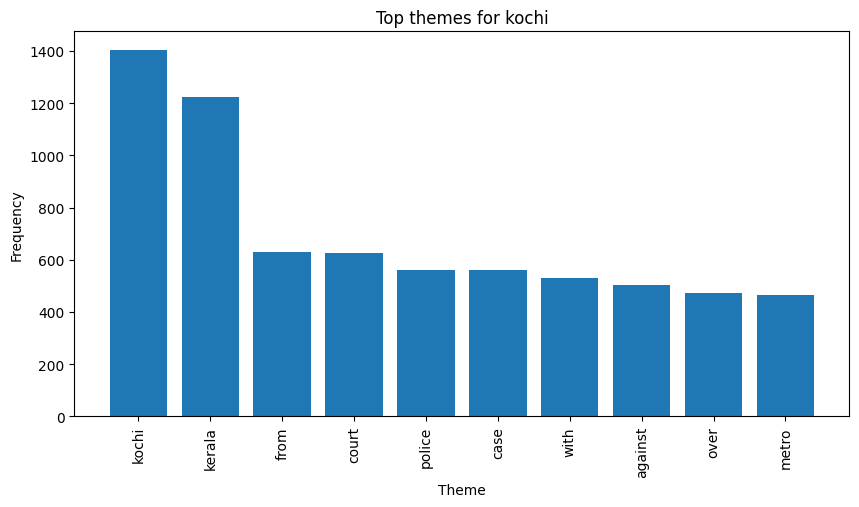

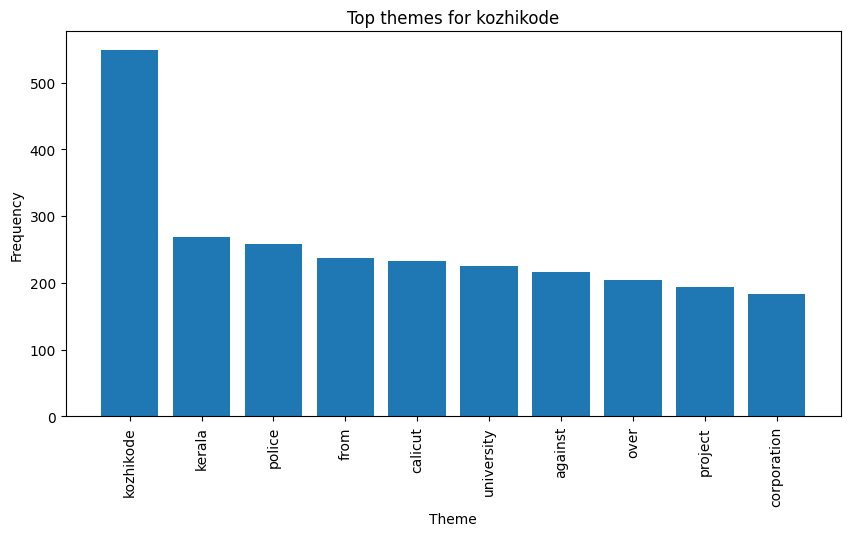

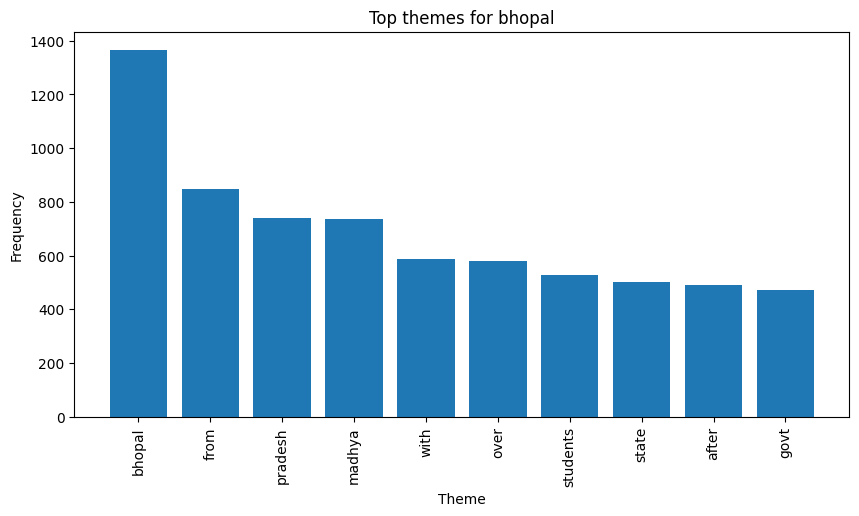

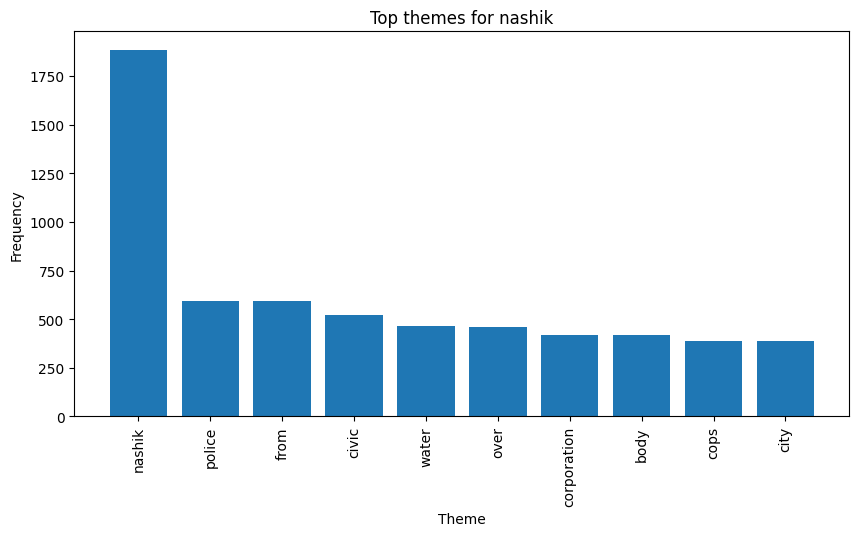

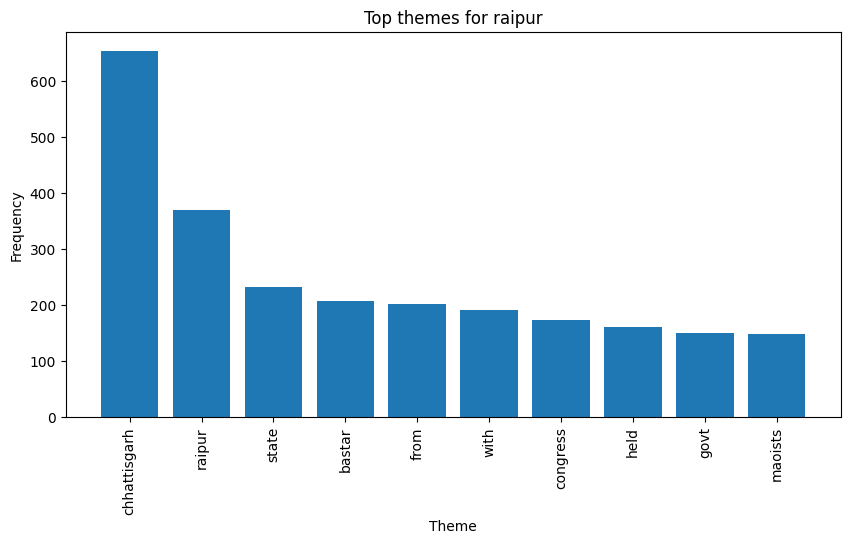

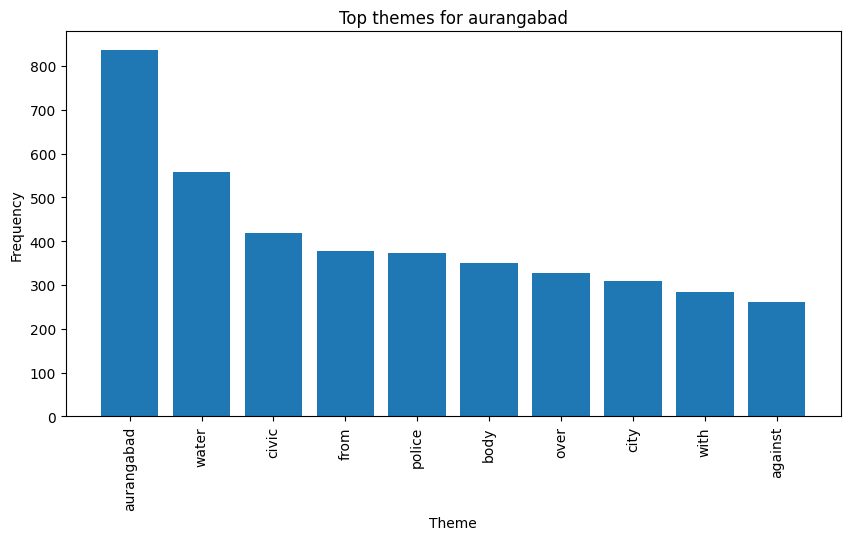

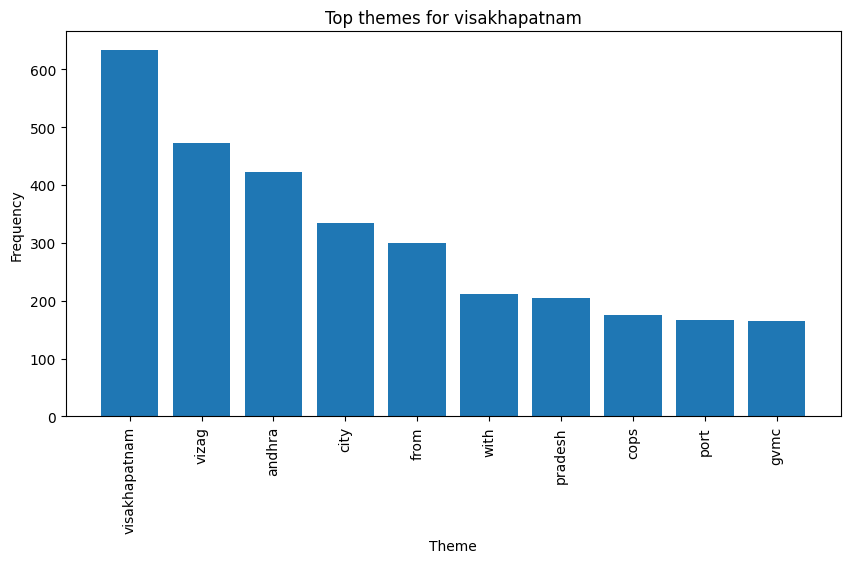

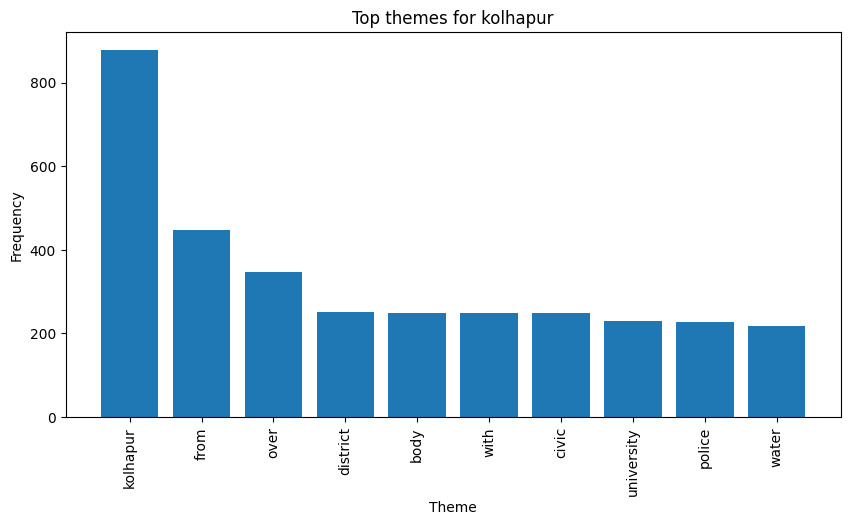

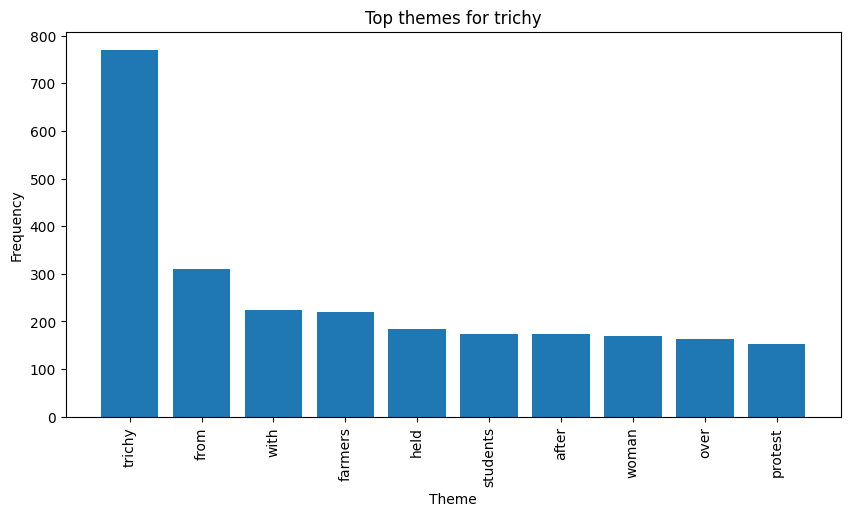

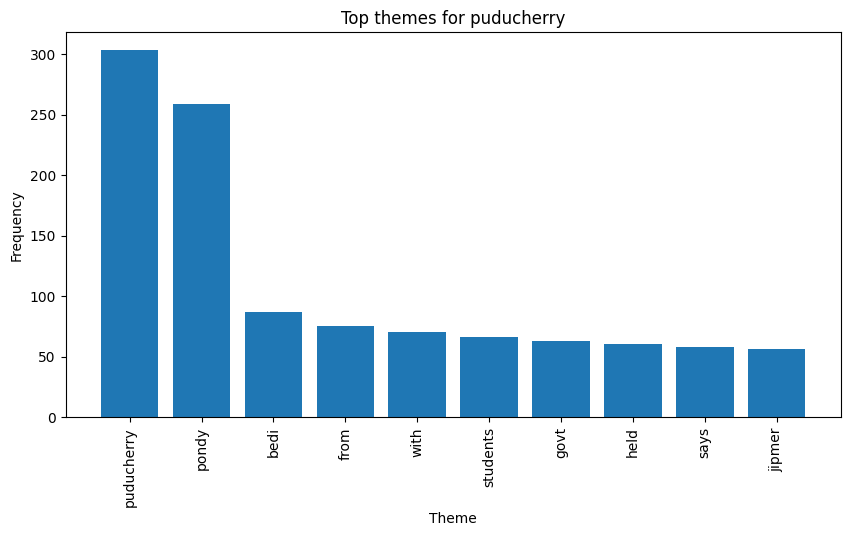

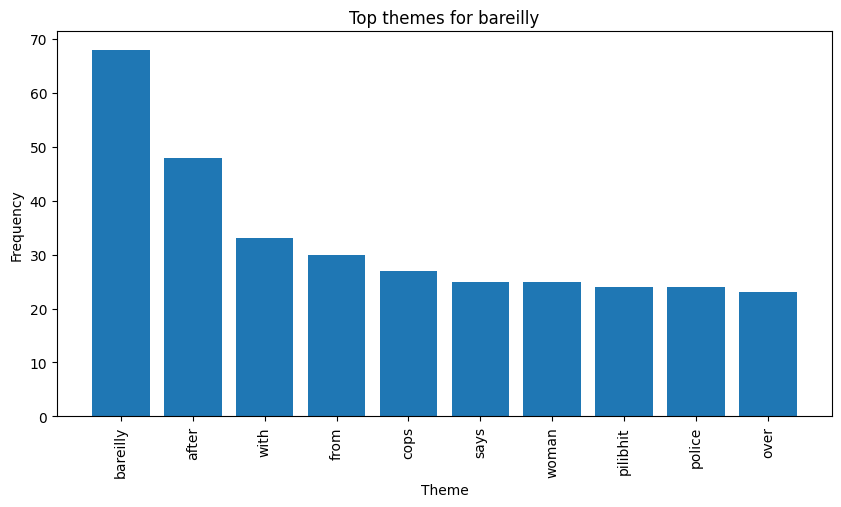

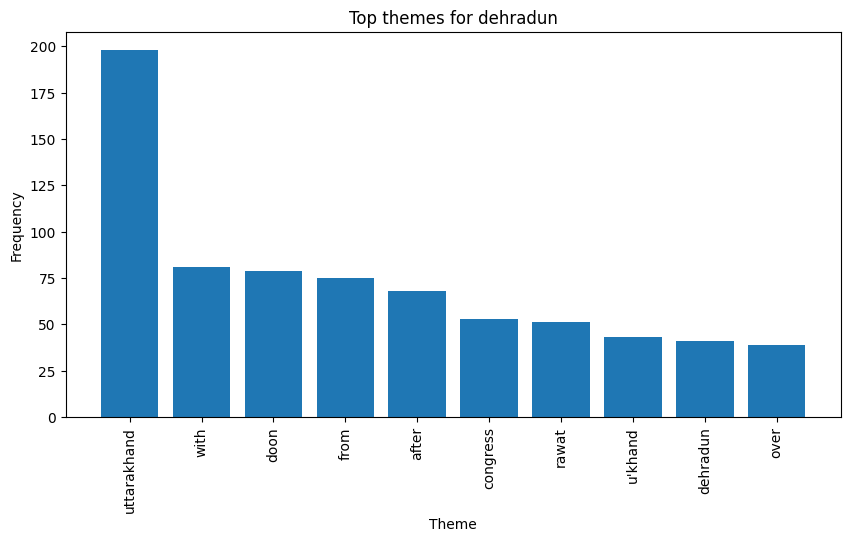

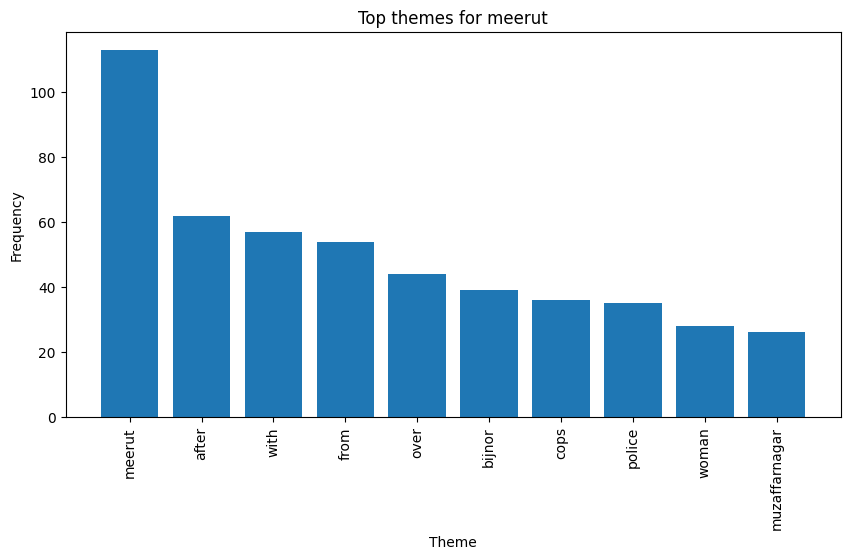

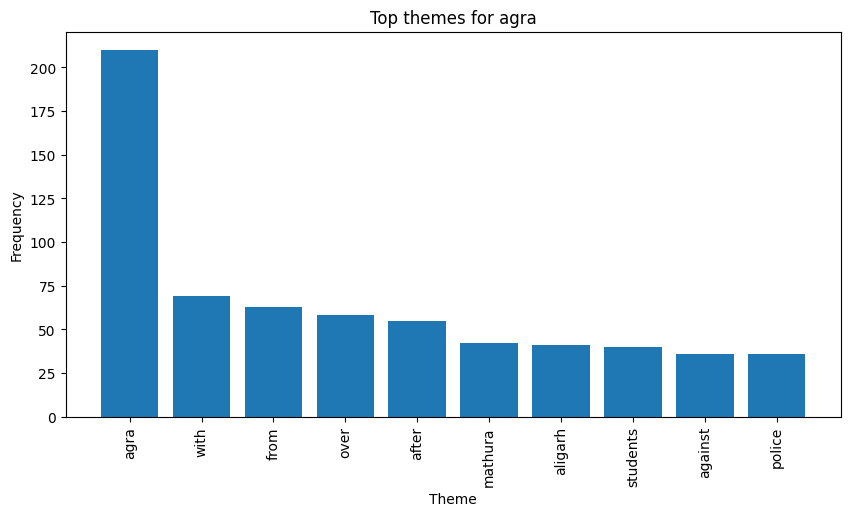

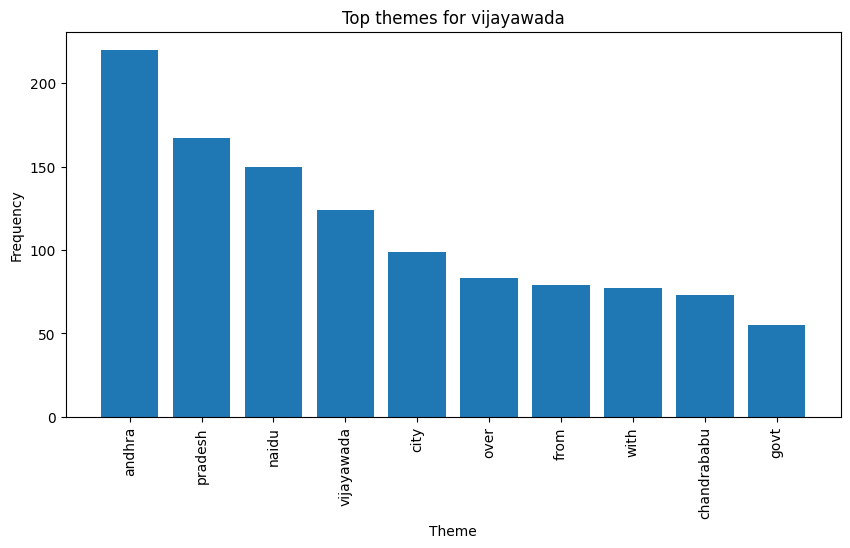

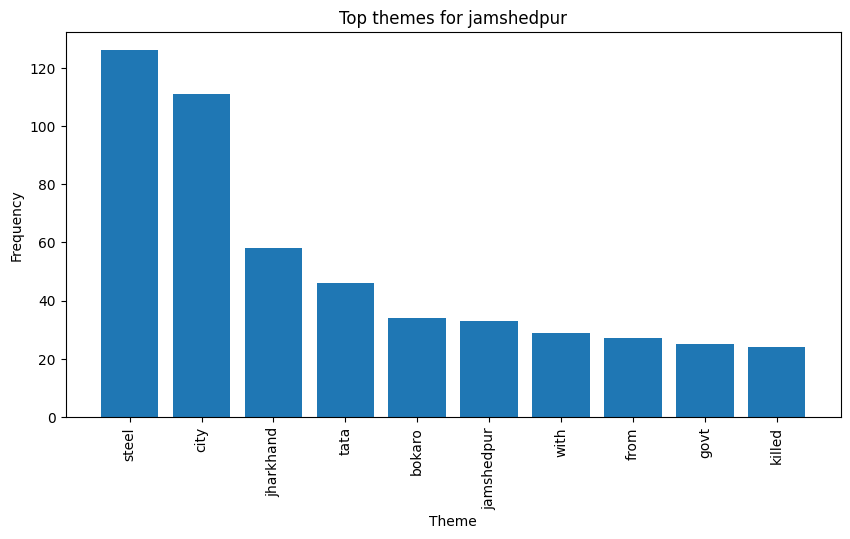

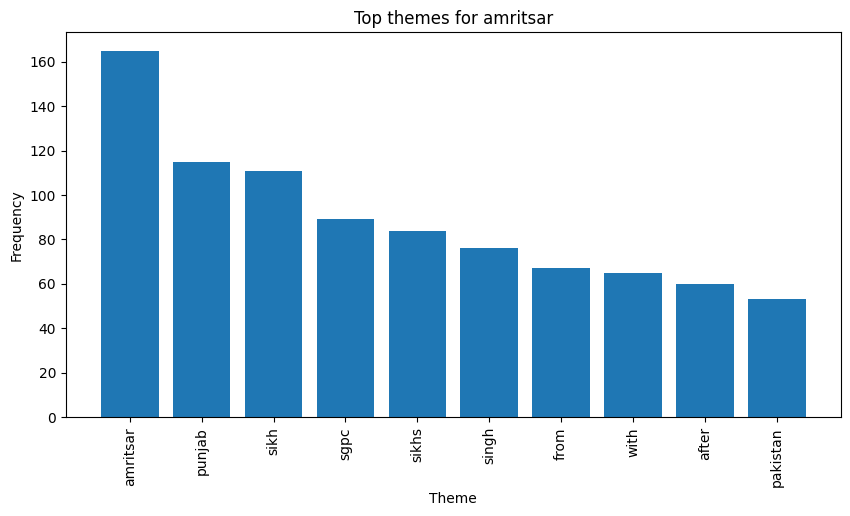

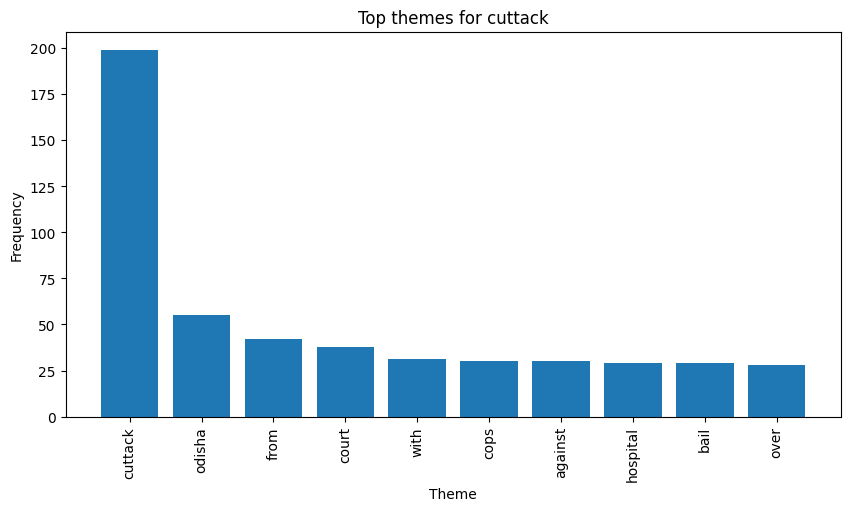

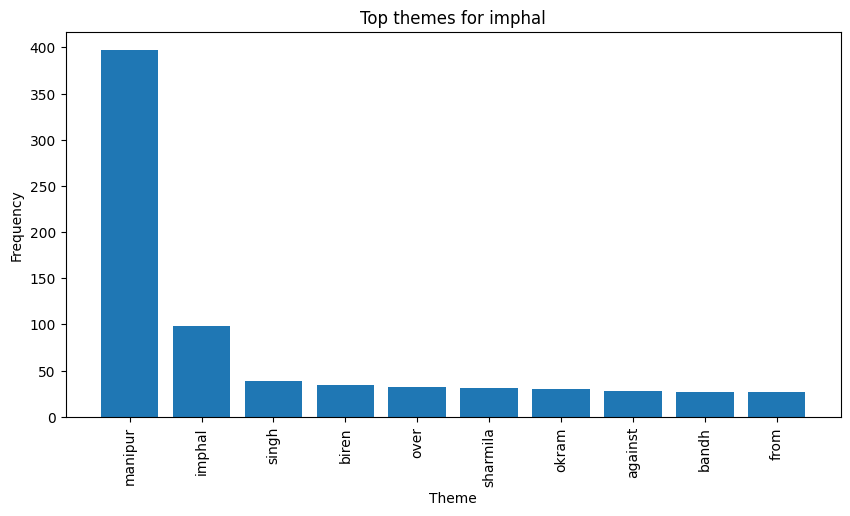

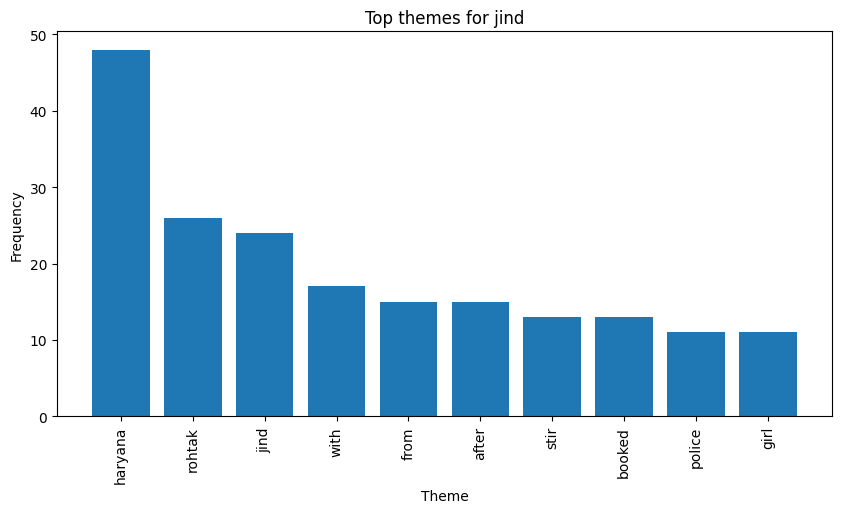

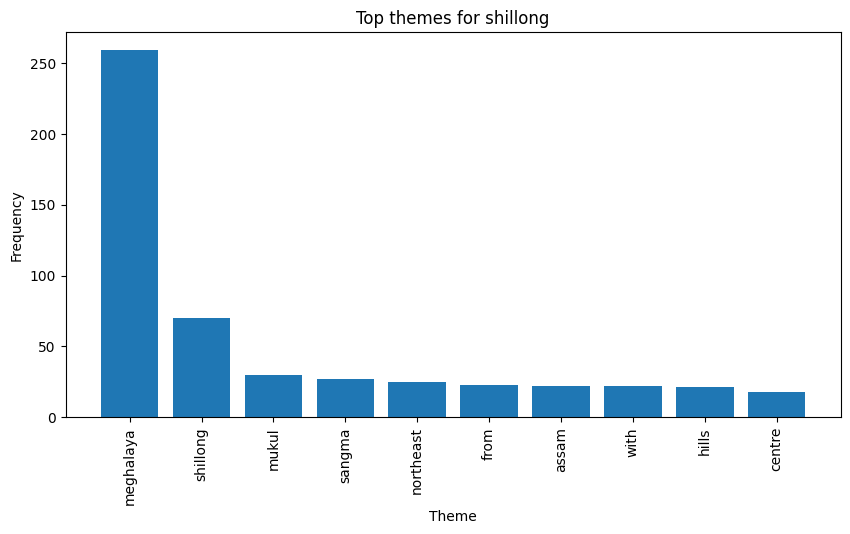

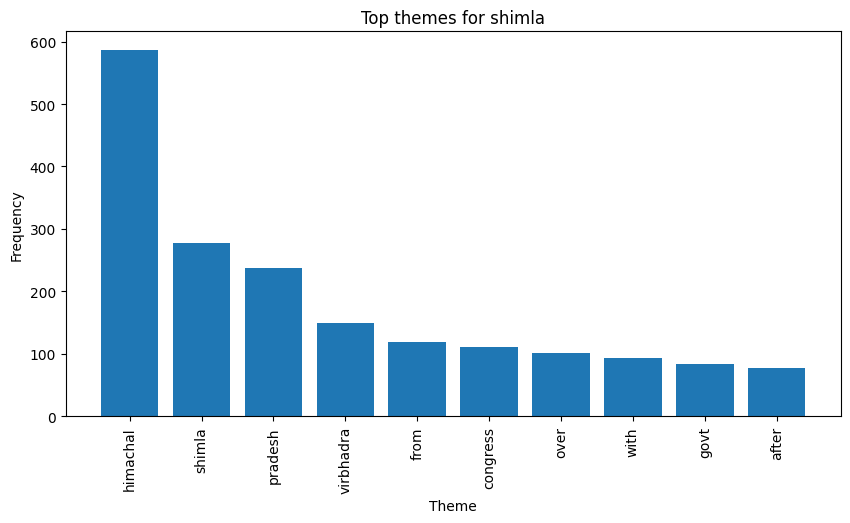

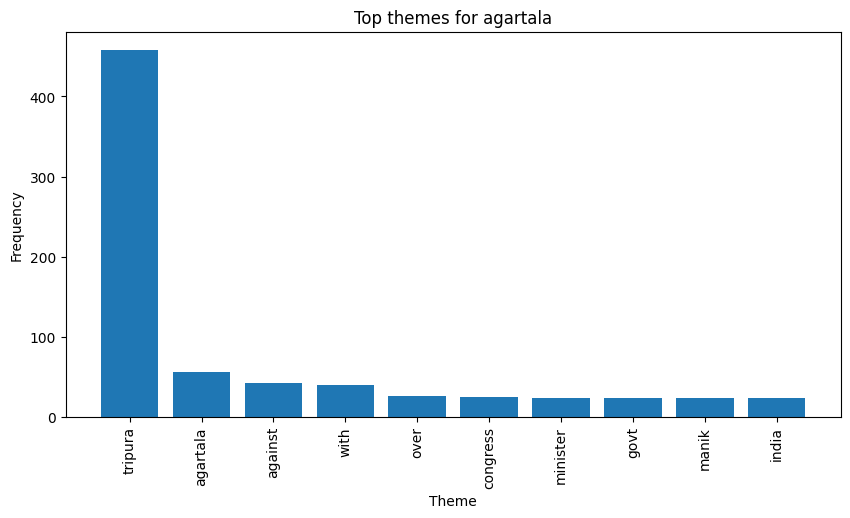

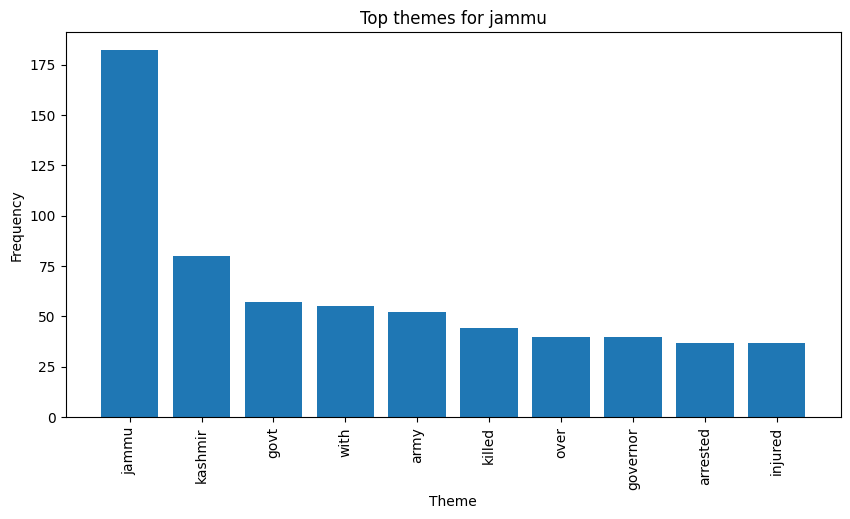

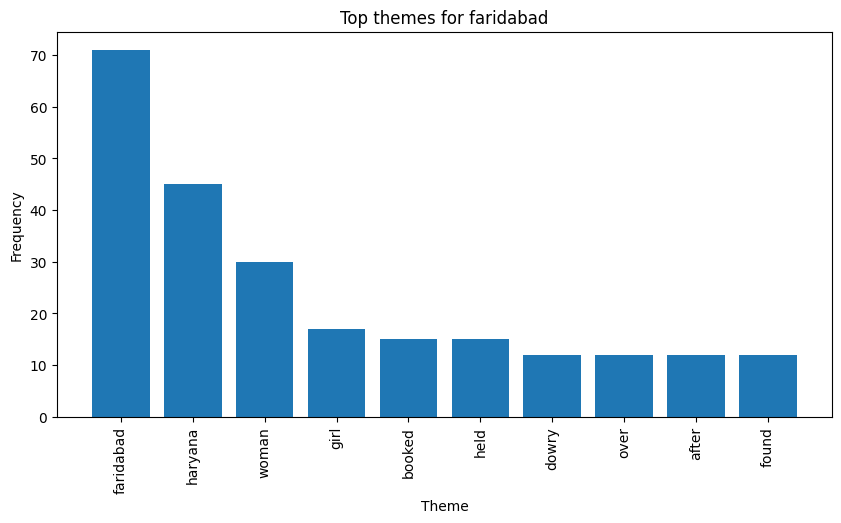

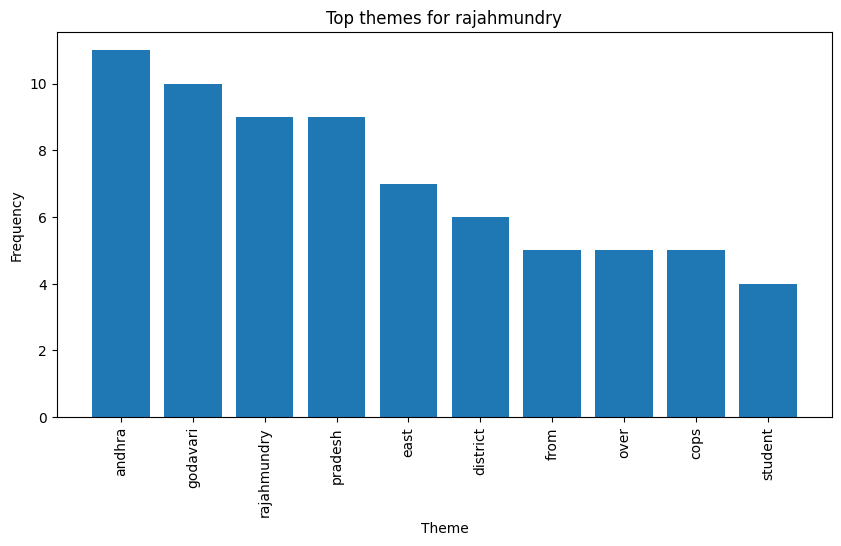

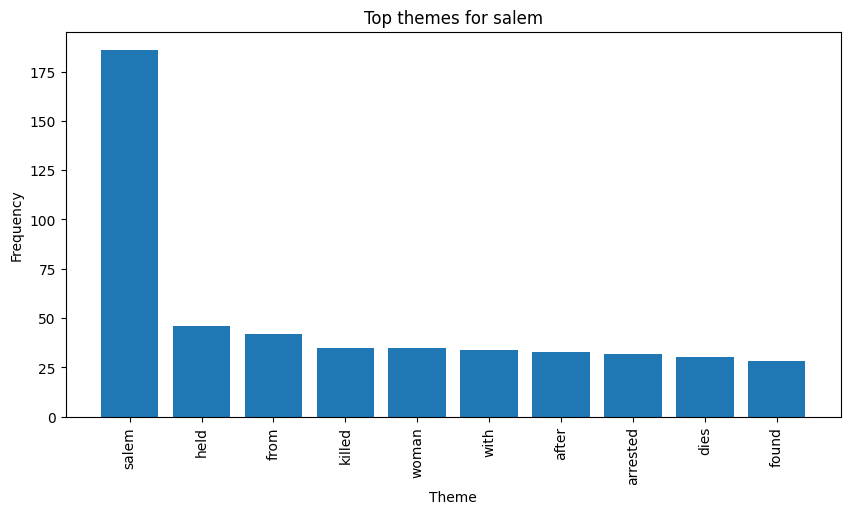

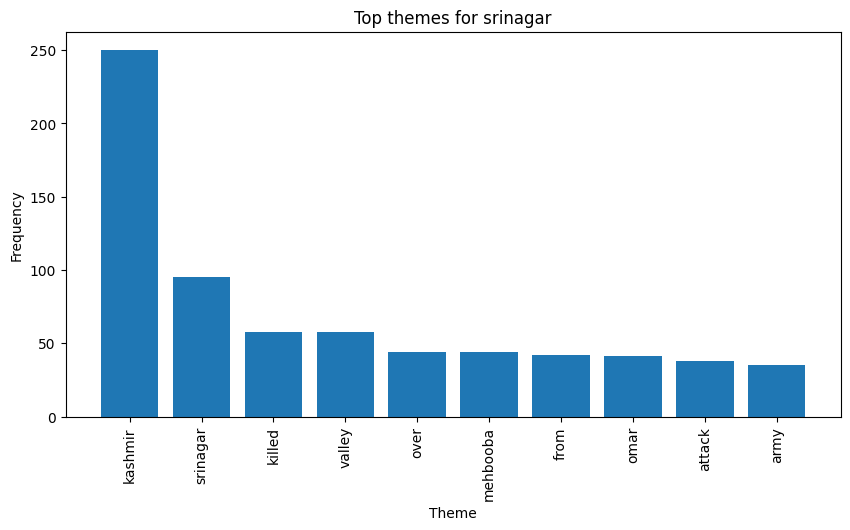

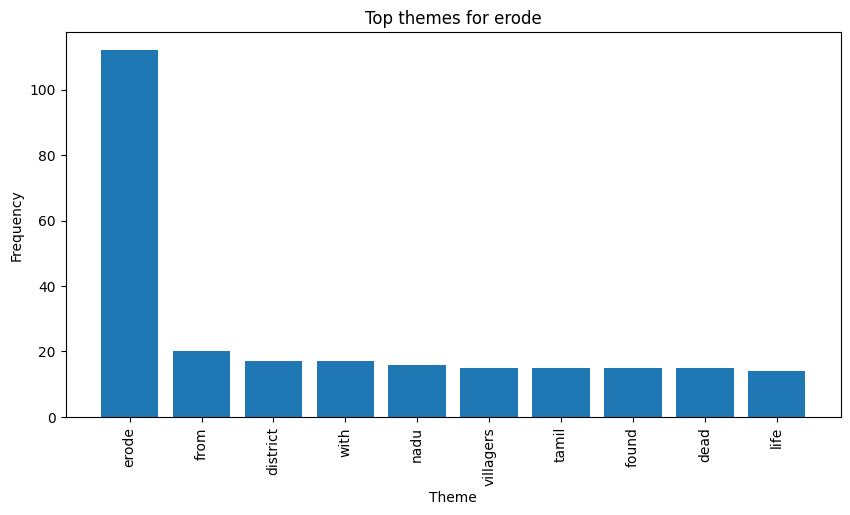

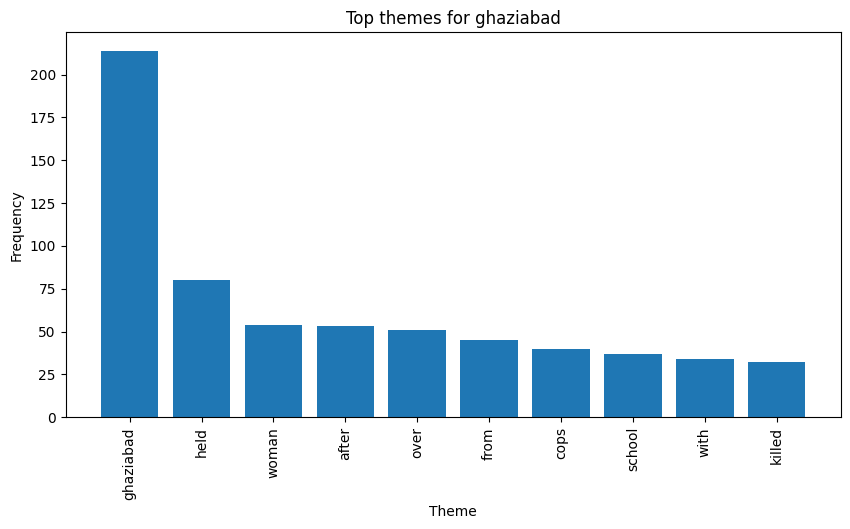

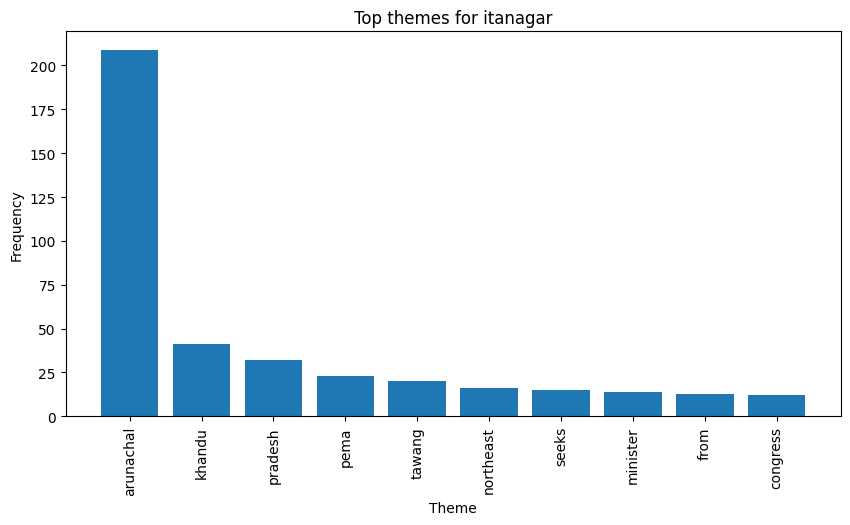

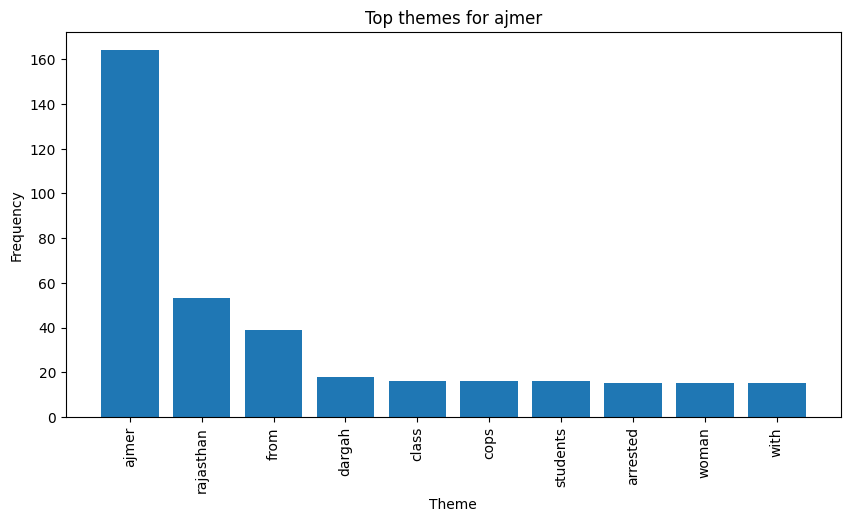

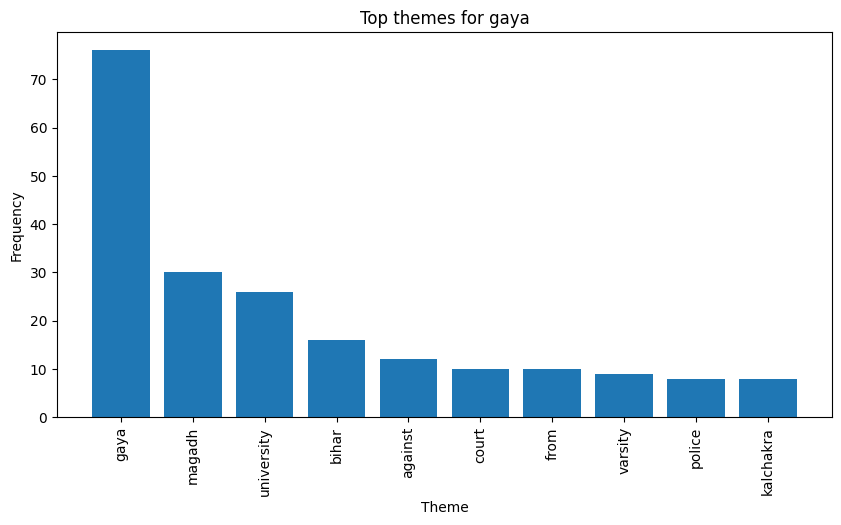

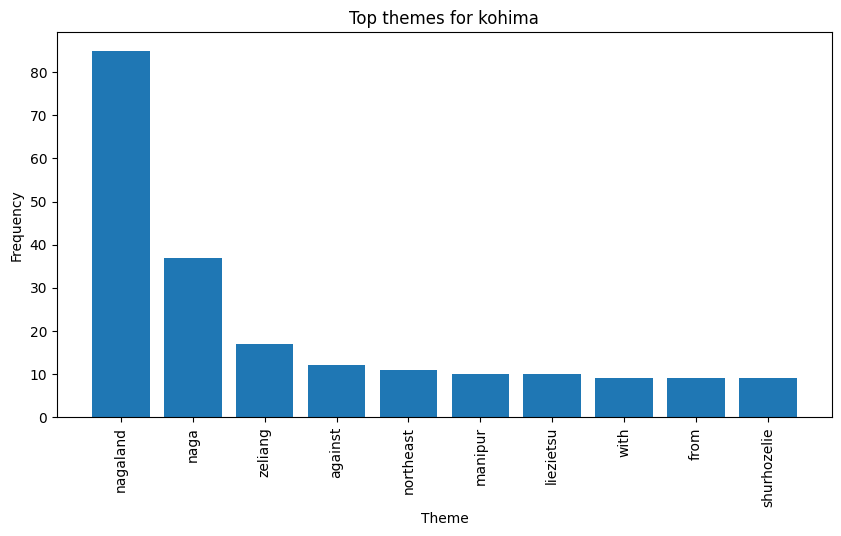

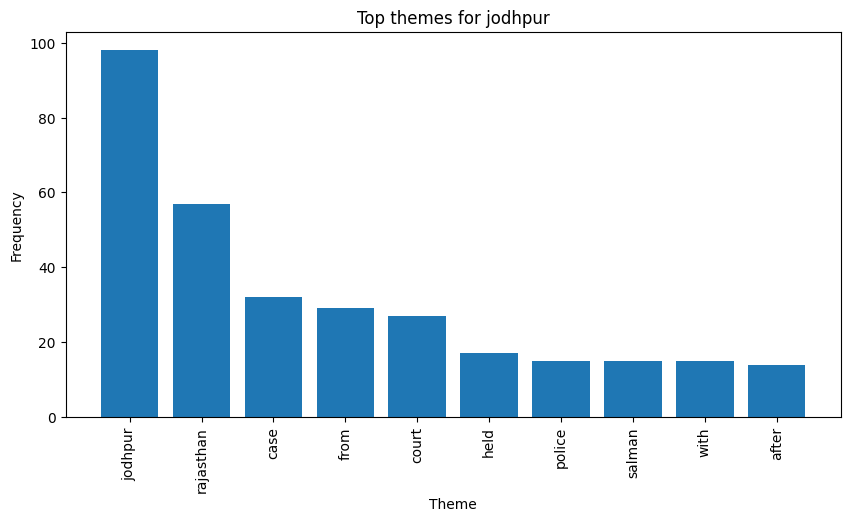

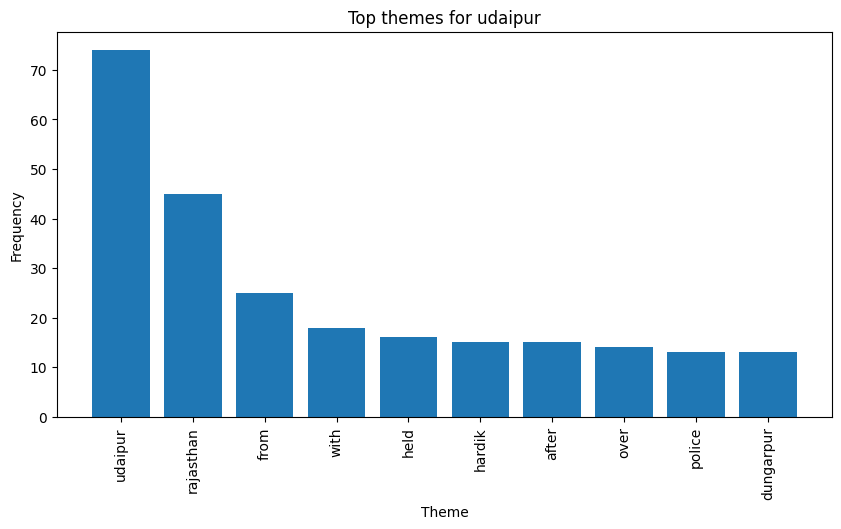

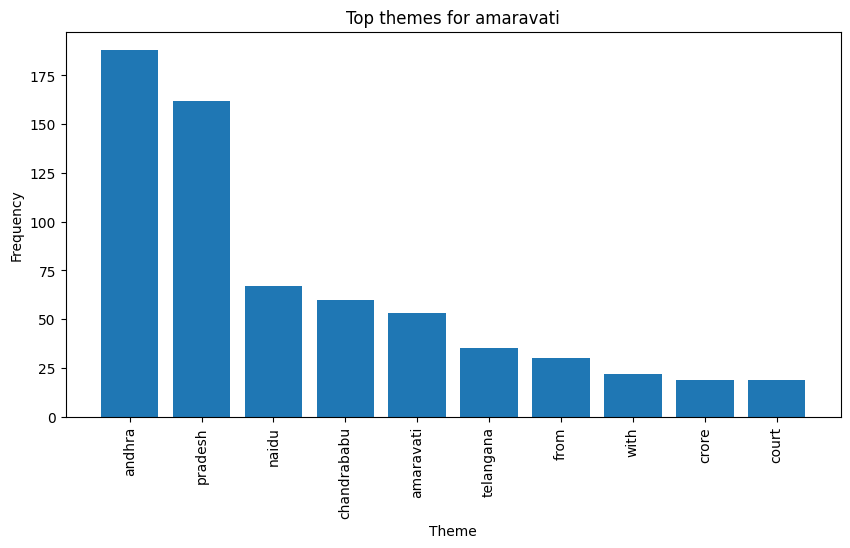

In [ ]:
# plot the frequency of the top themes for each city
for i, row in top_ngrams_df.iterrows():
    top_themes = row['top_themes']
    frequencies = [row['word_freq'][theme] for theme in top_themes]
    x_labels = top_themes
    plt.figure(figsize=(10, 5))
    plt.bar(x_labels, frequencies)
    plt.xticks(rotation=90)
    plt.xlabel('Theme')
    plt.ylabel('Frequency')
    plt.title(f"Top themes for {row['city_name']}")
    plt.show()

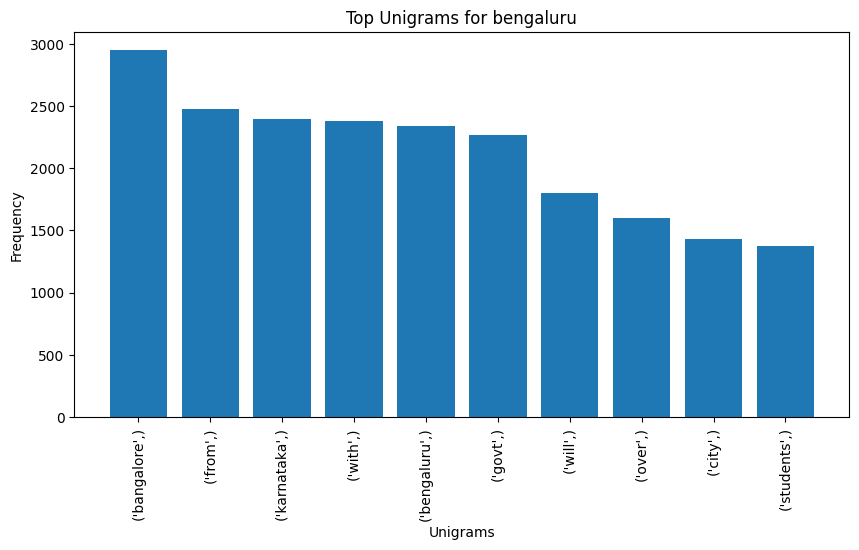

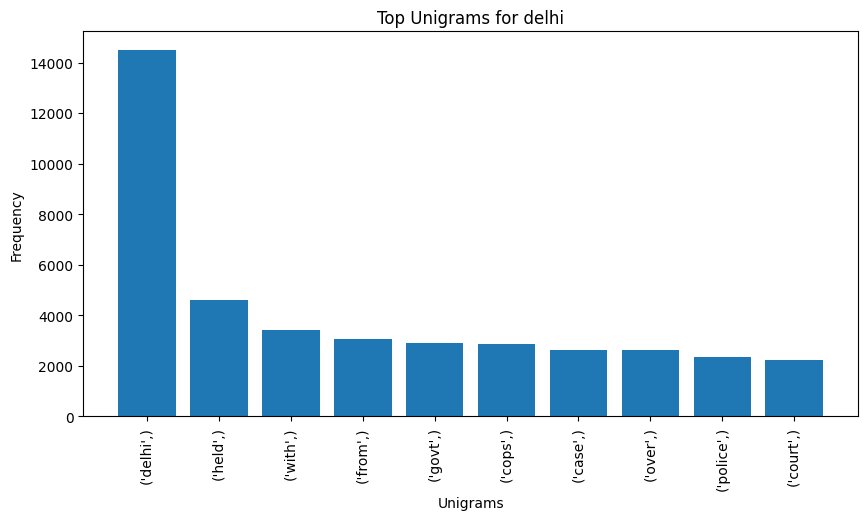

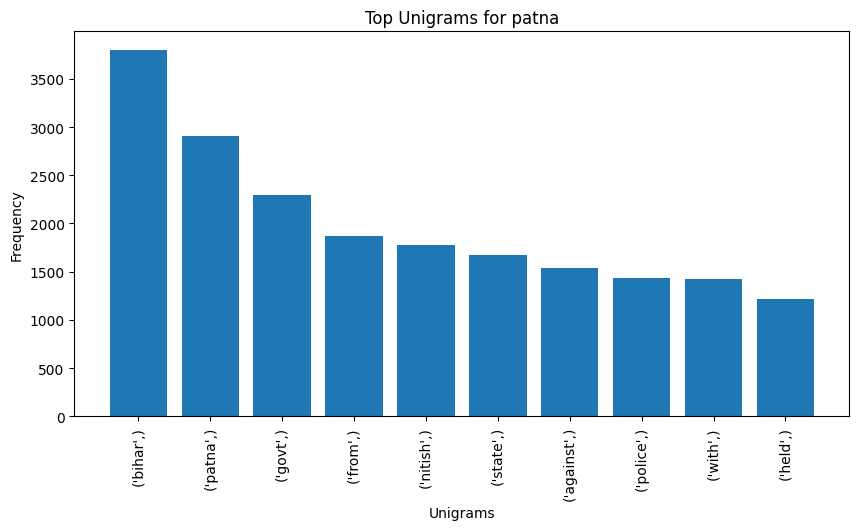

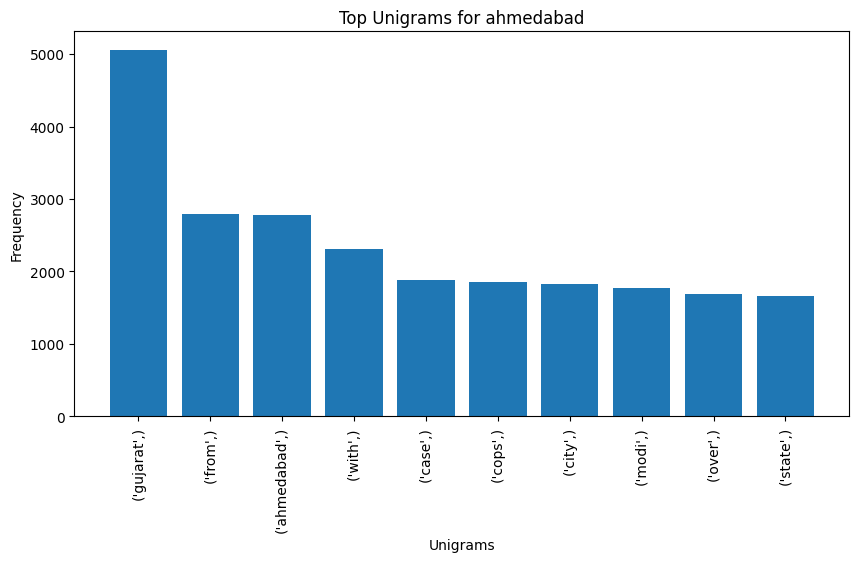

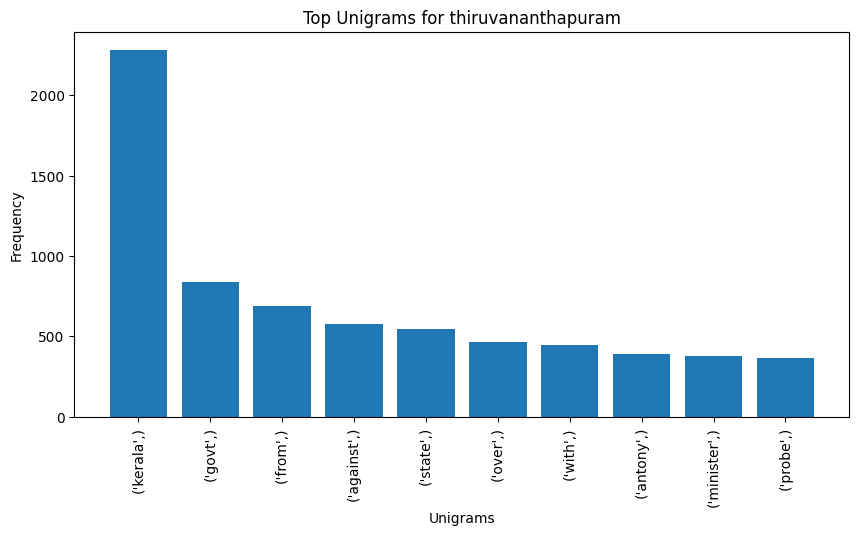

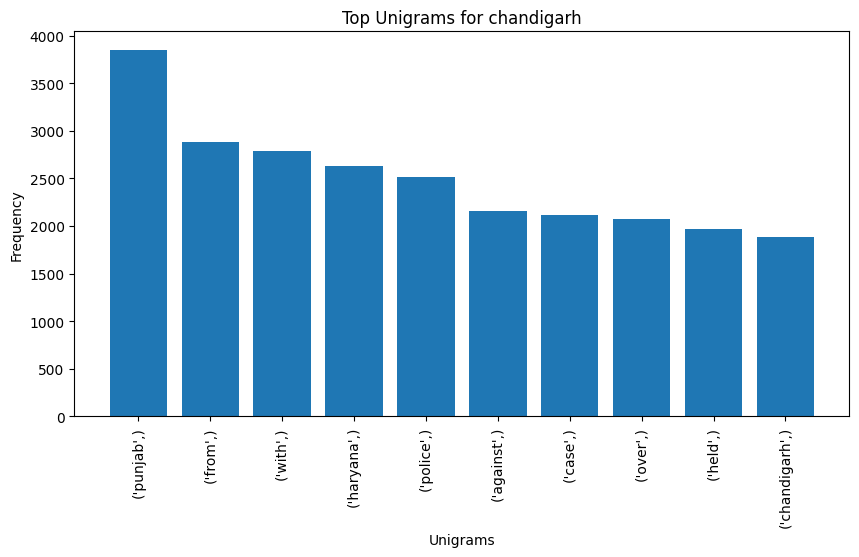

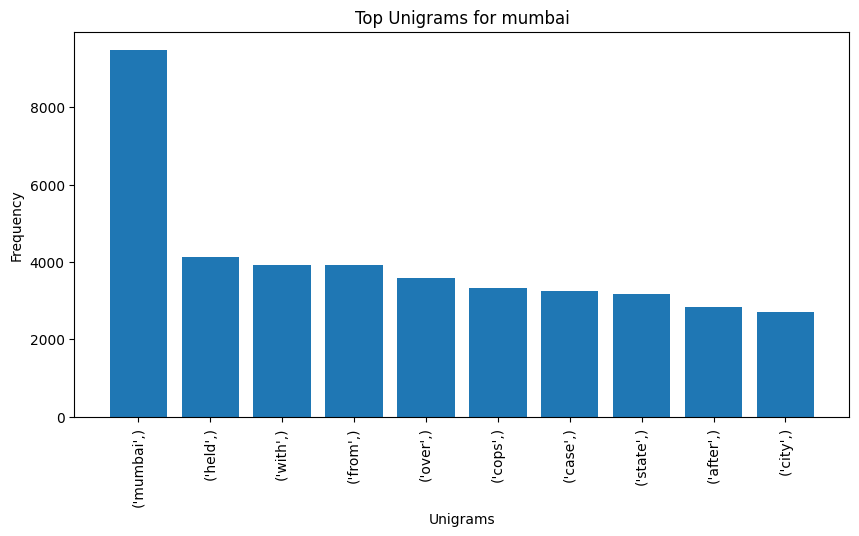

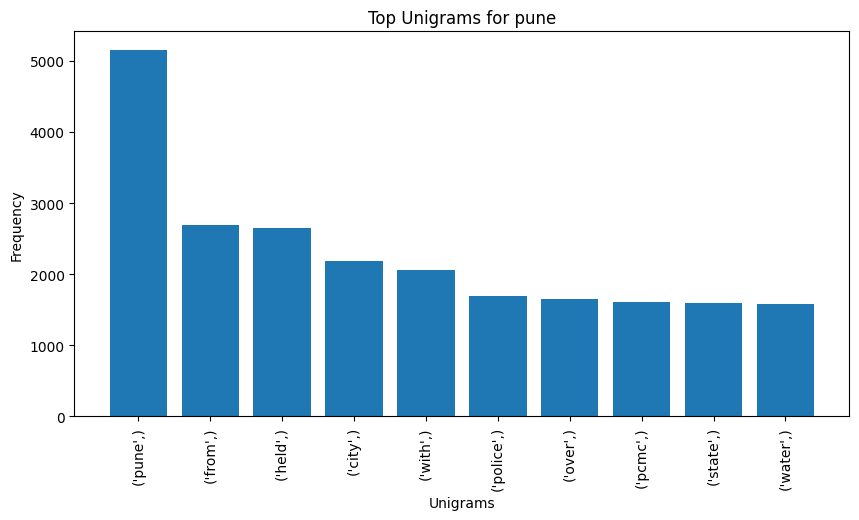

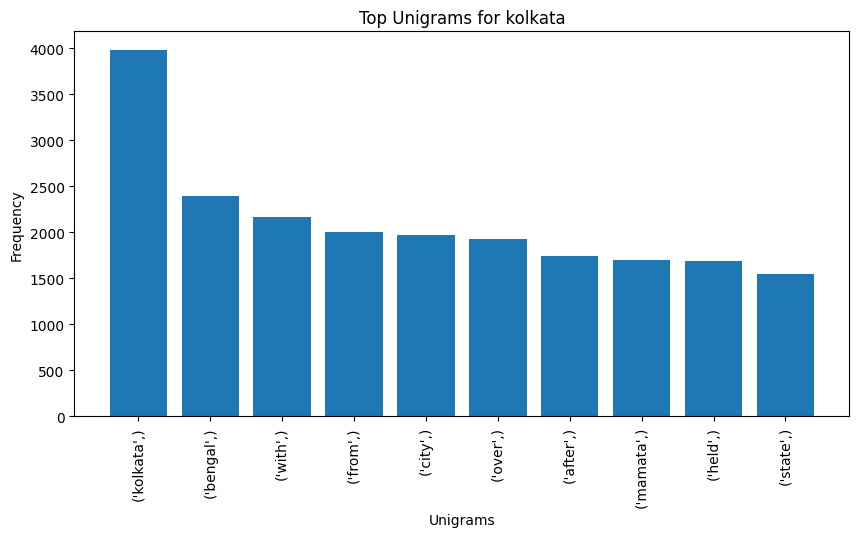

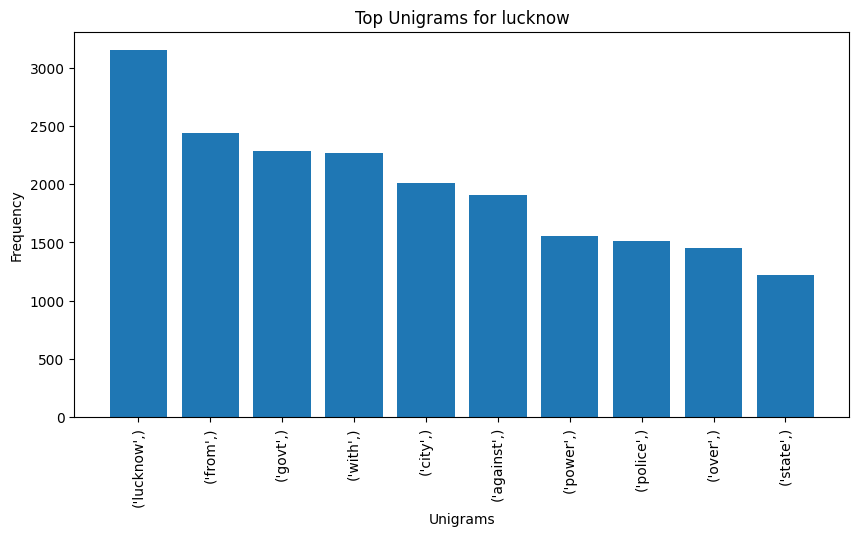

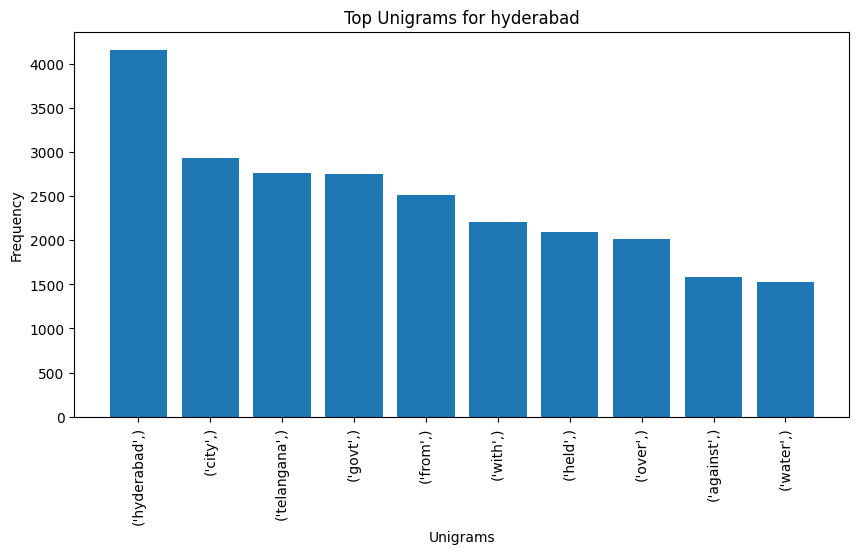

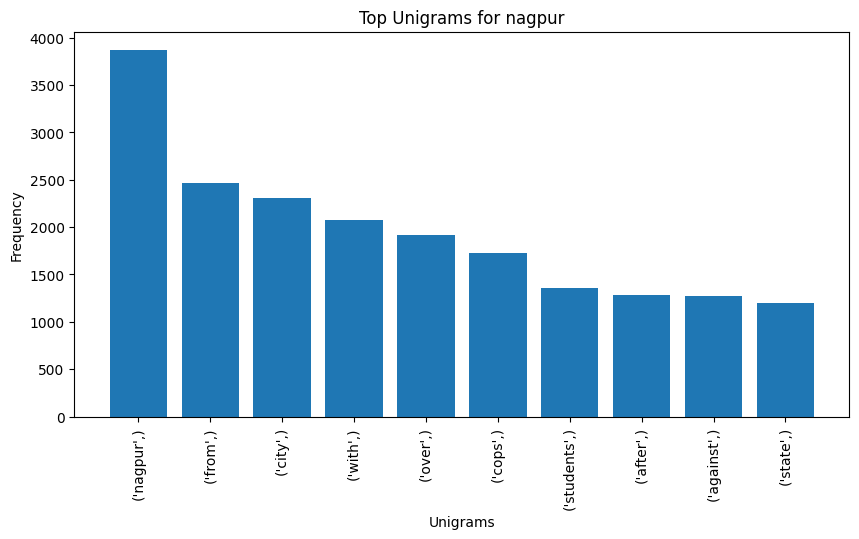

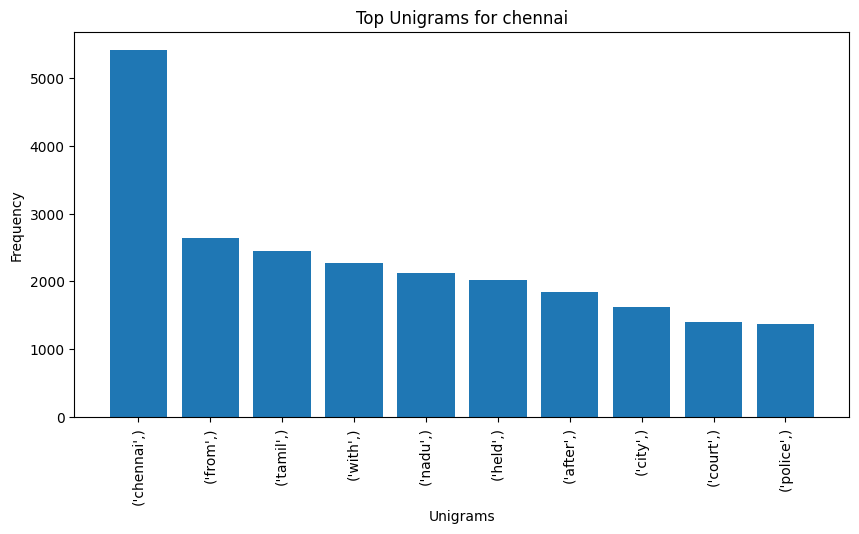

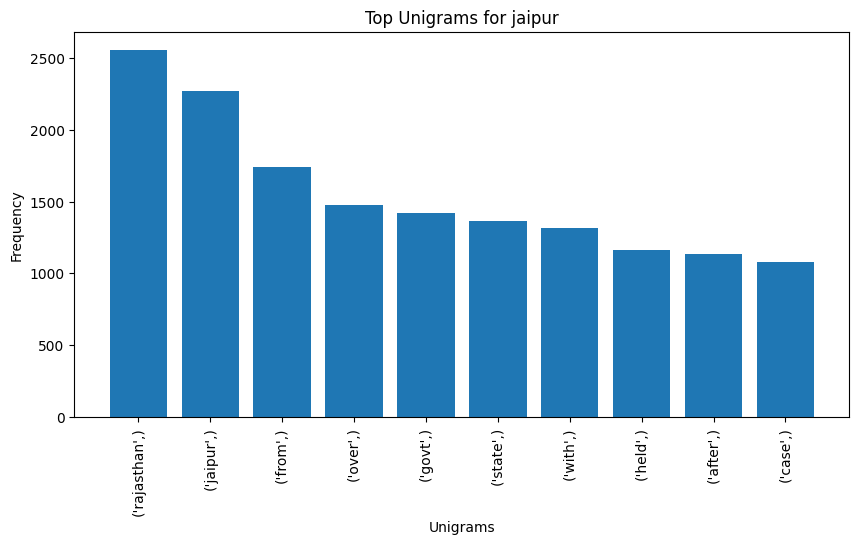

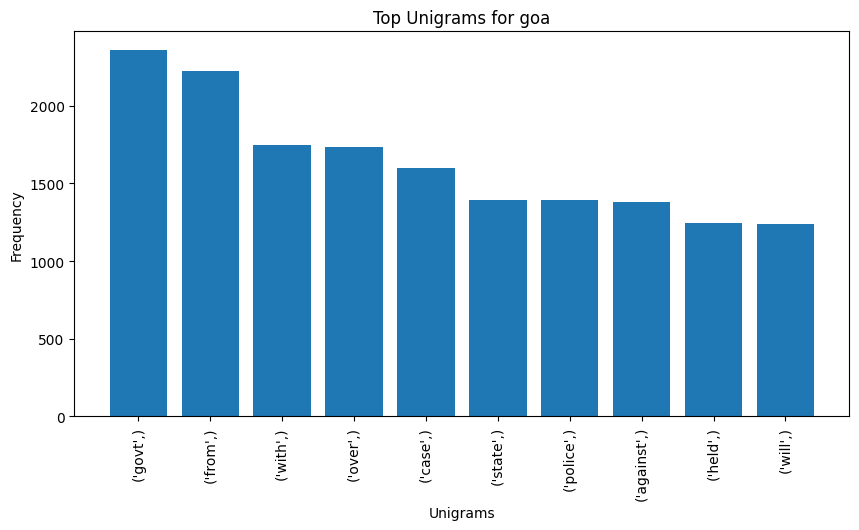

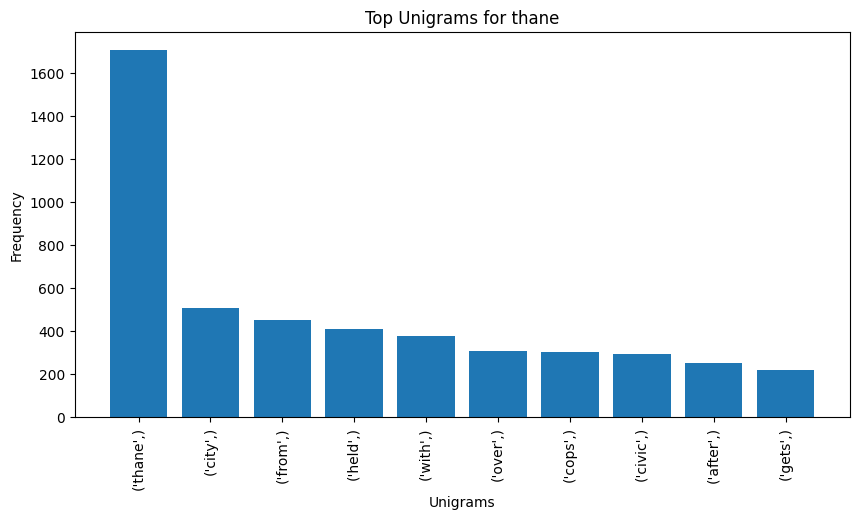

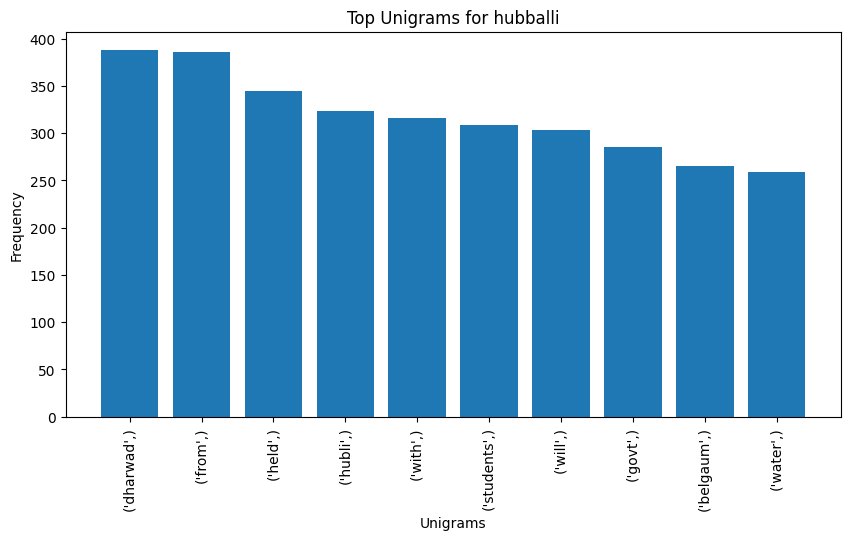

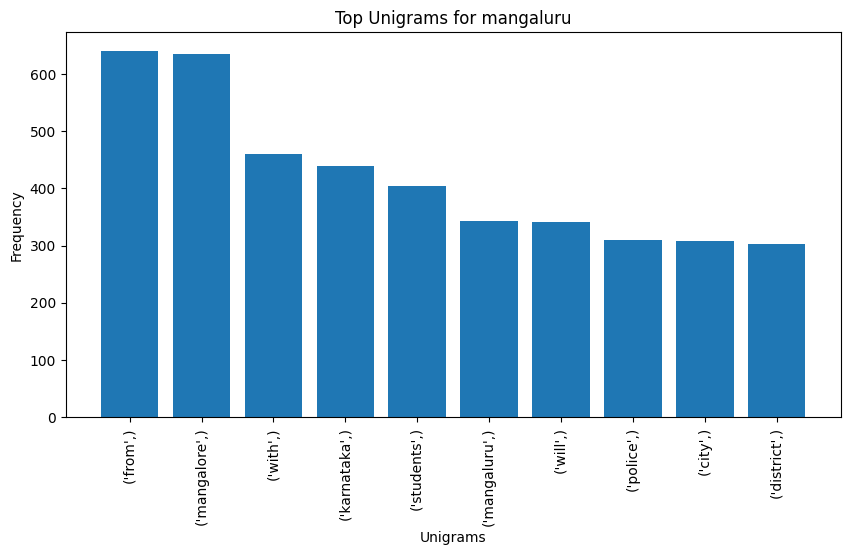

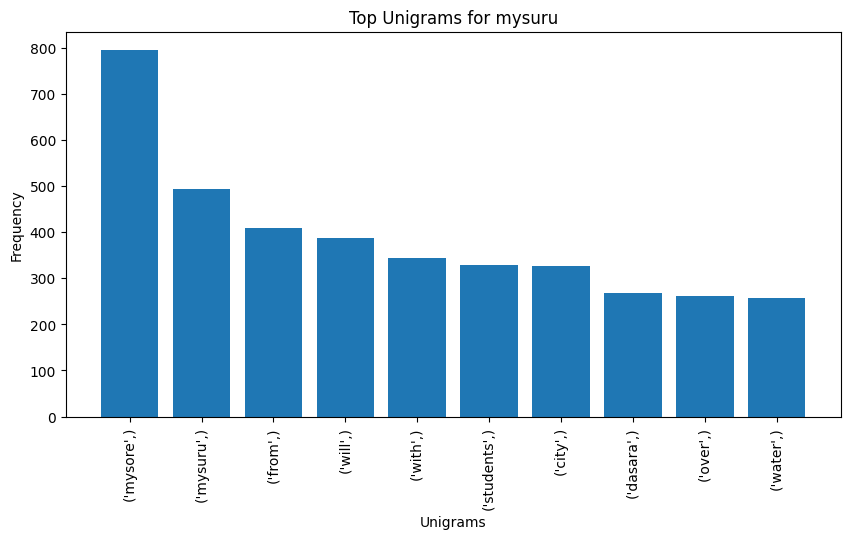

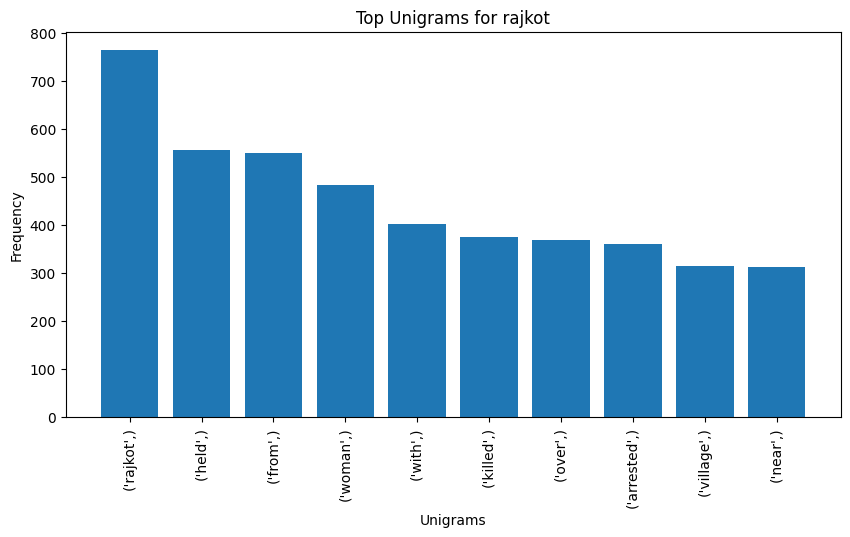

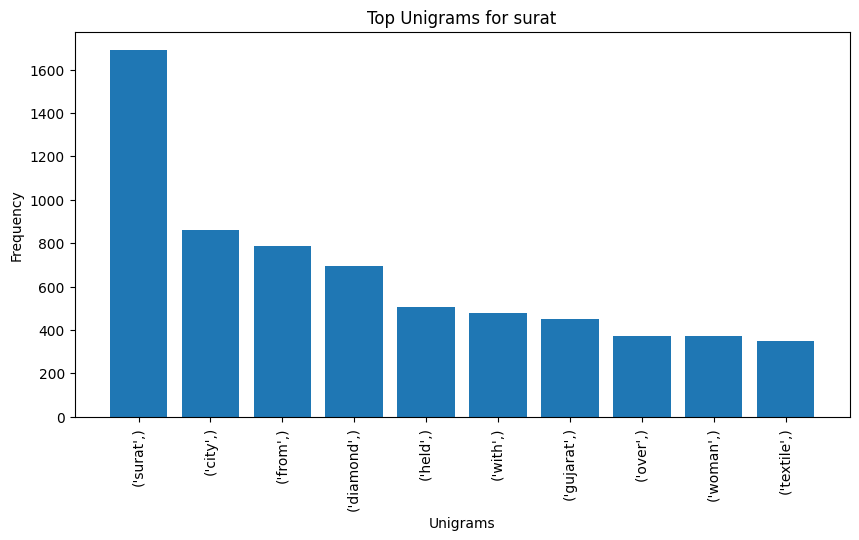

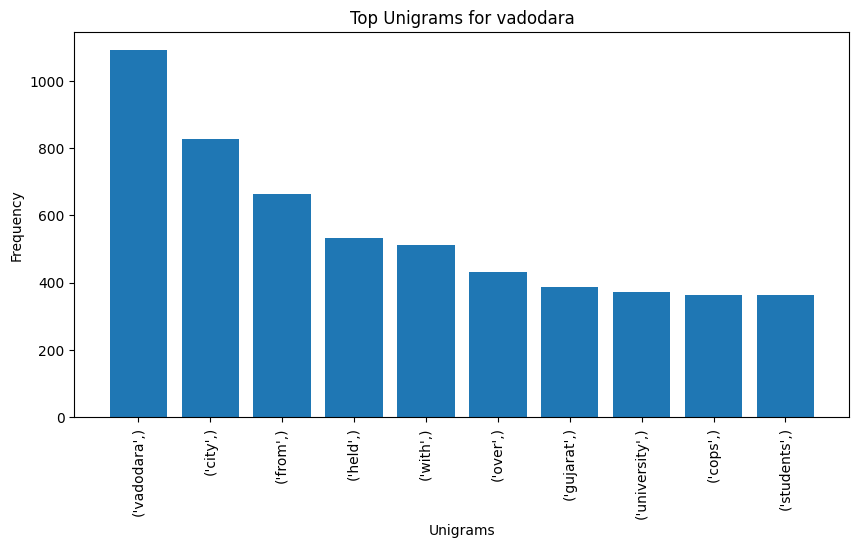

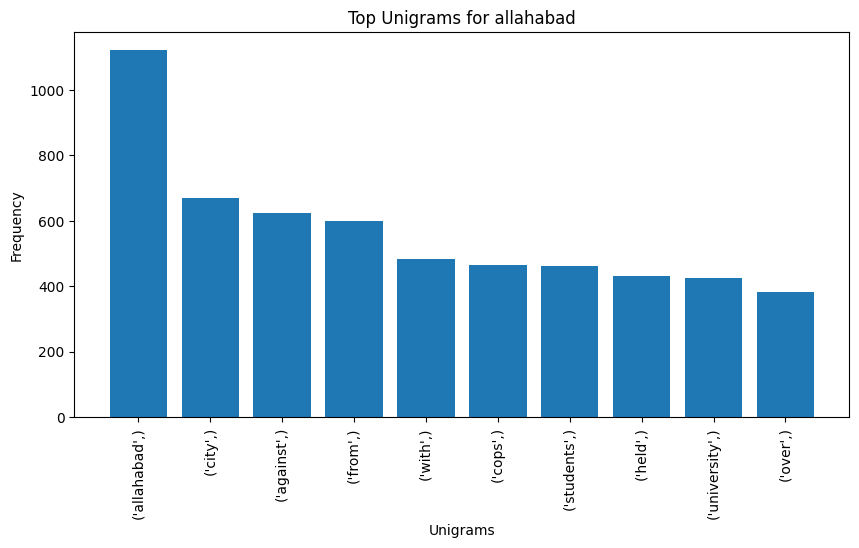

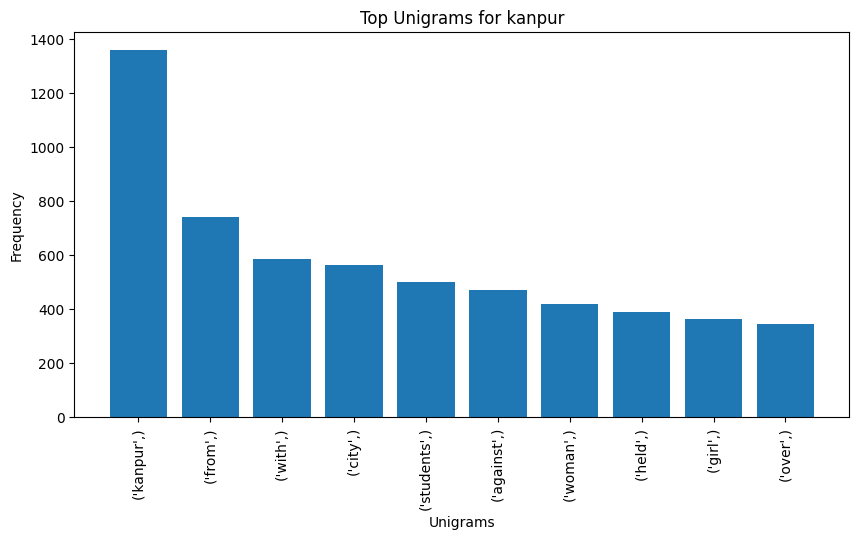

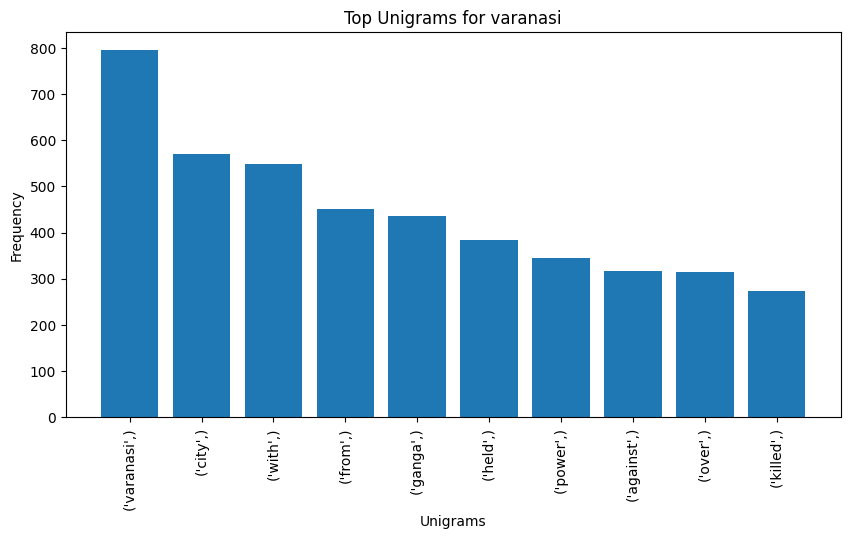

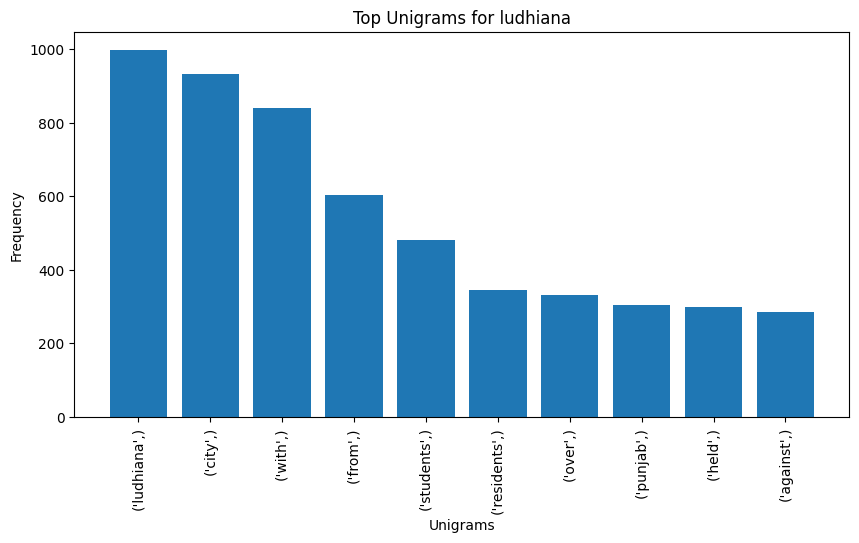

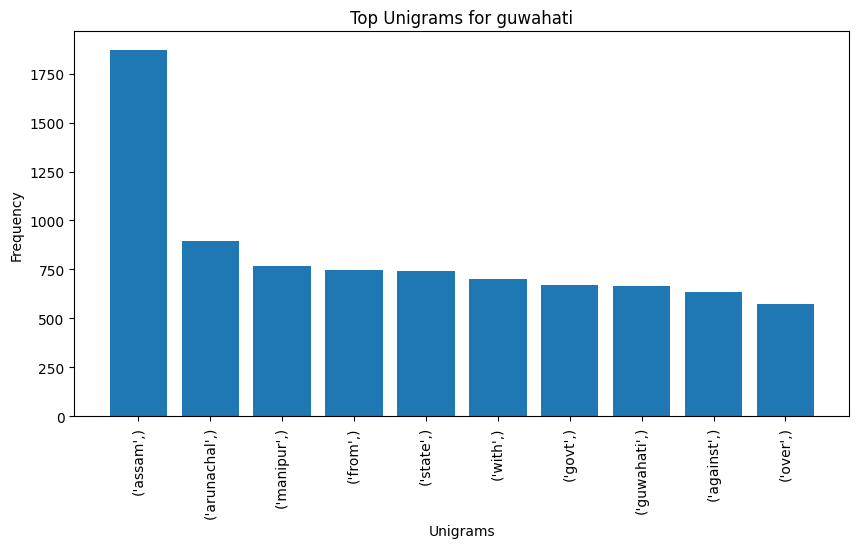

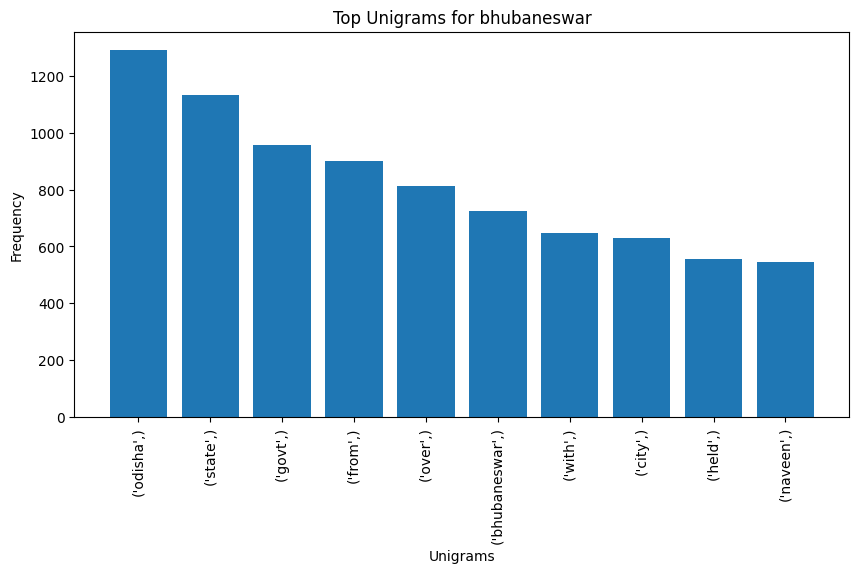

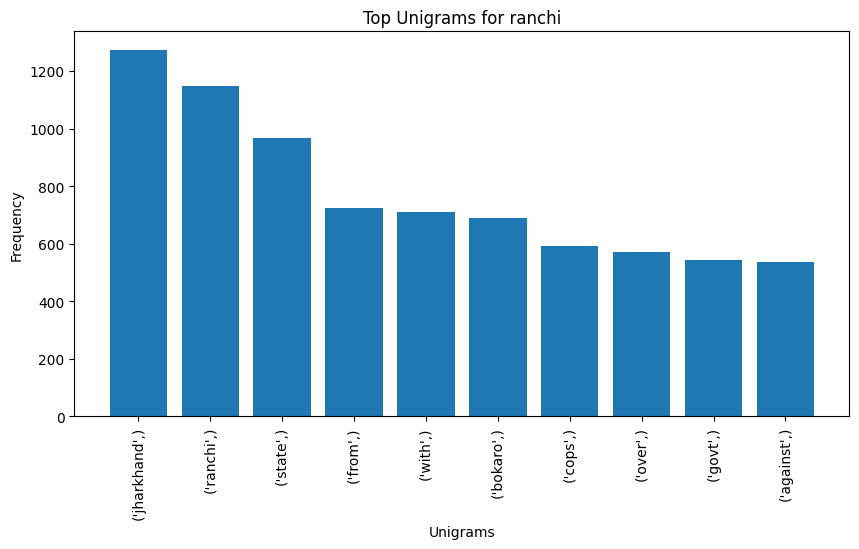

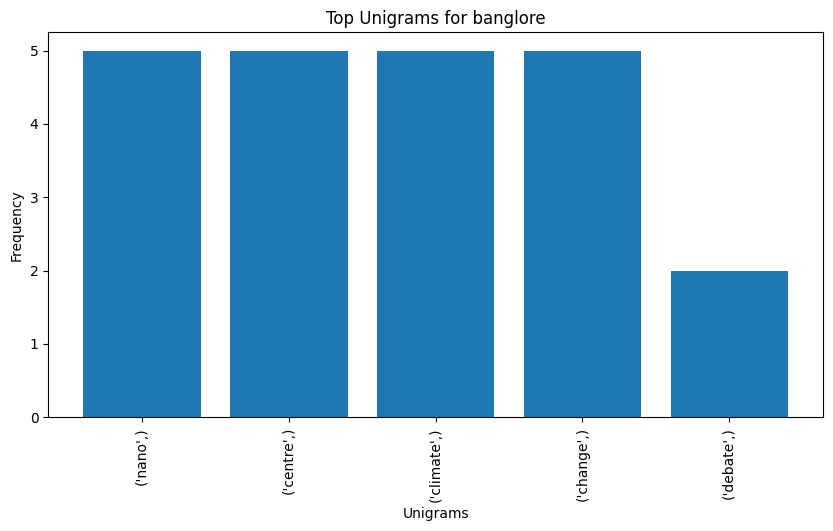

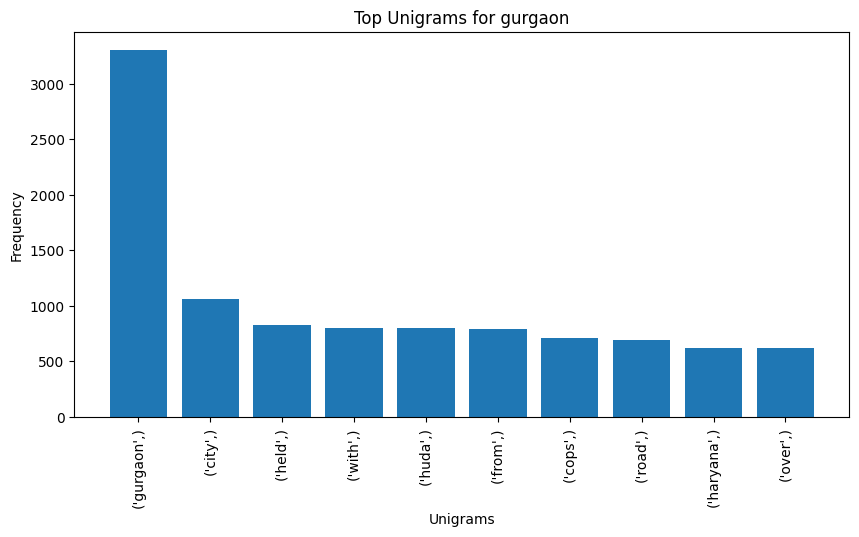

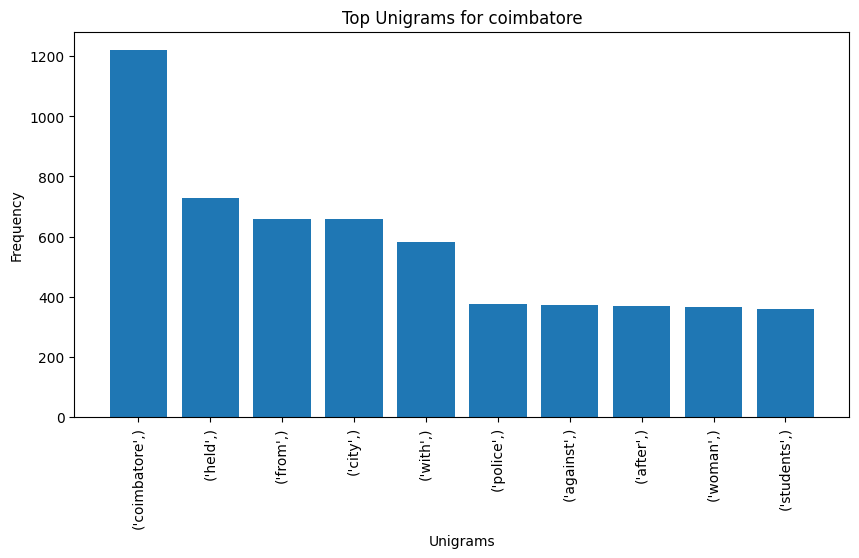

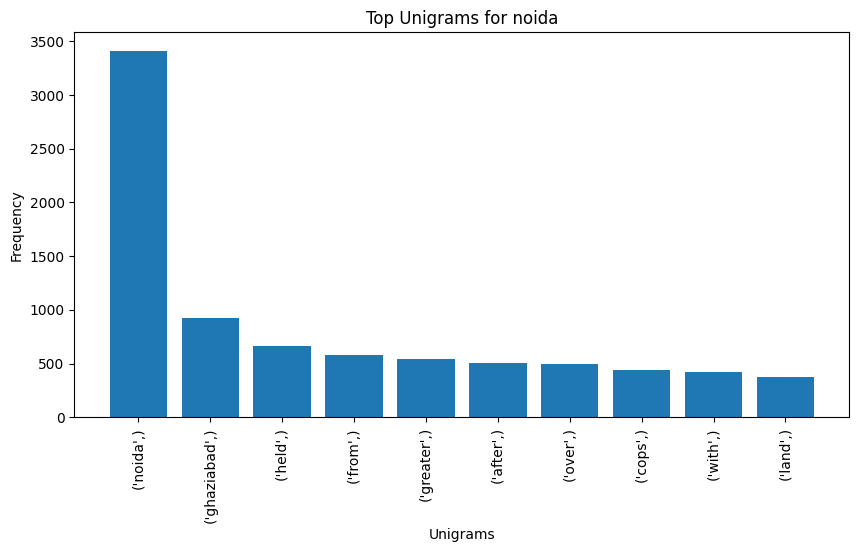

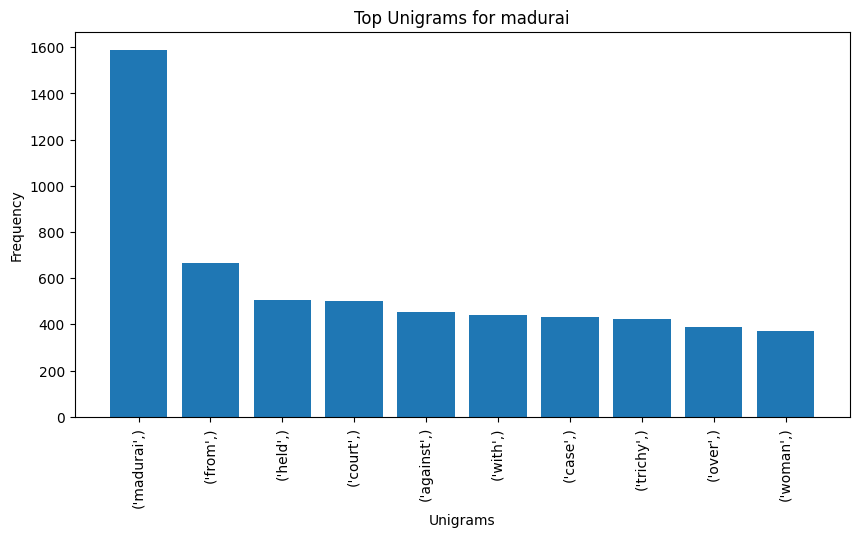

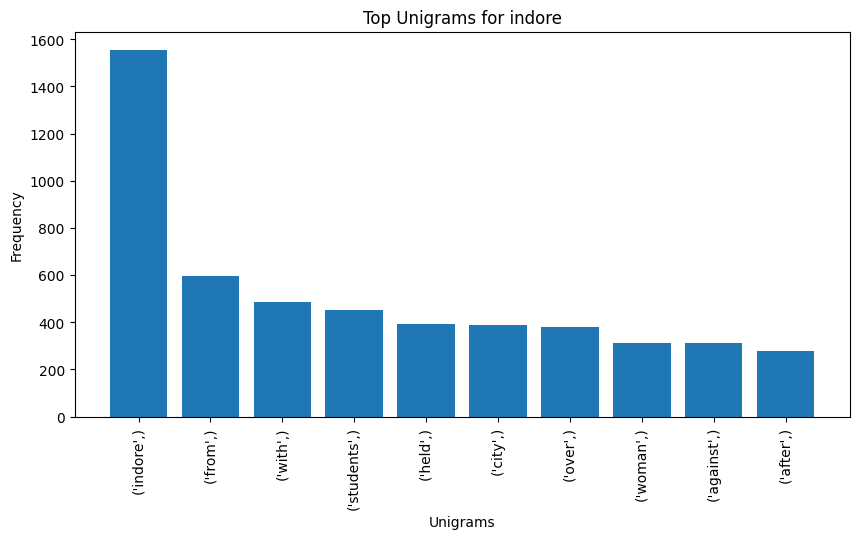

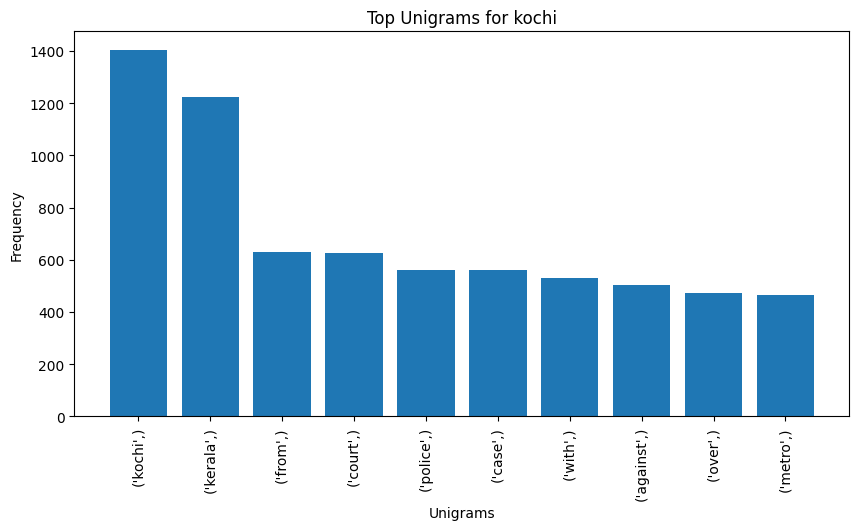

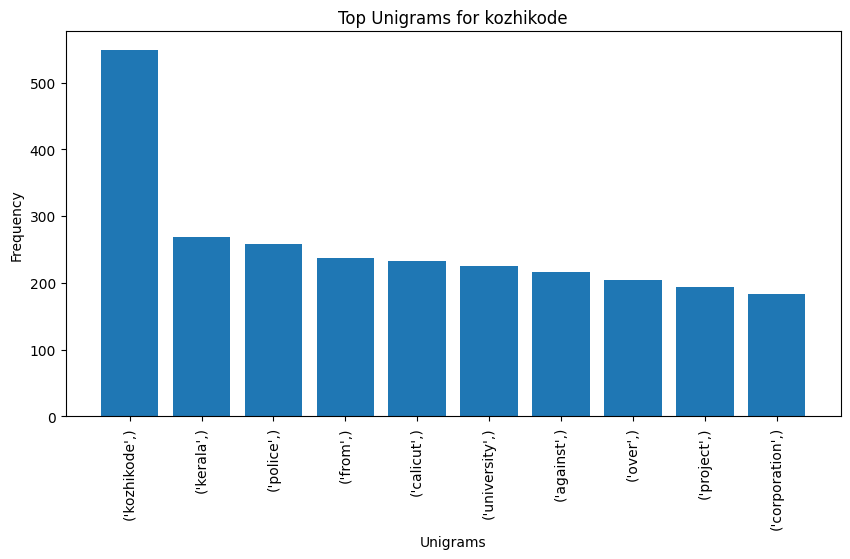

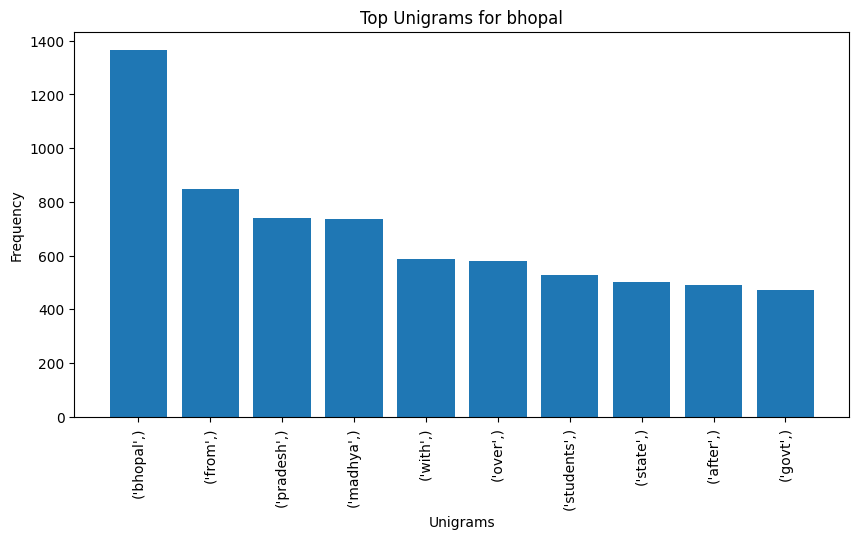

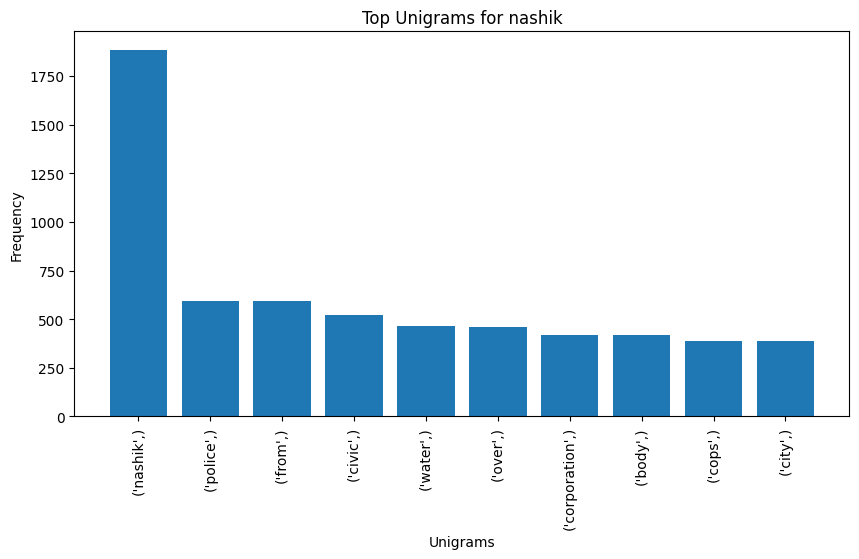

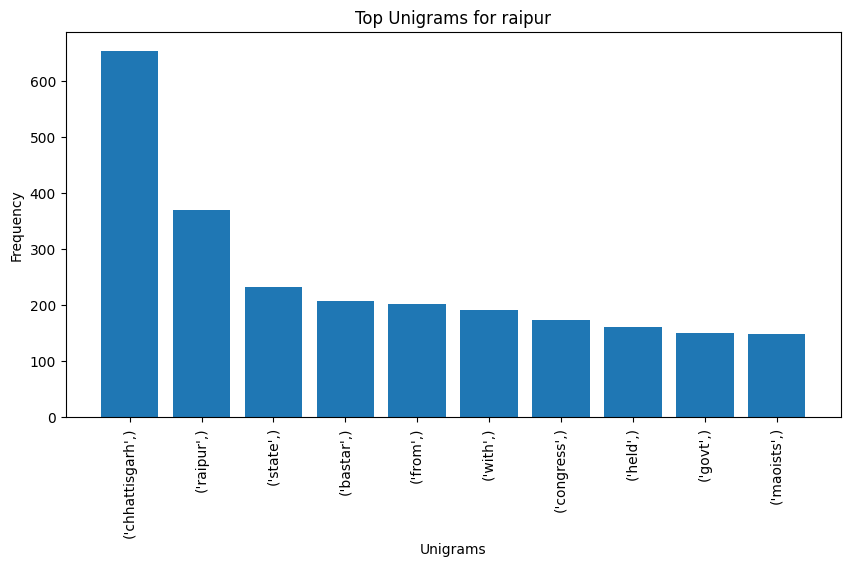

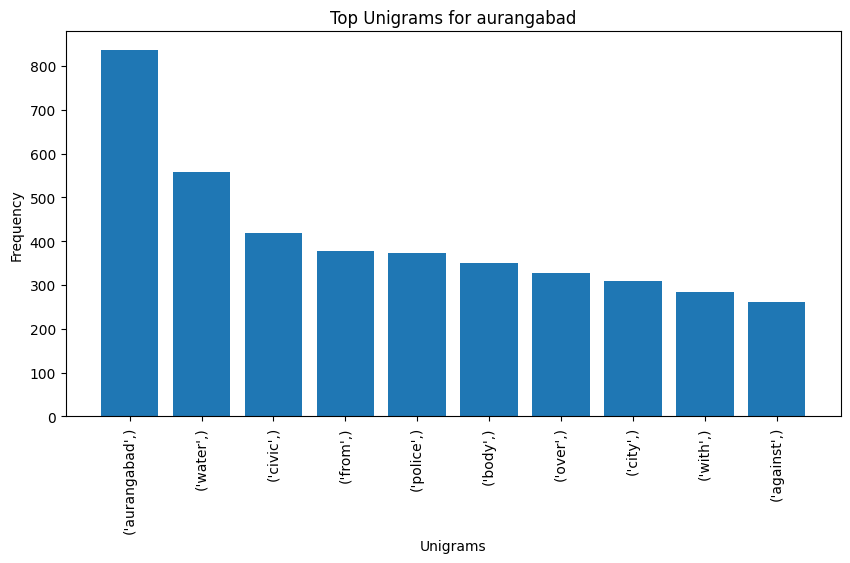

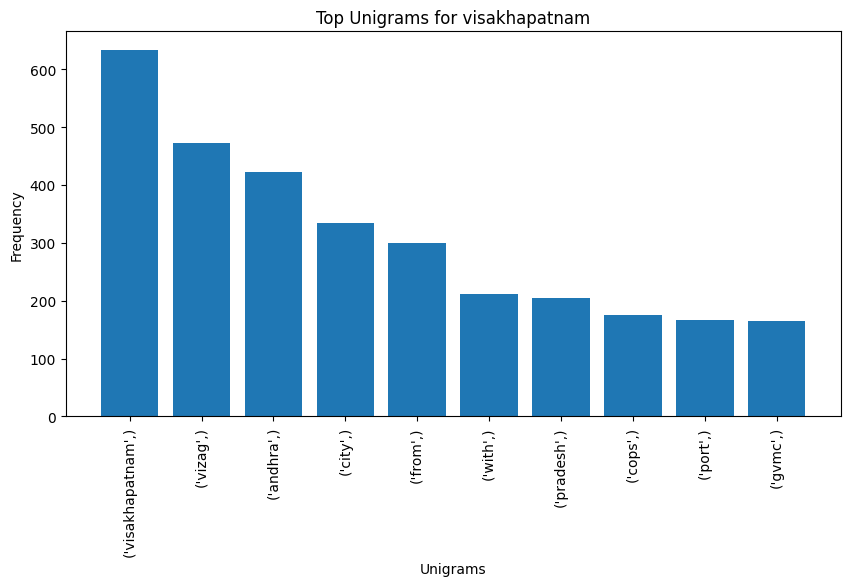

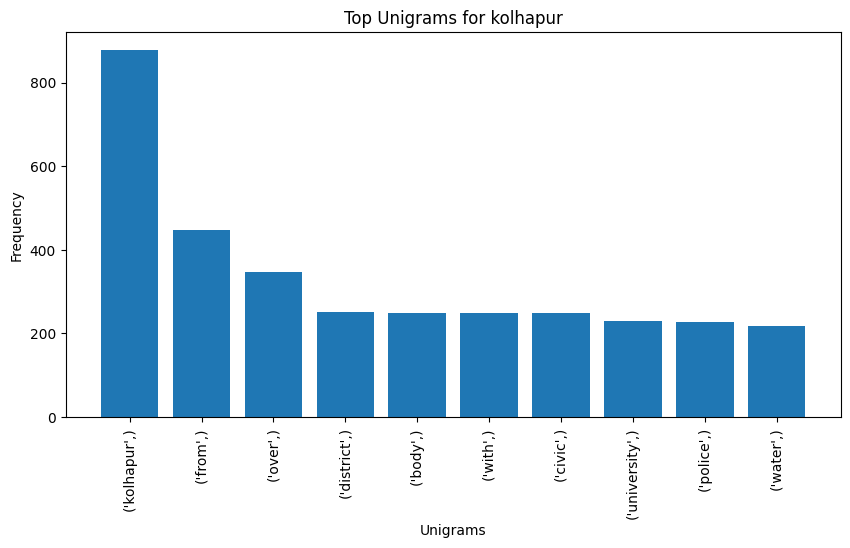

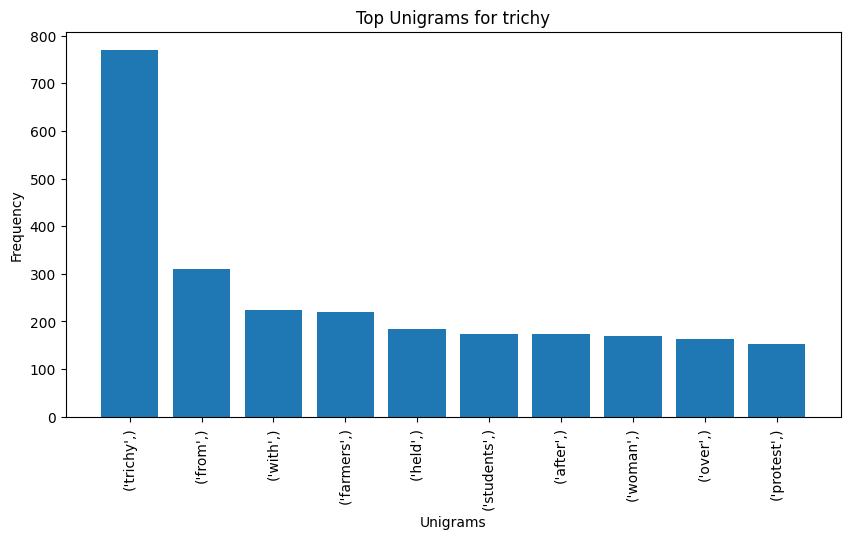

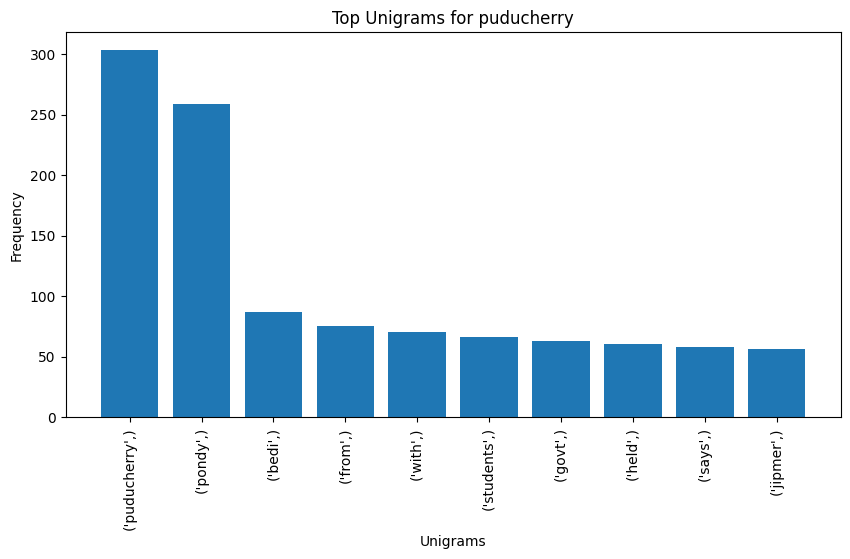

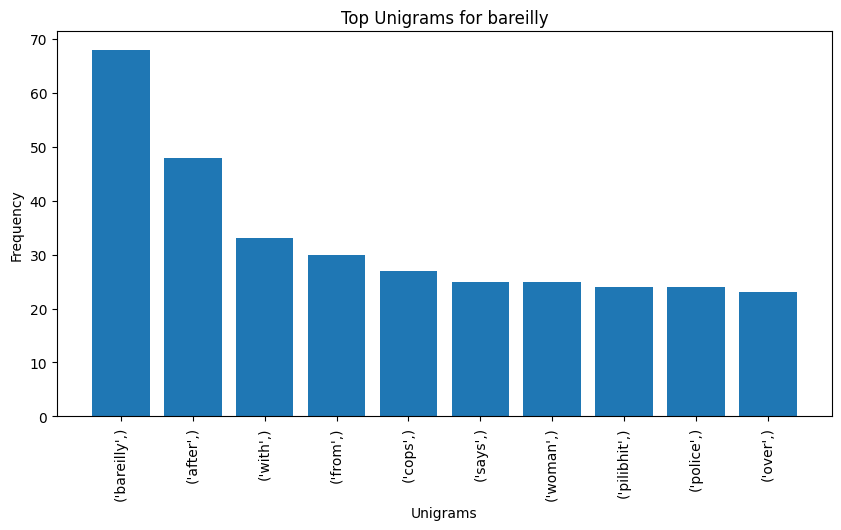

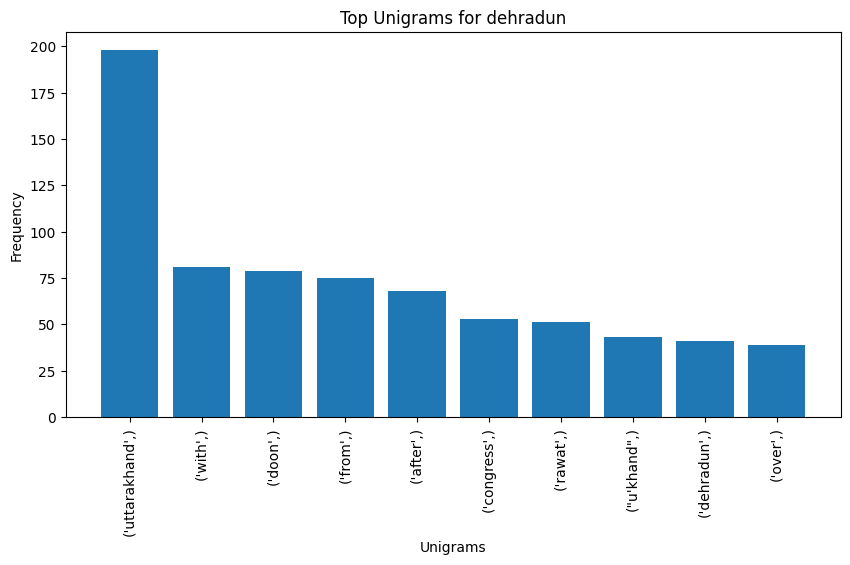

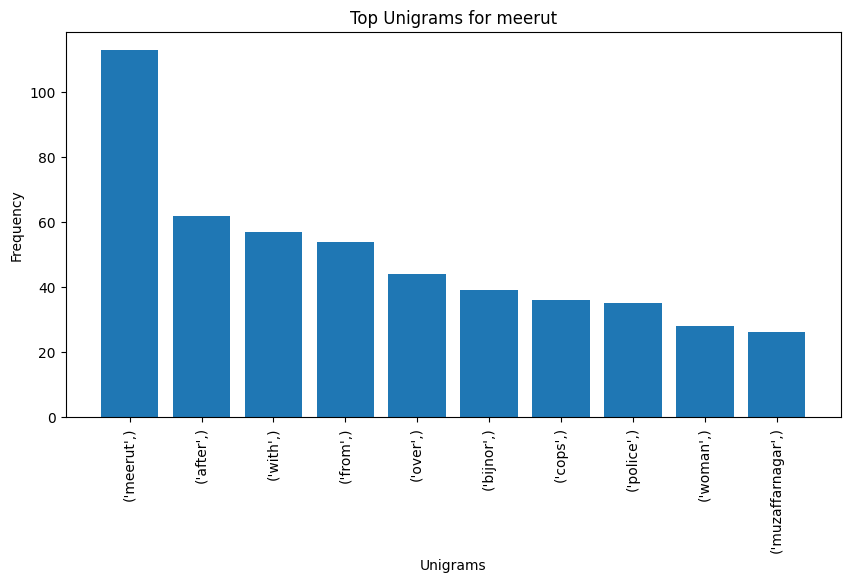

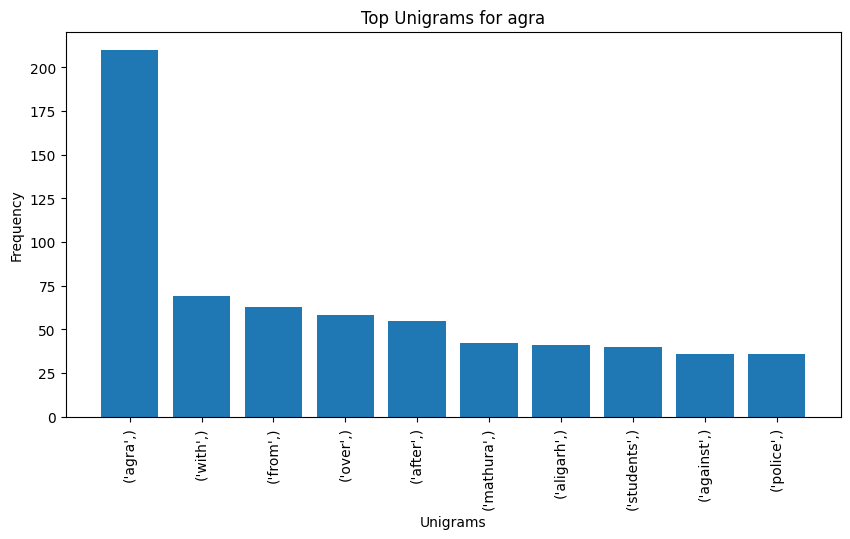

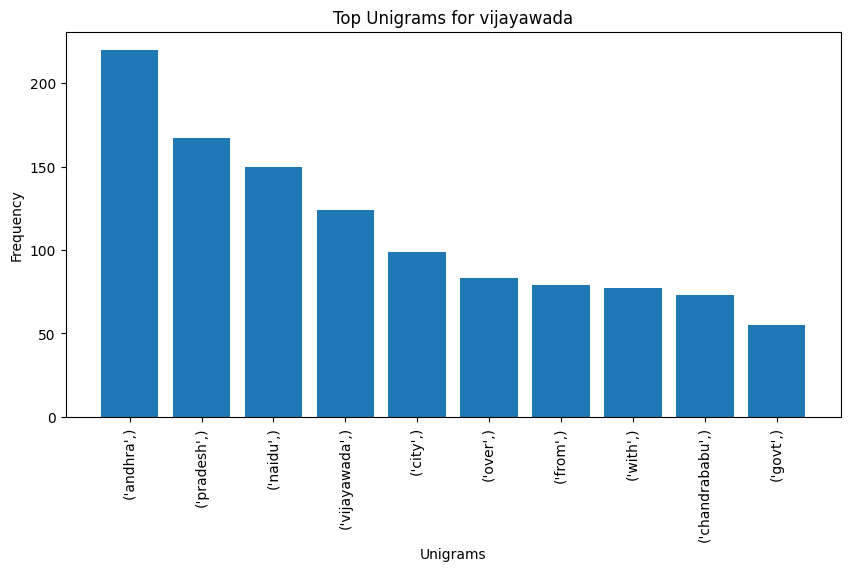

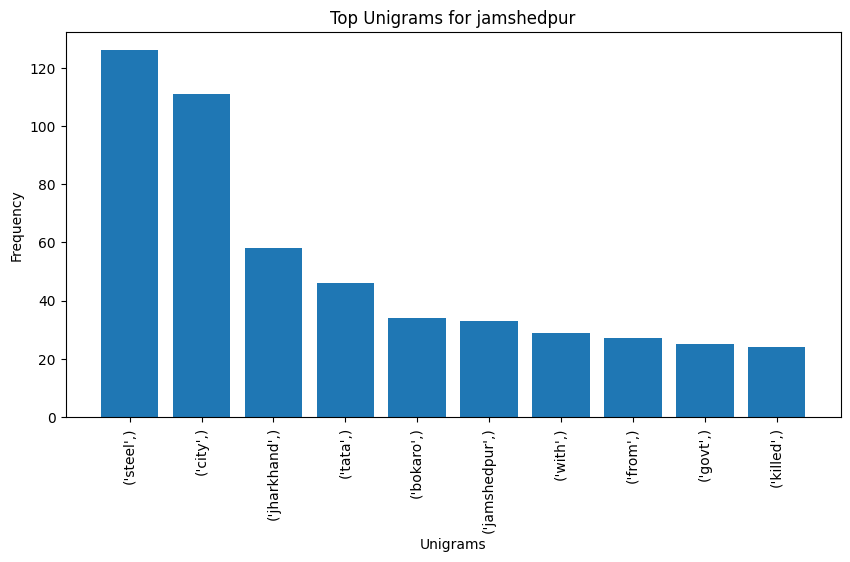

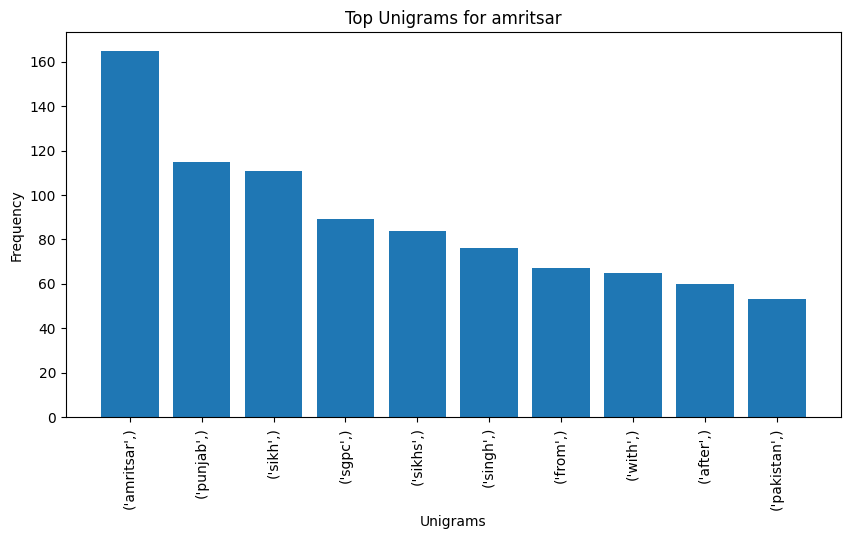

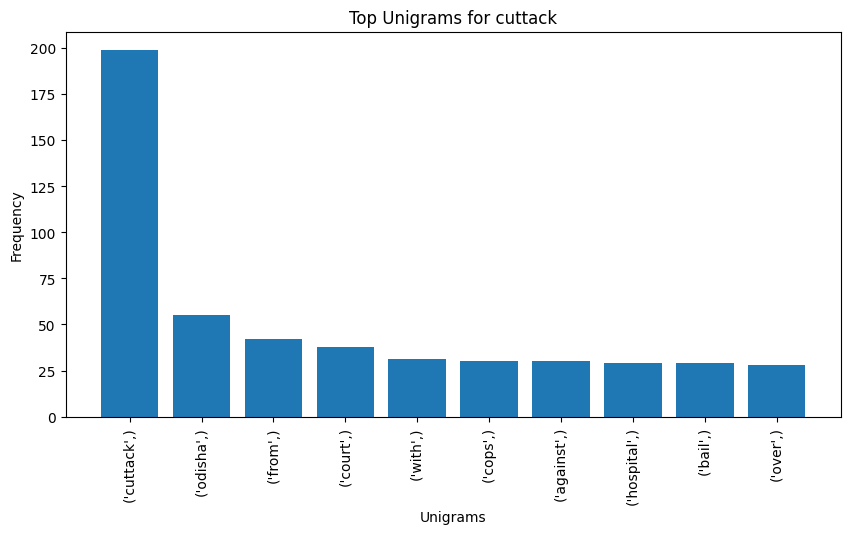

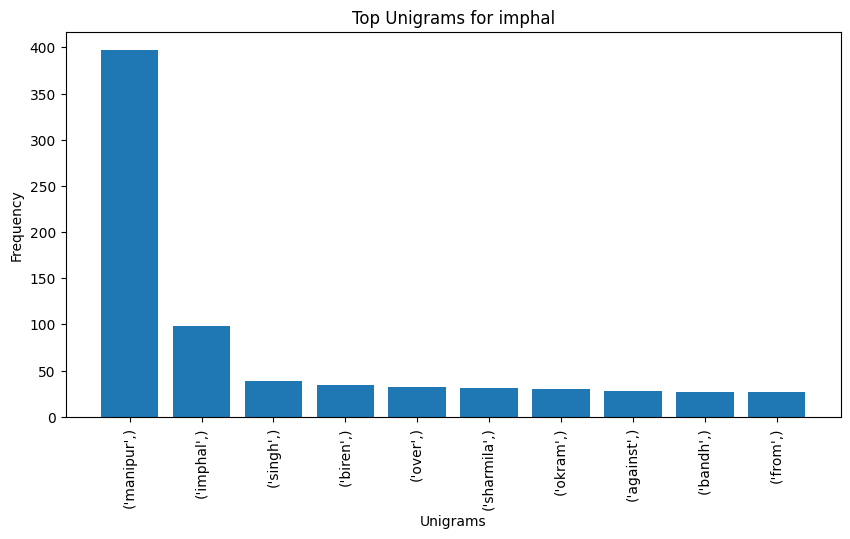

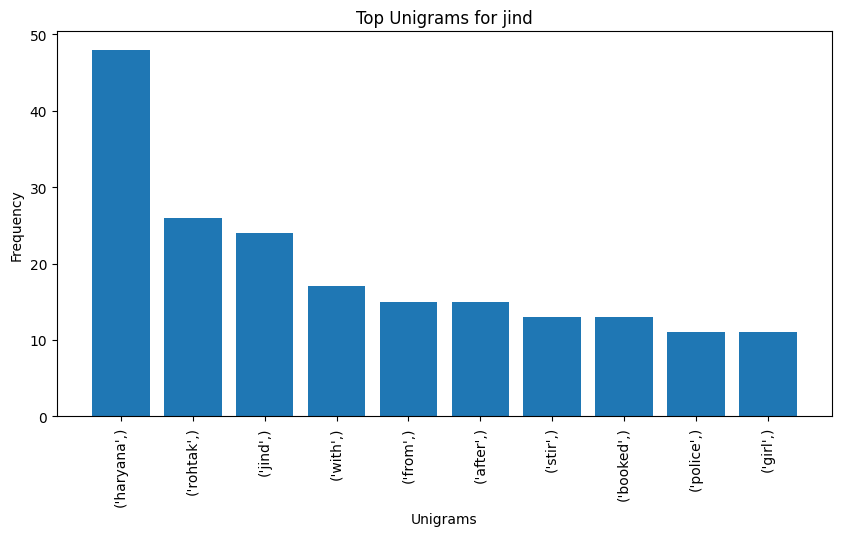

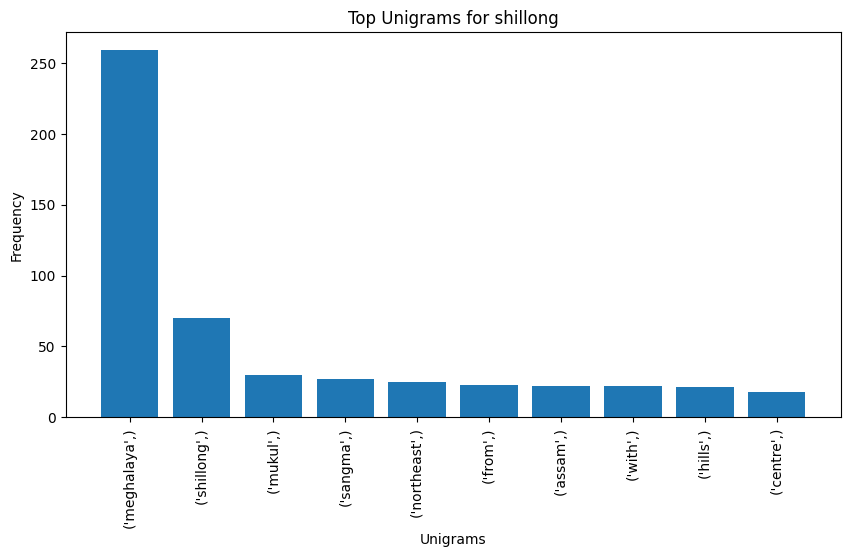

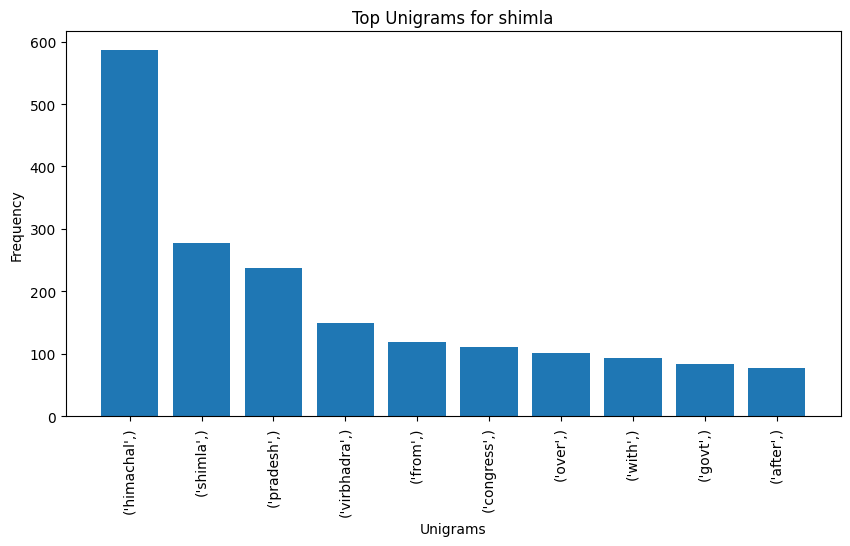

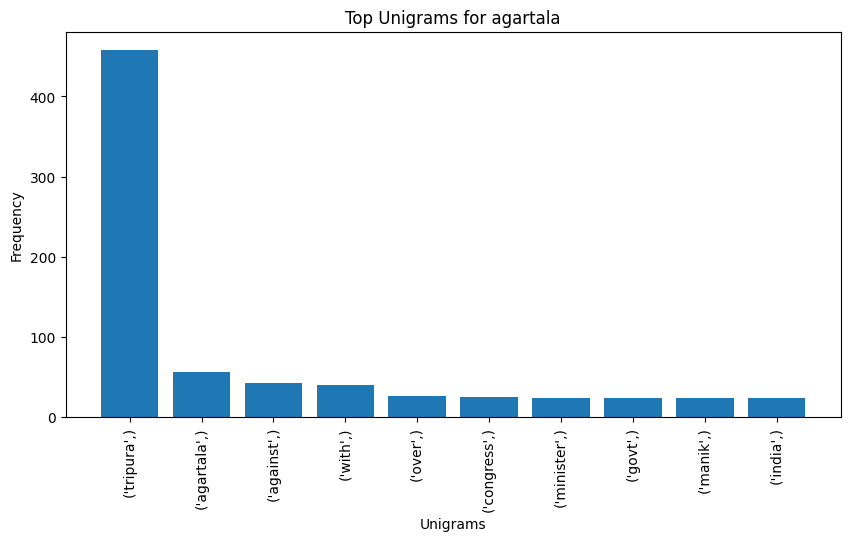

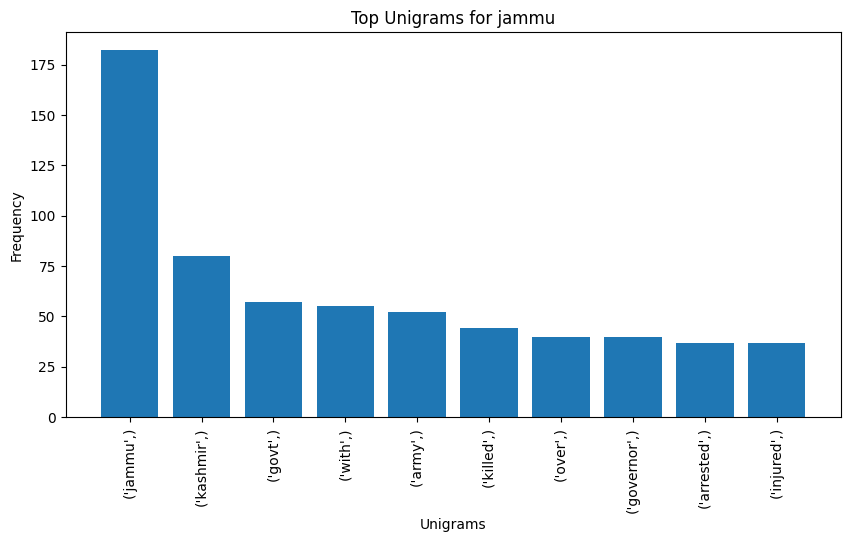

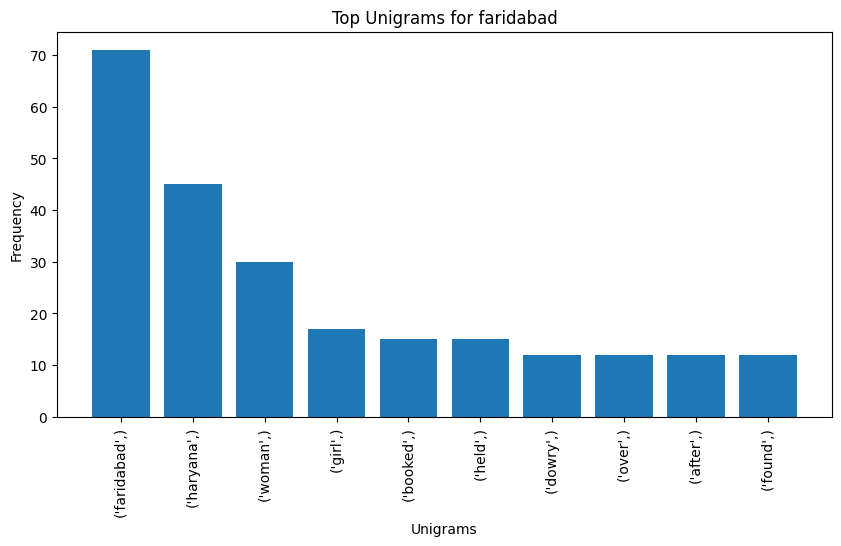

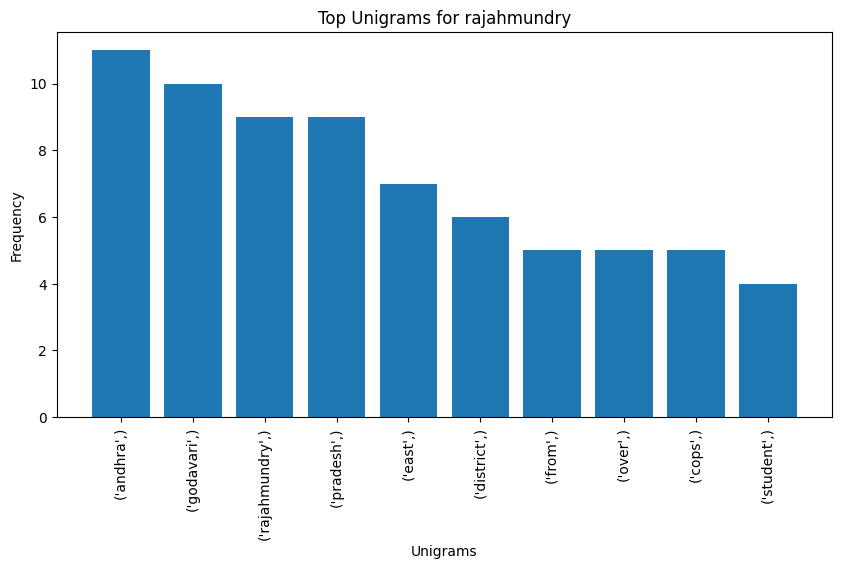

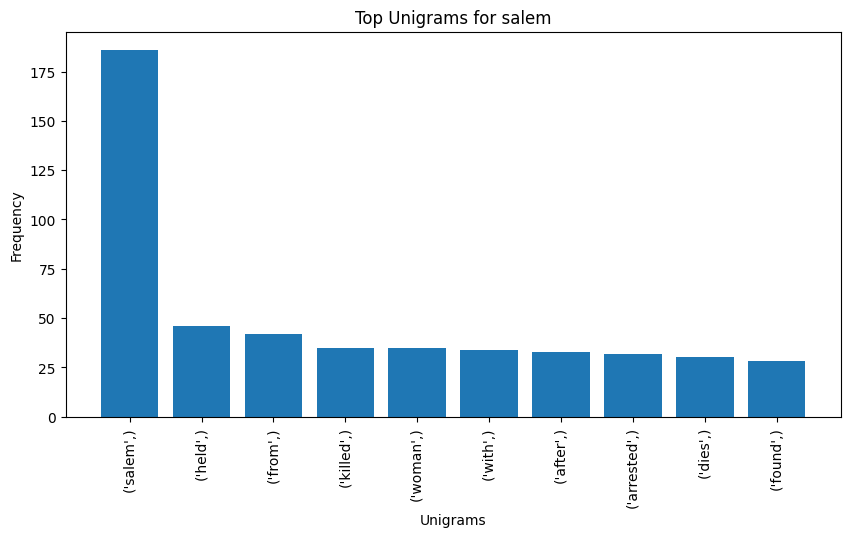

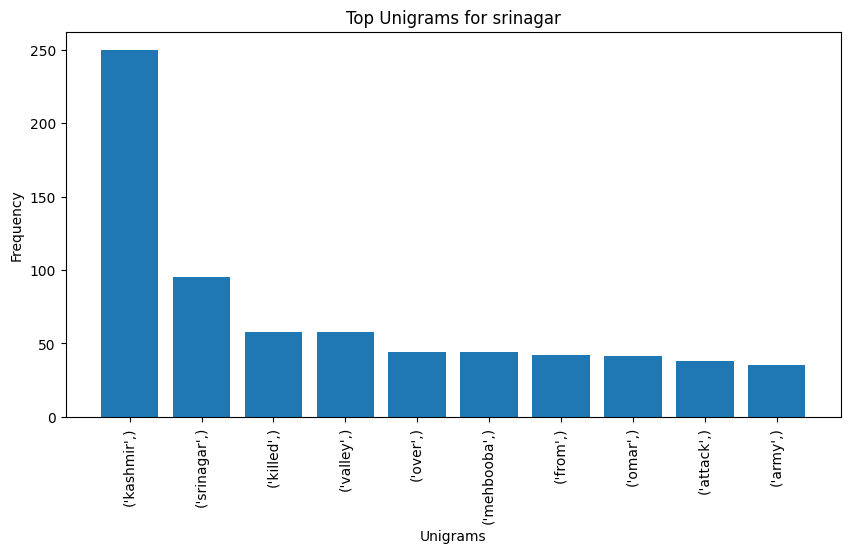

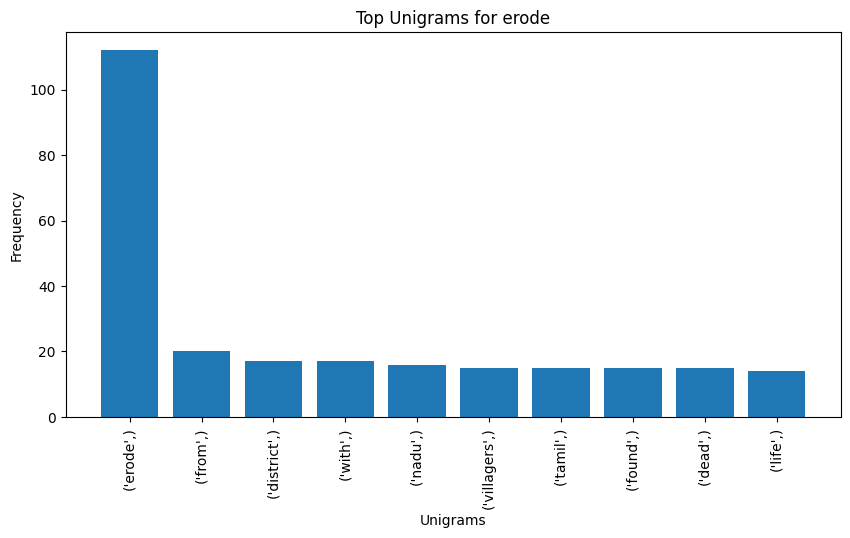

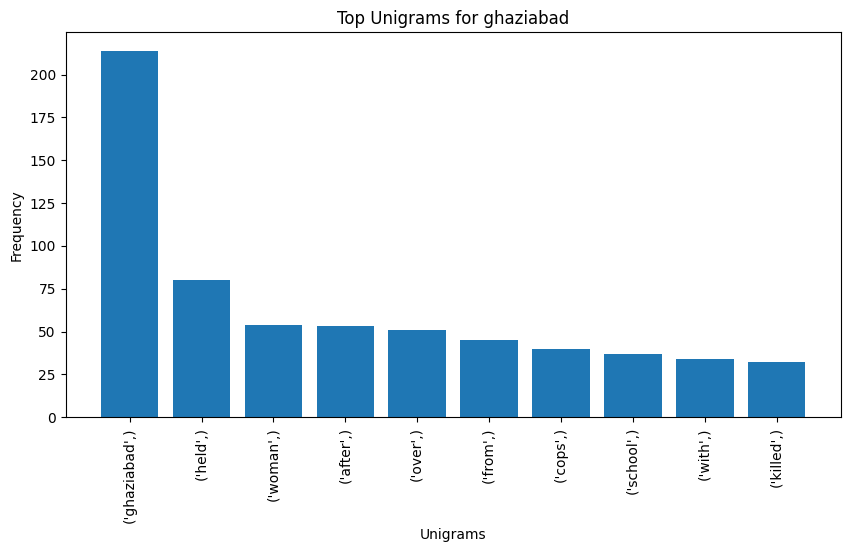

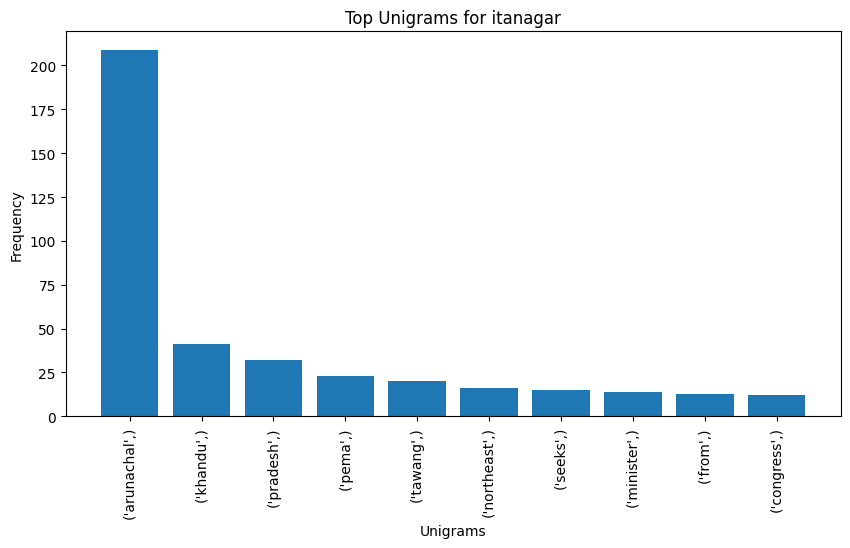

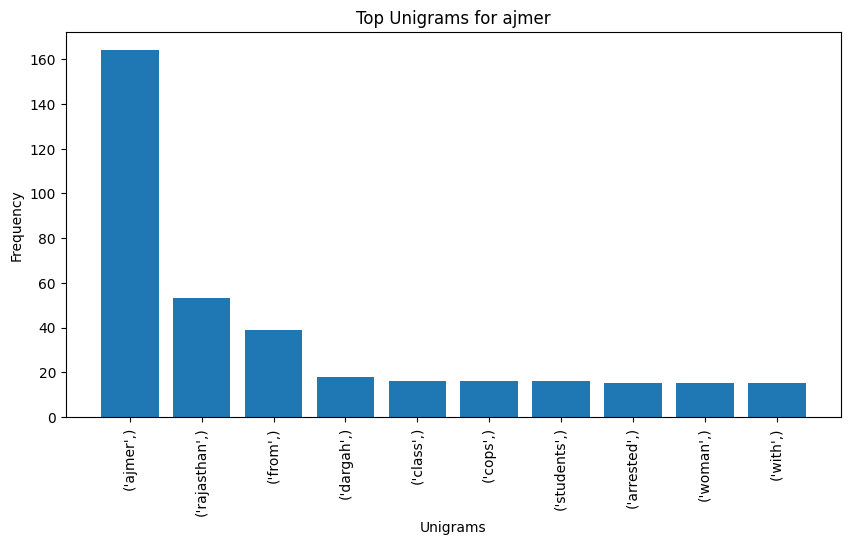

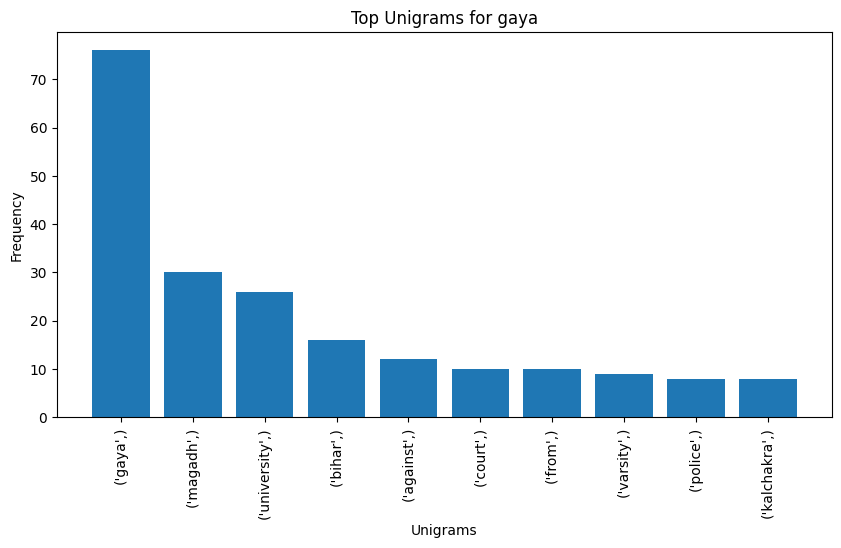

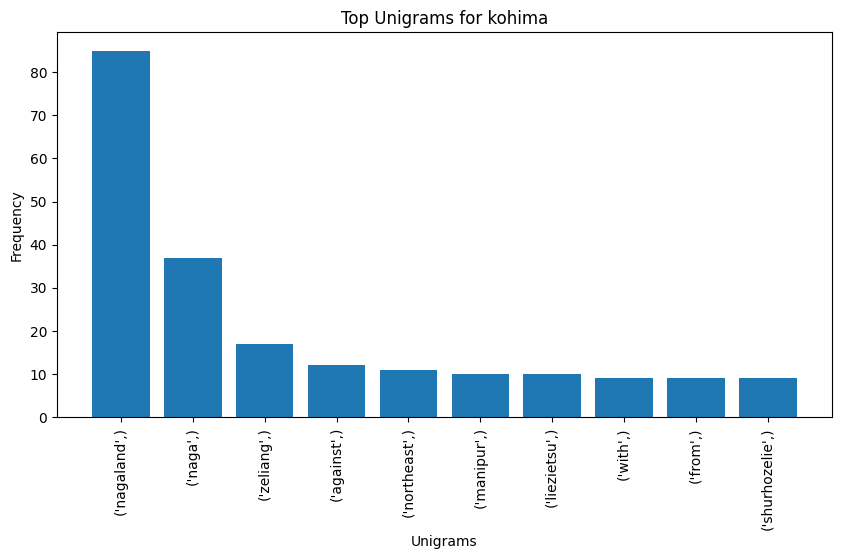

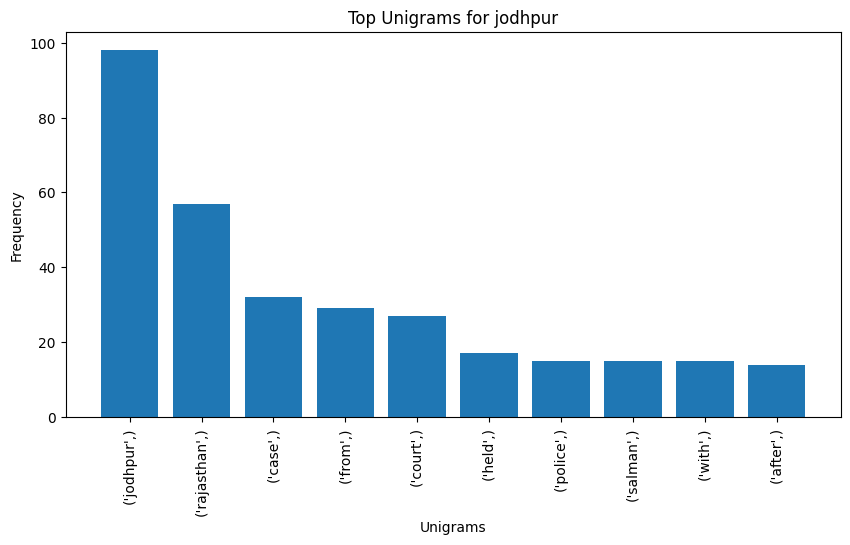

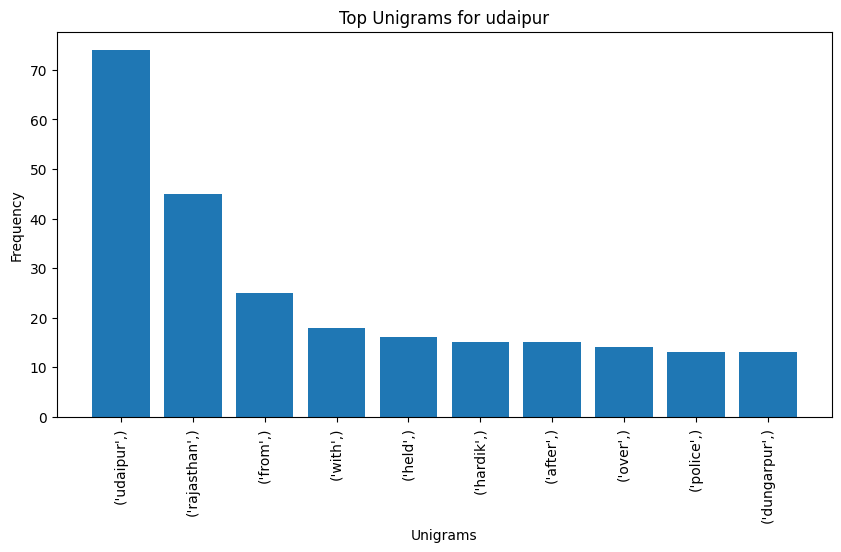

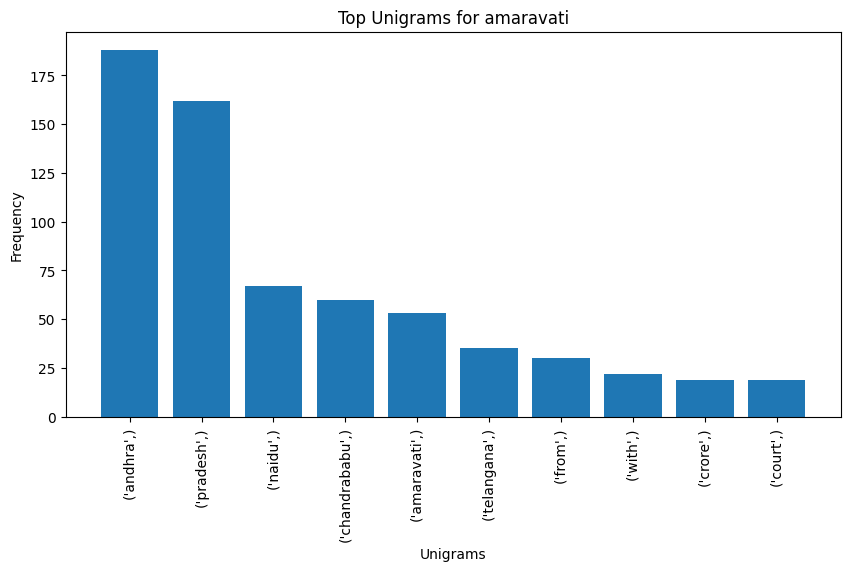

In [ ]:
# plot the frequency of the top unigrams for each city
for i, row in top_ngrams_df.iterrows():
    top_unigrams = row['top_unigrams']
    frequencies = [row['unigram_freq'][unigrams] for unigrams in top_unigrams]
    x_labels = [str(unigram) for unigram in top_unigrams]
    plt.figure(figsize=(10, 5))
    plt.bar(x_labels, frequencies)
    plt.xticks(rotation=90)
    plt.xlabel('Unigrams')
    plt.ylabel('Frequency')
    plt.title(f"Top Unigrams for {row['city_name']}")
    plt.show()

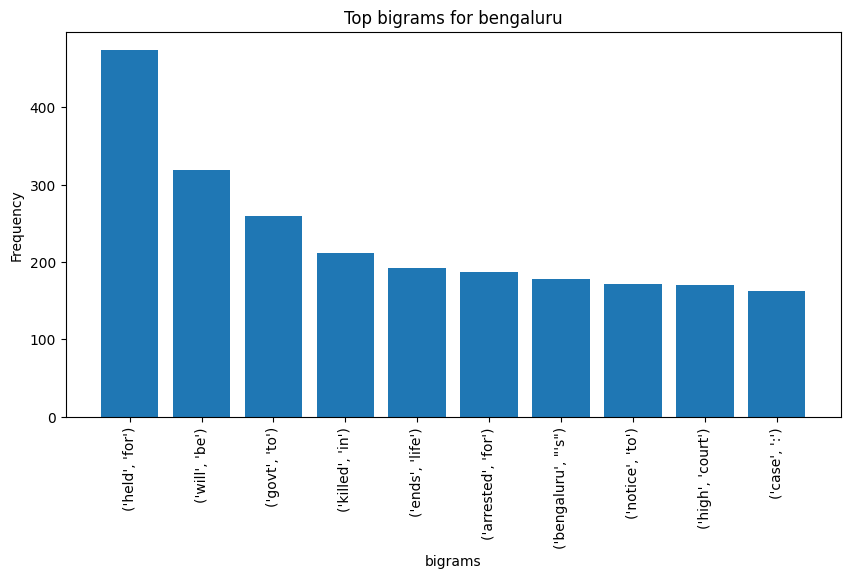

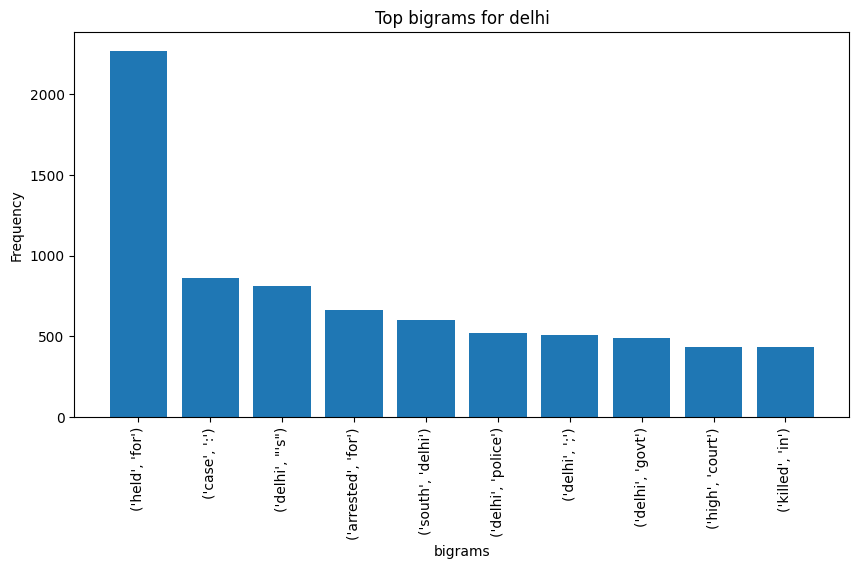

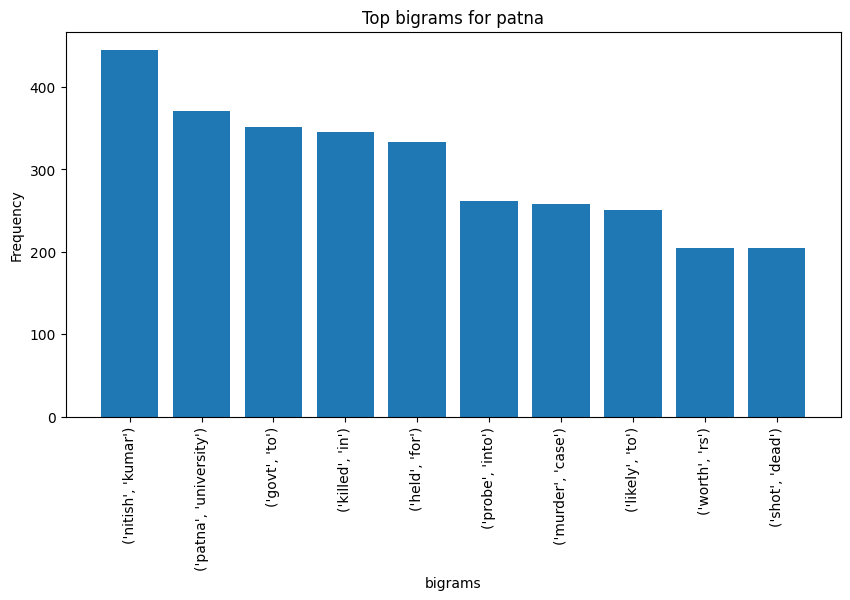

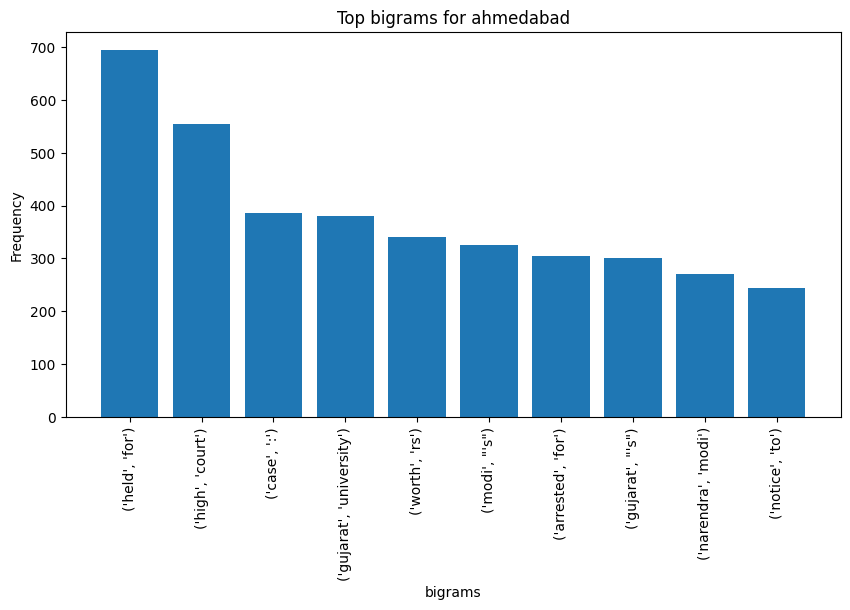

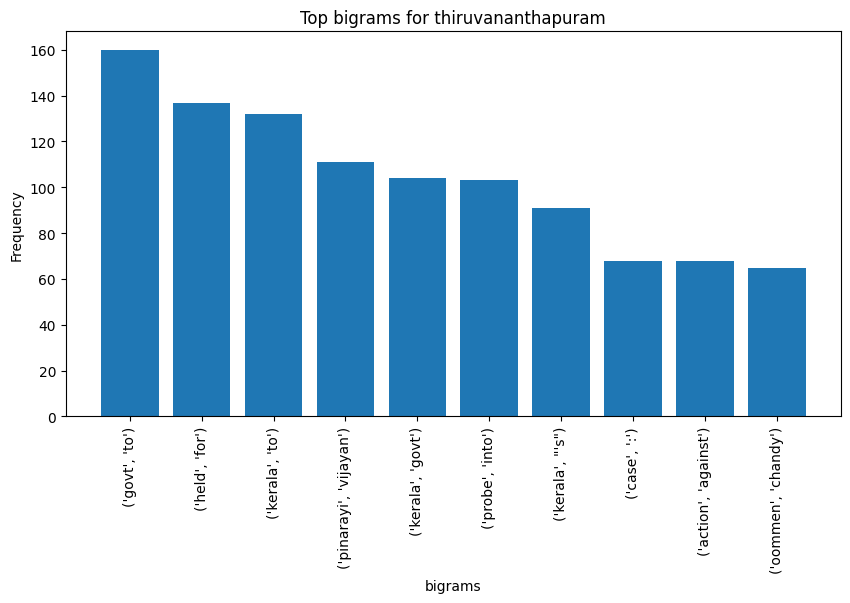

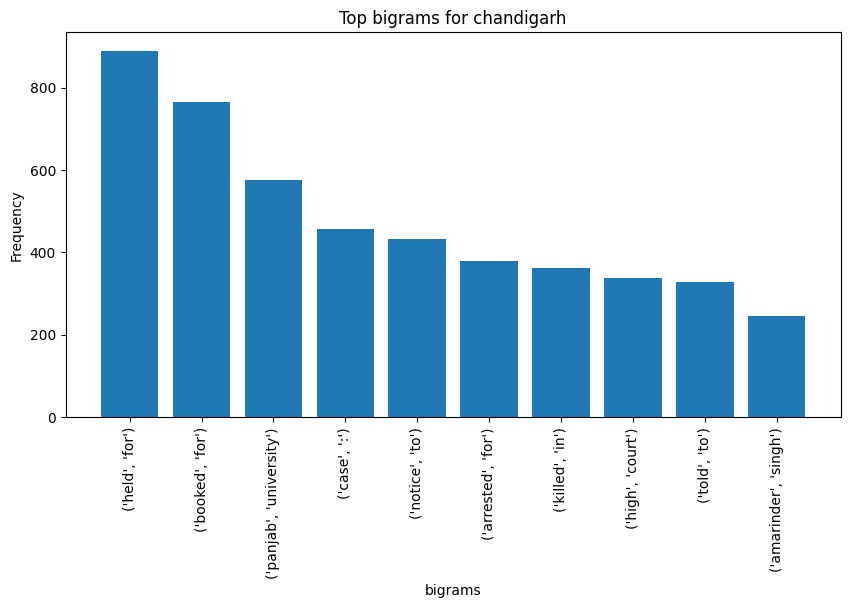

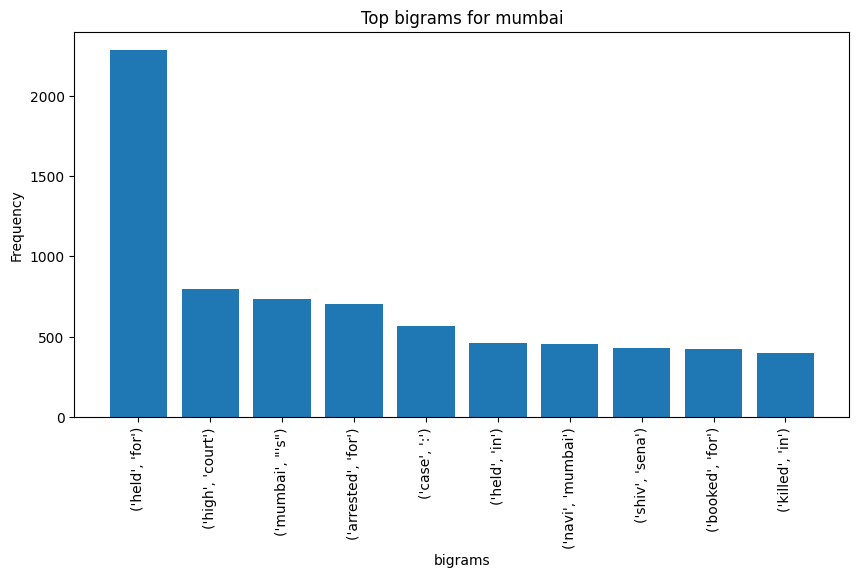

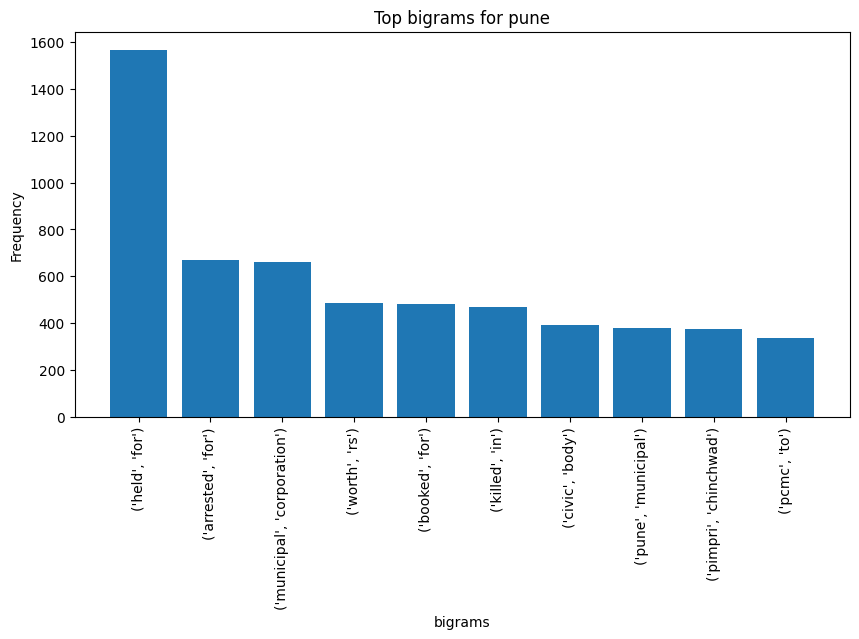

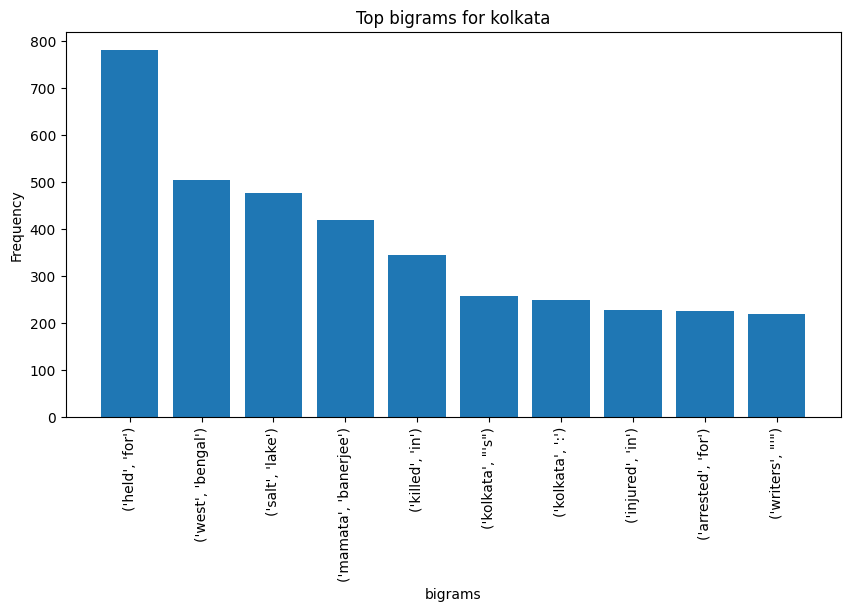

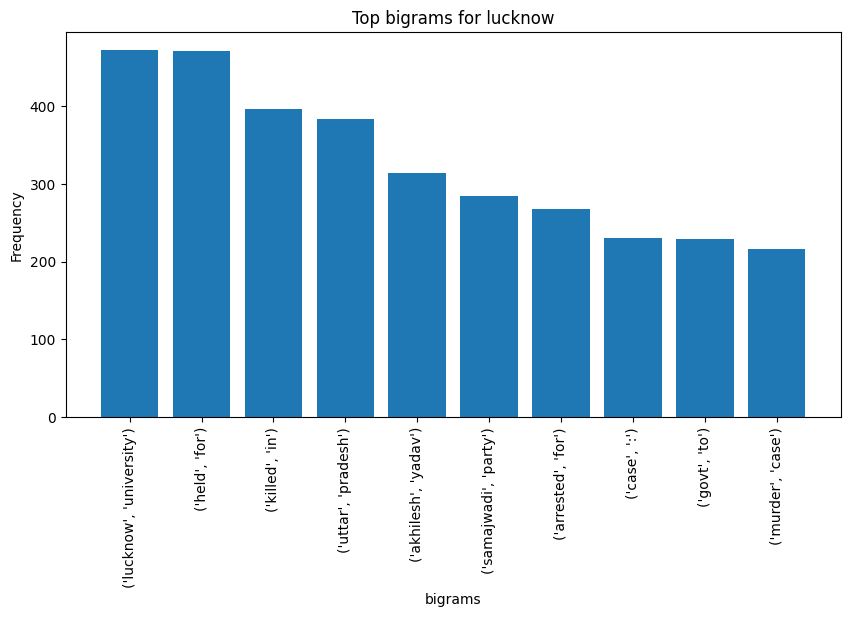

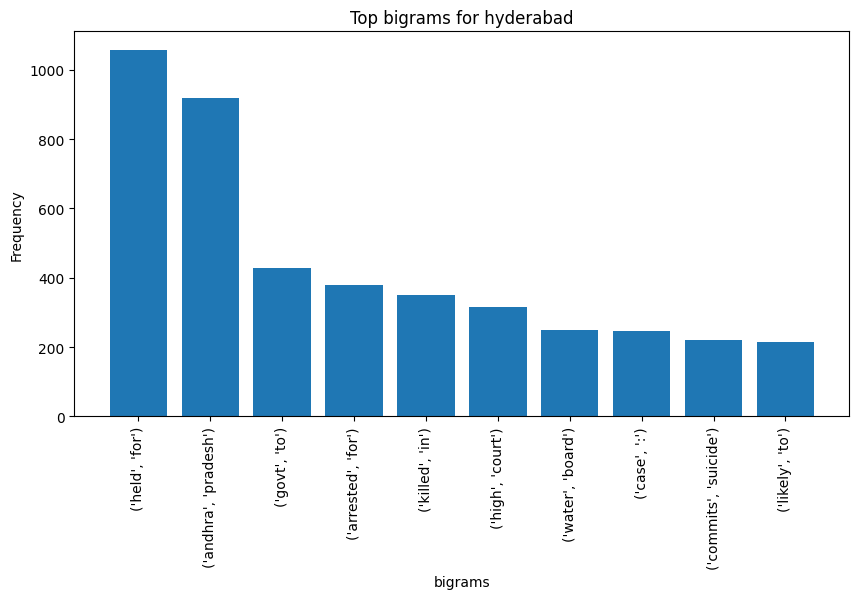

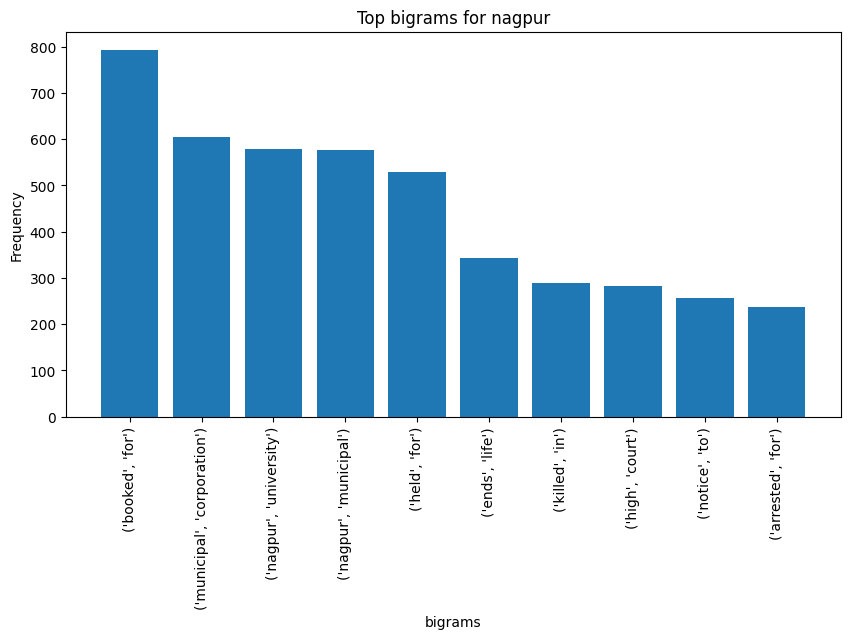

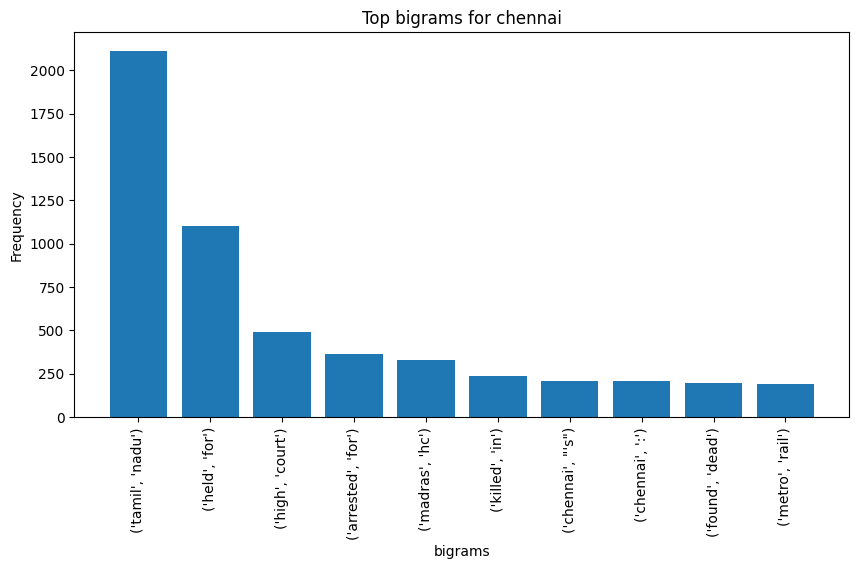

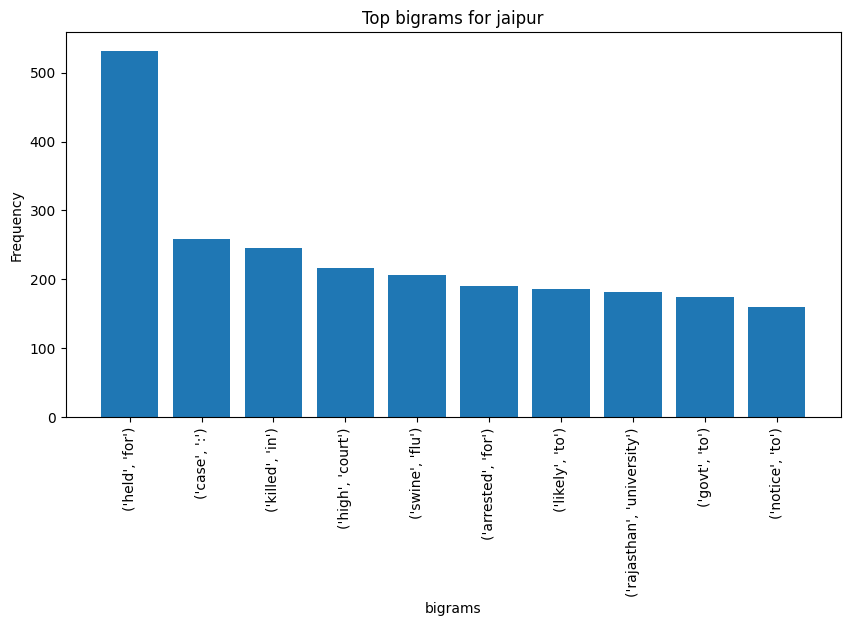

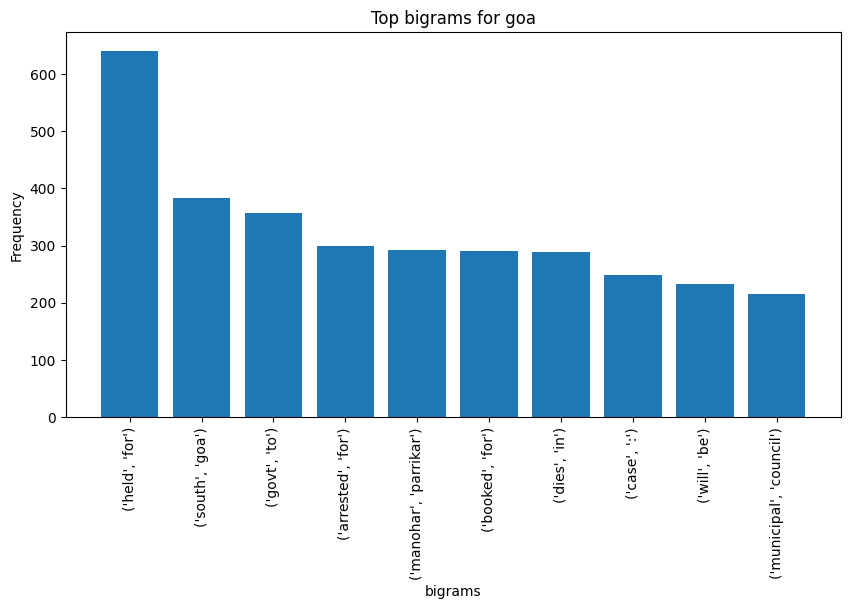

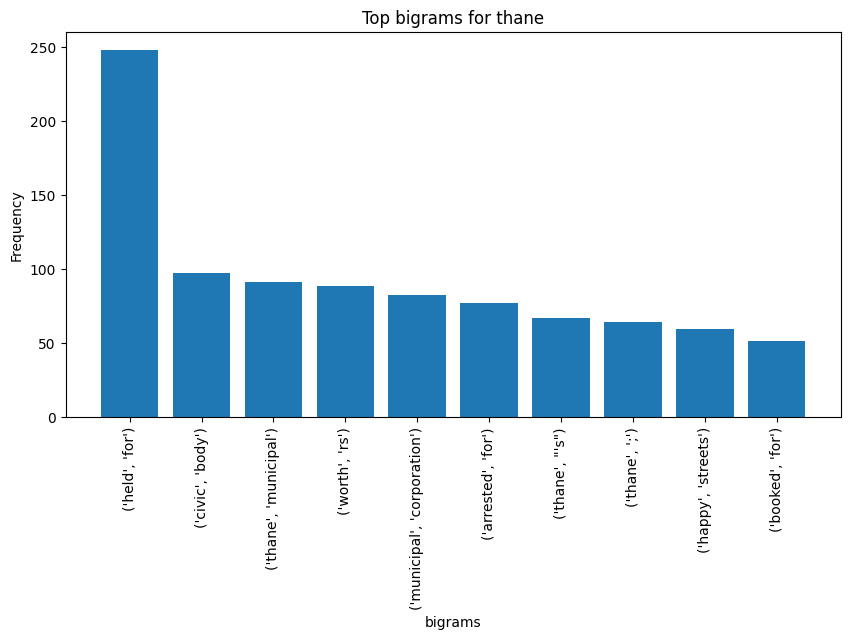

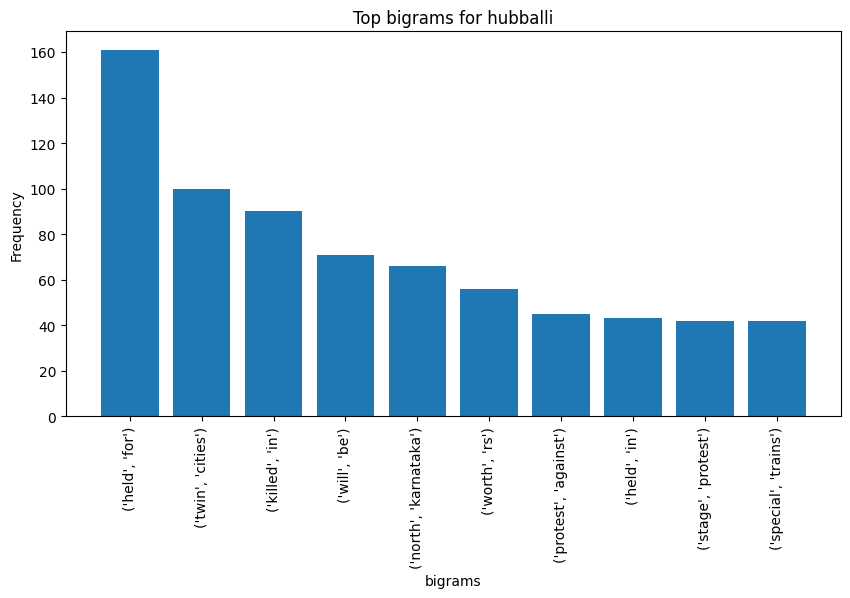

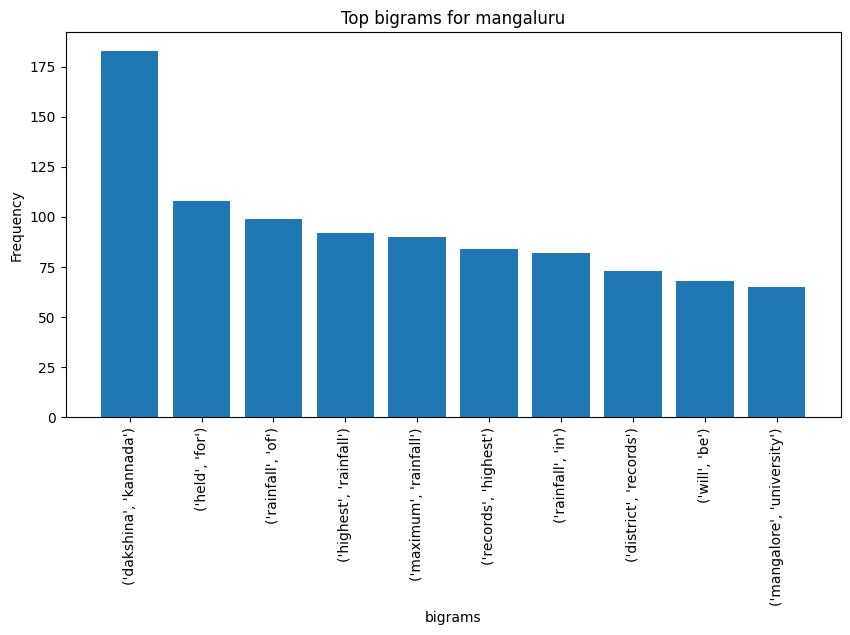

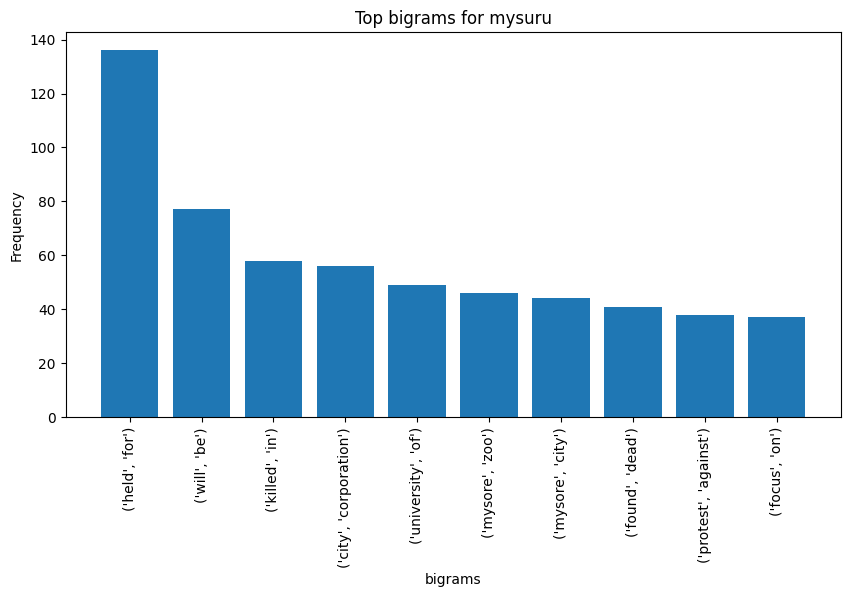

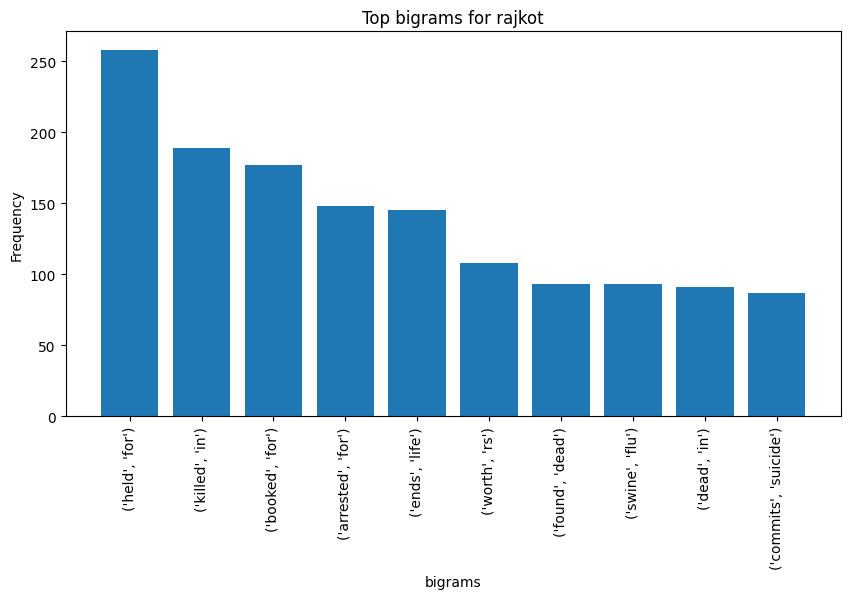

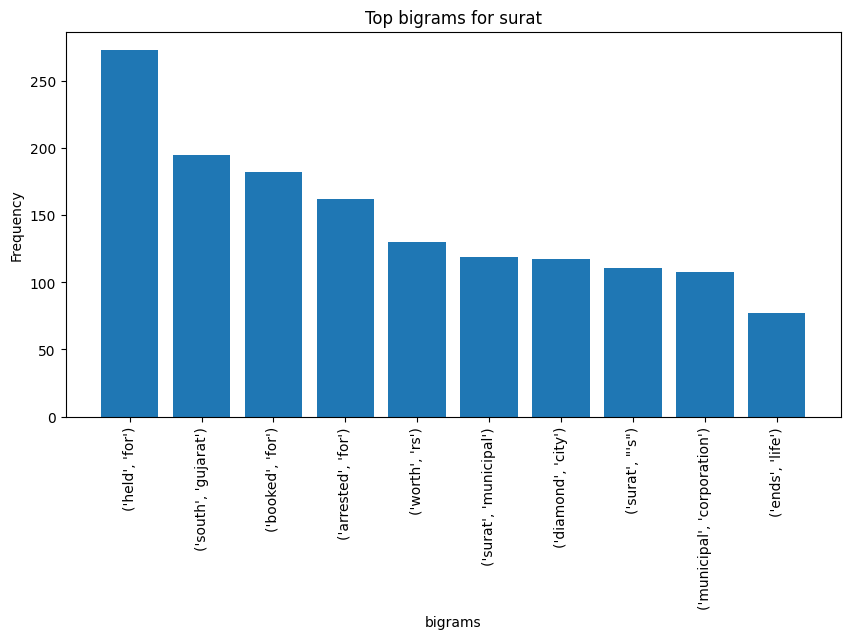

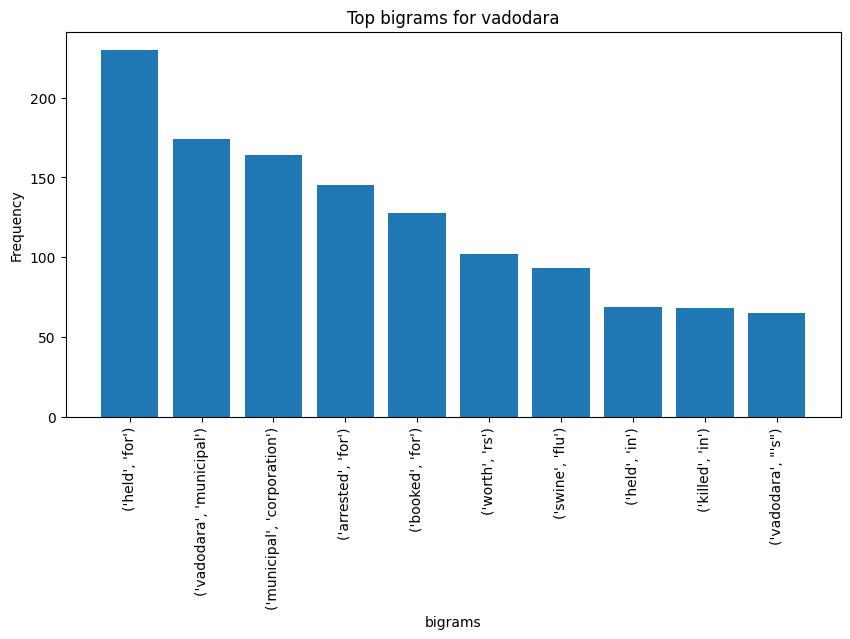

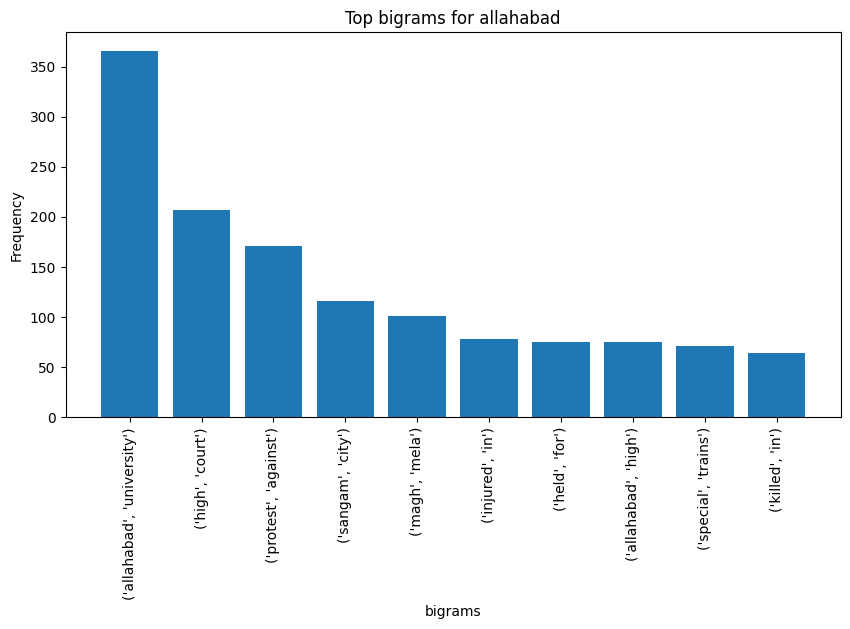

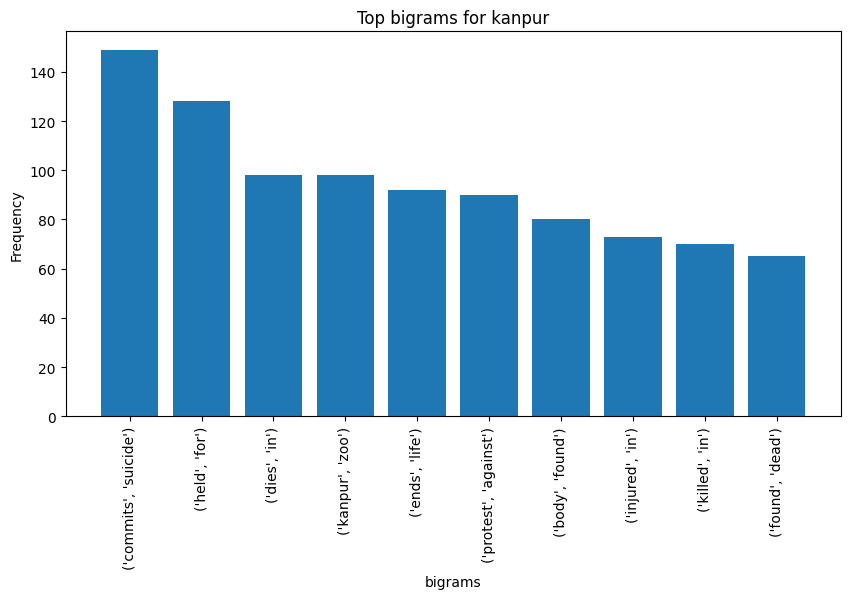

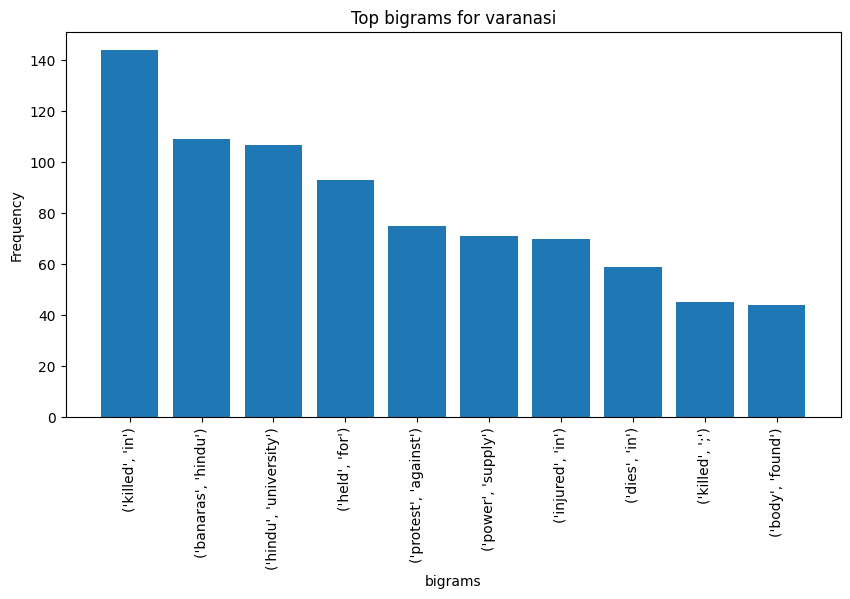

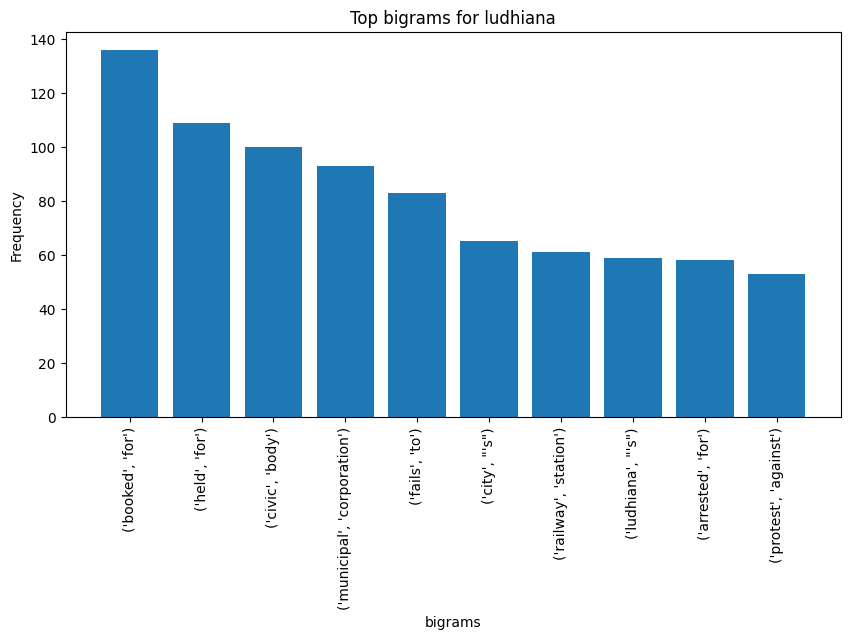

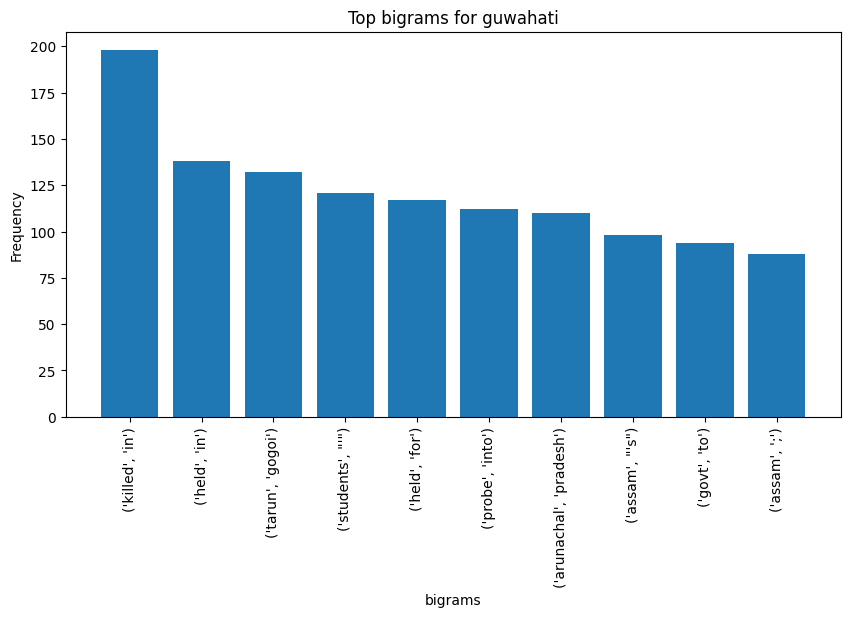

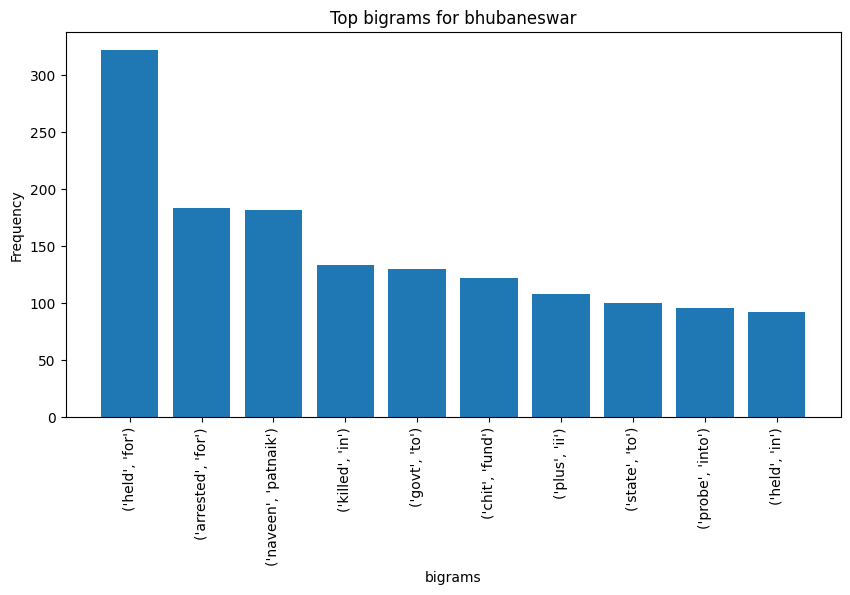

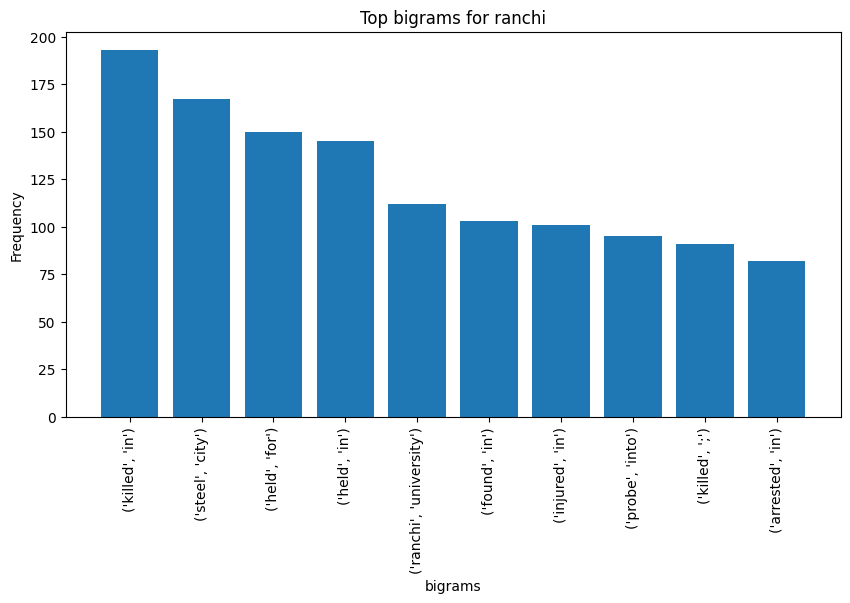

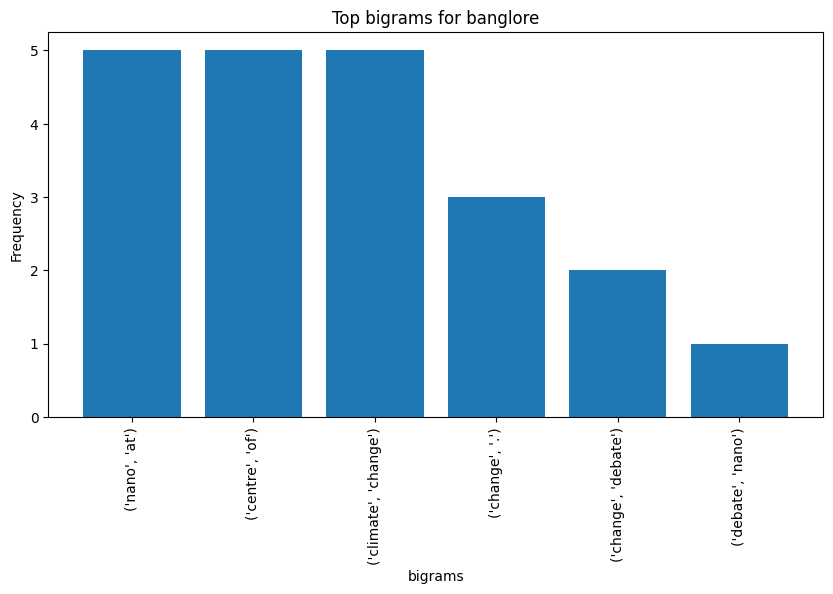

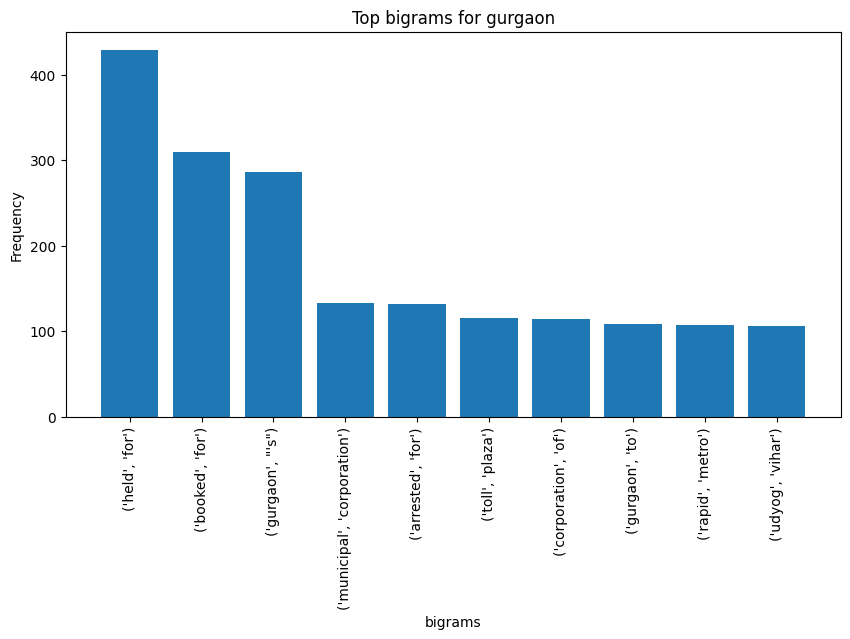

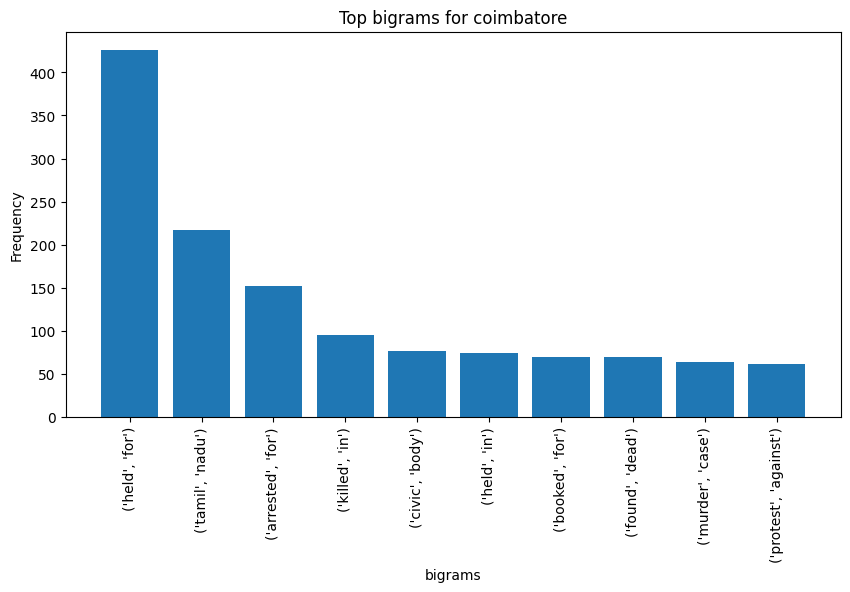

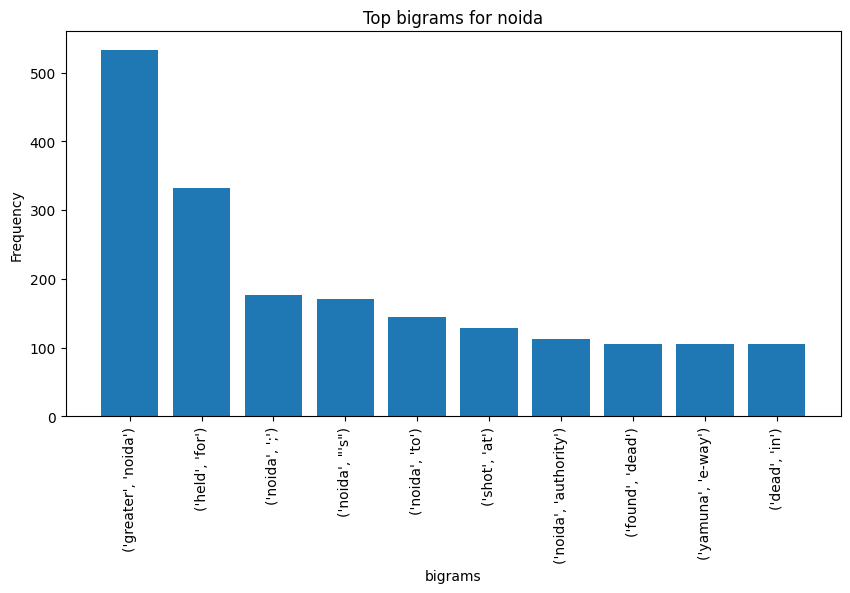

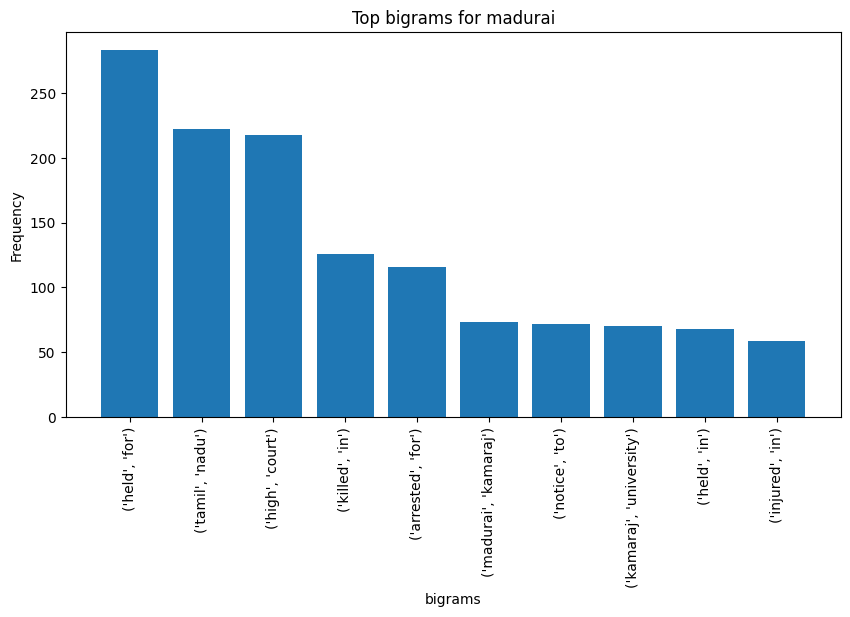

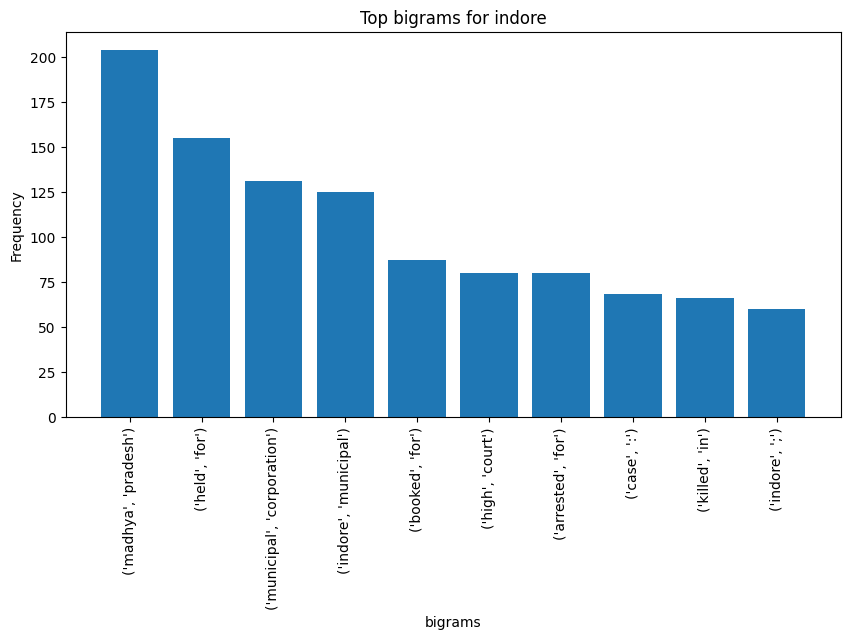

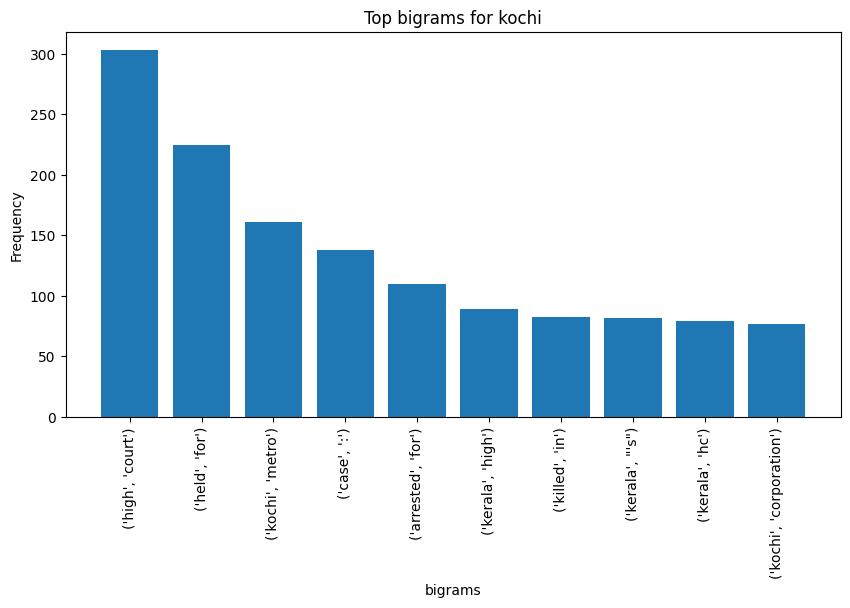

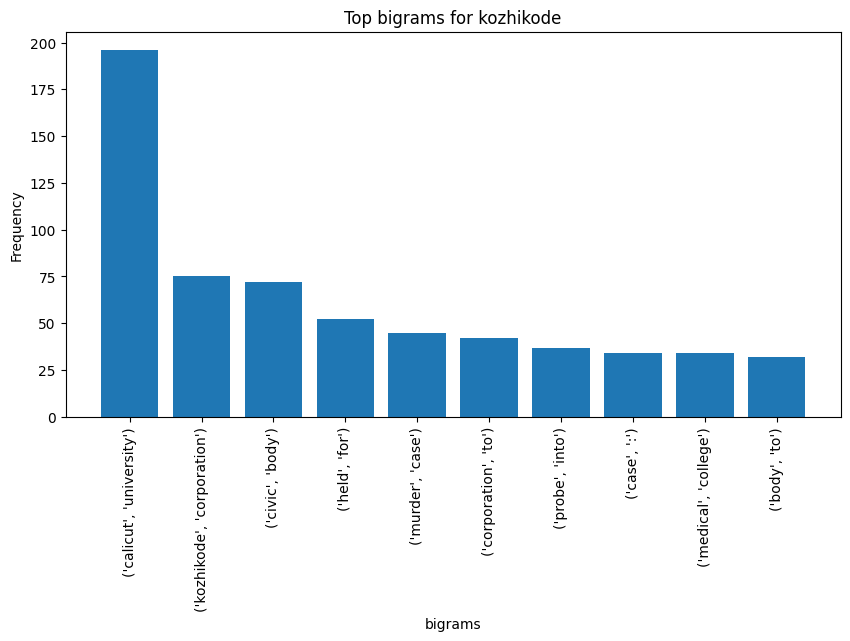

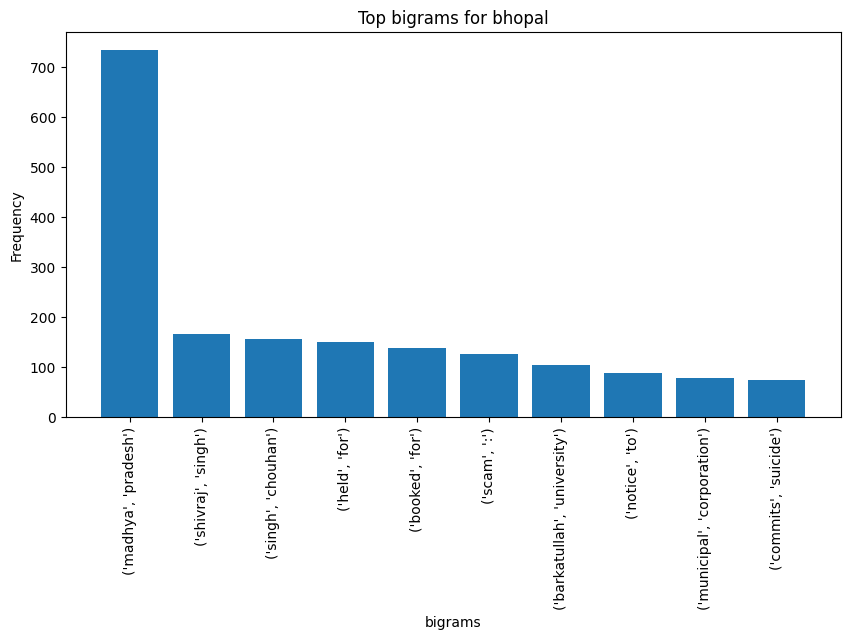

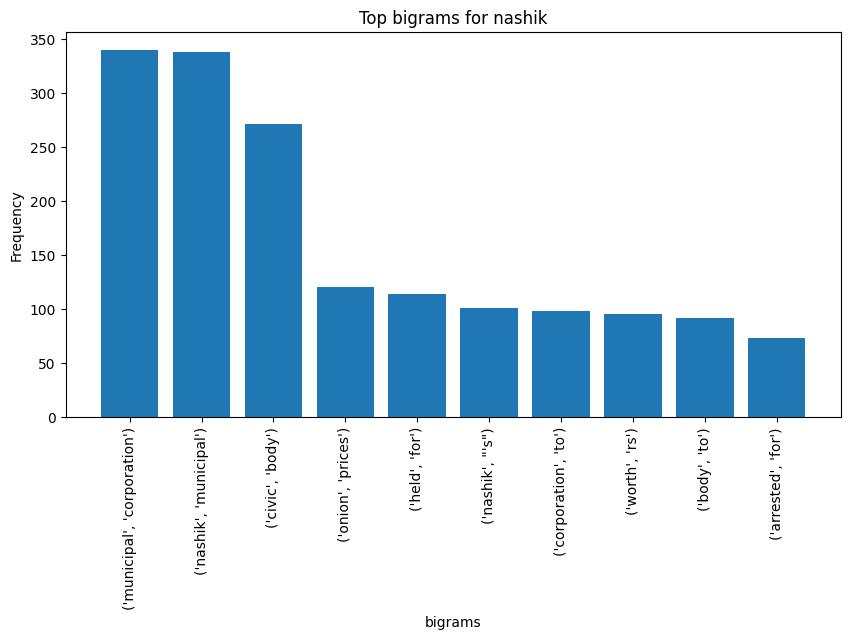

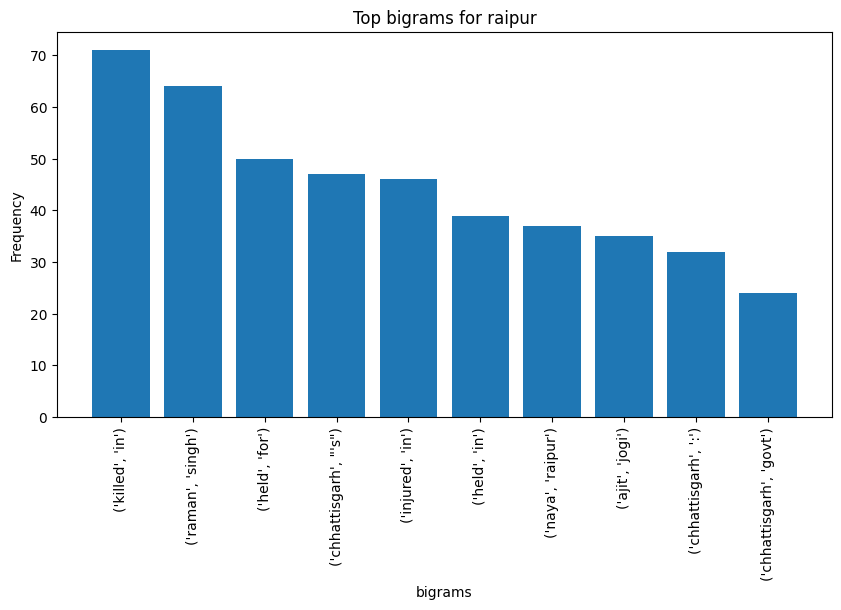

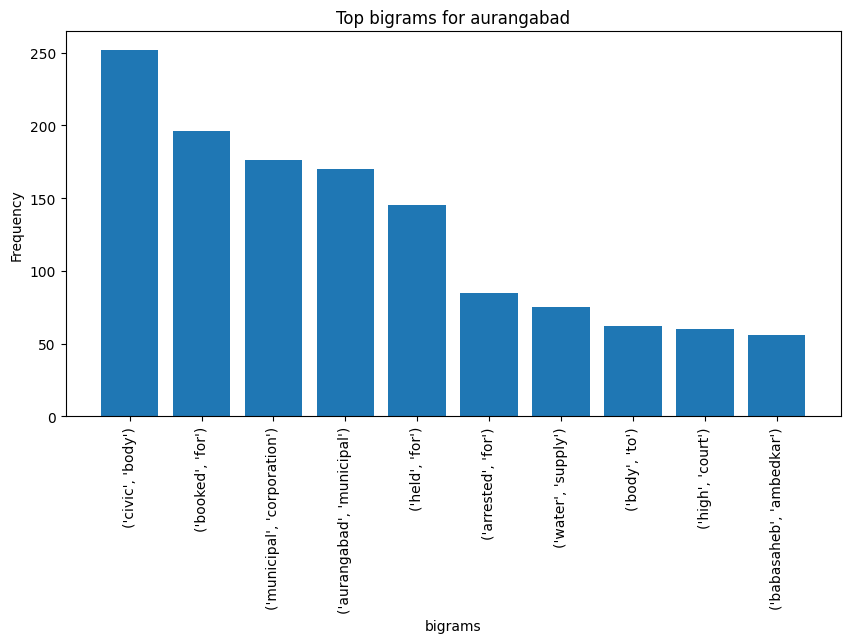

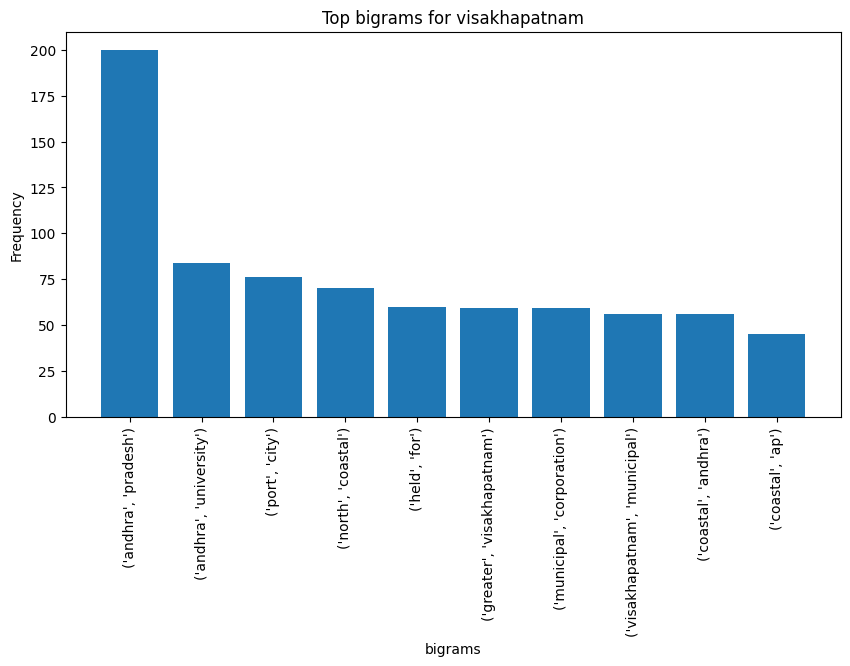

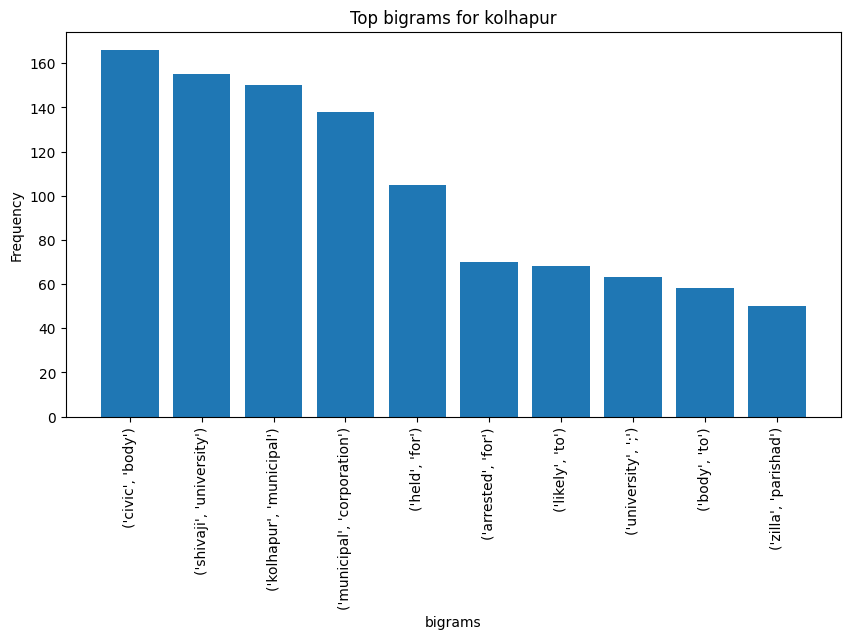

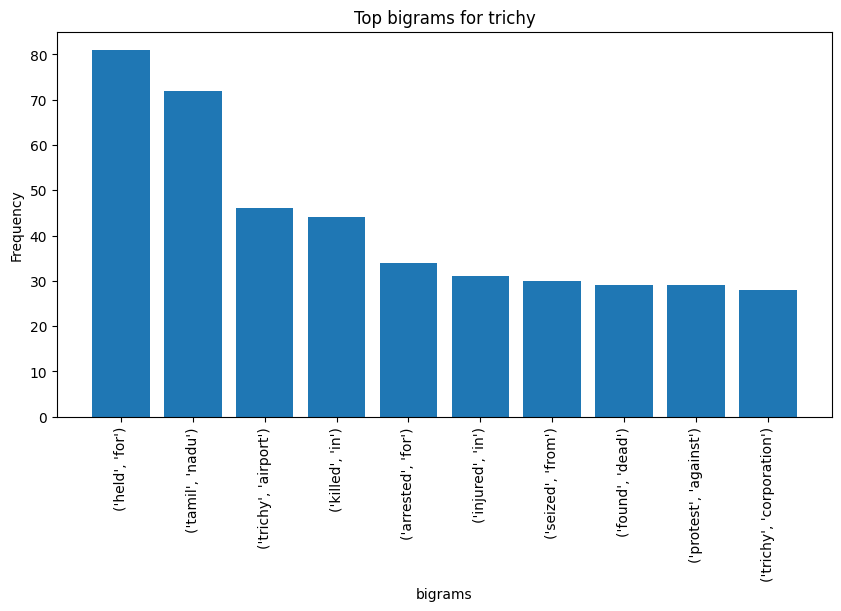

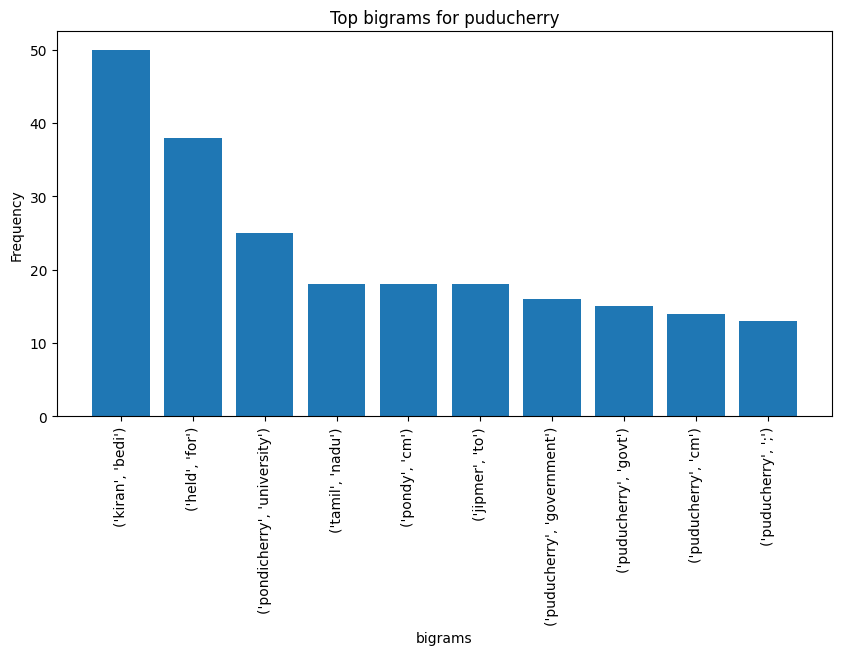

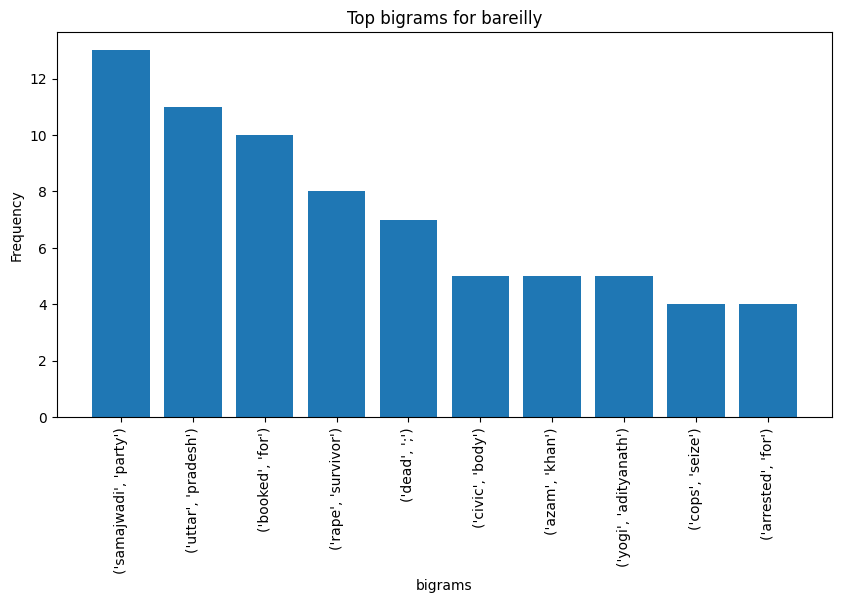

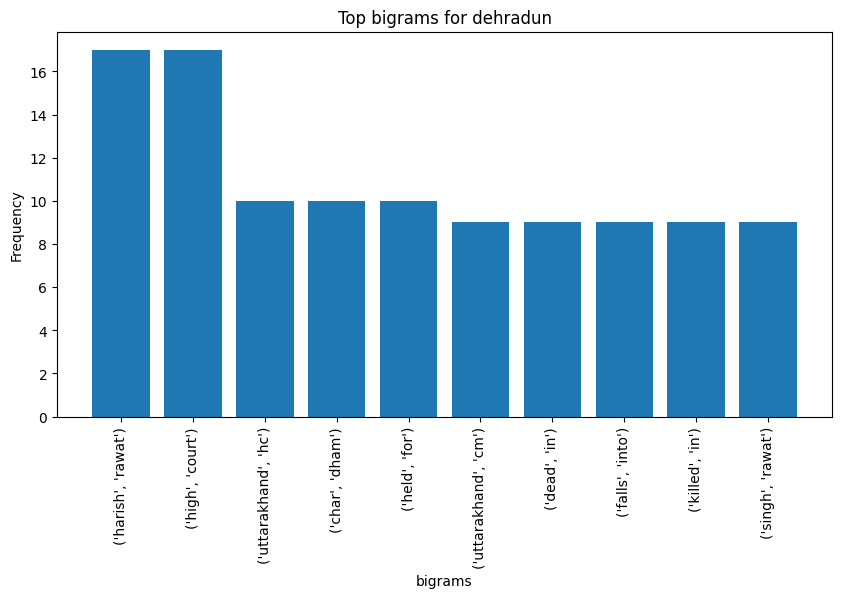

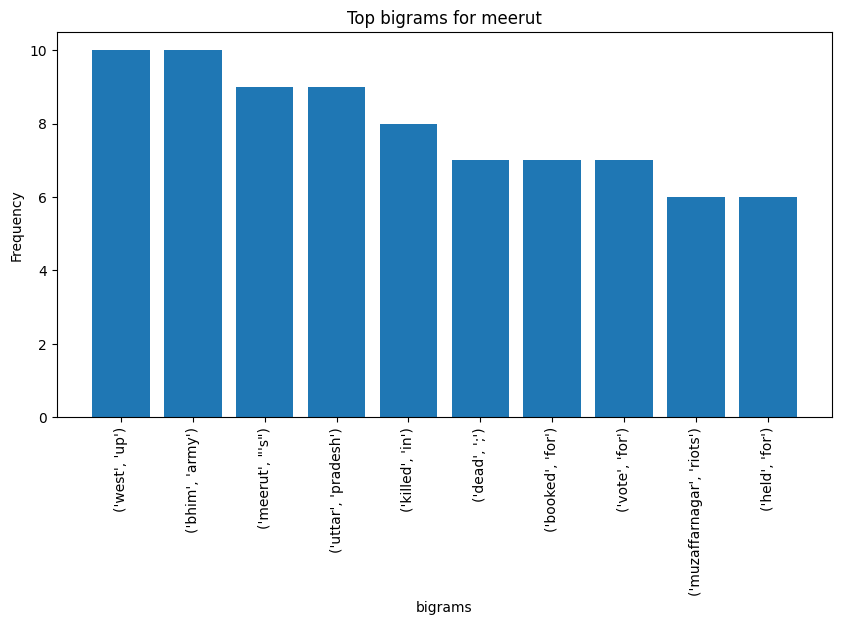

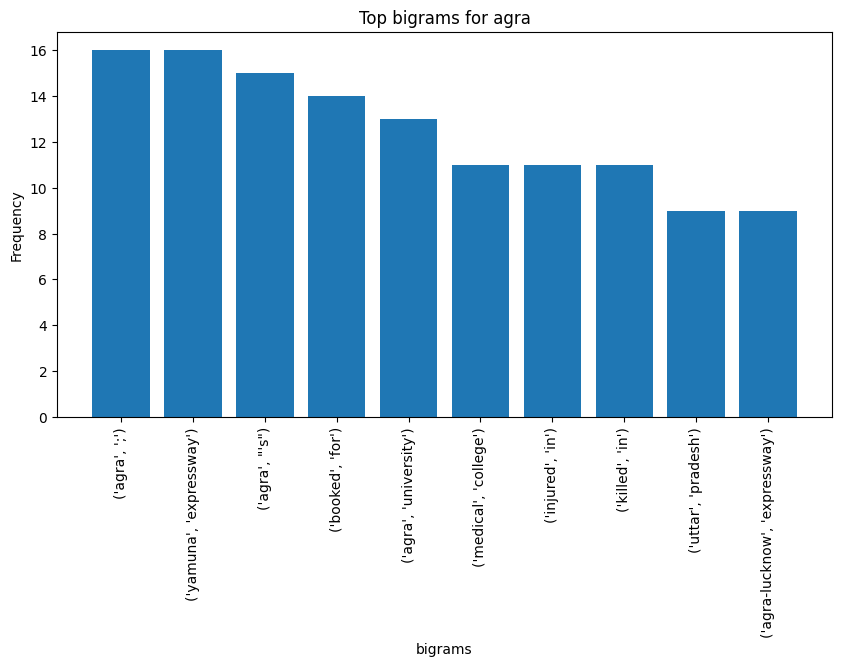

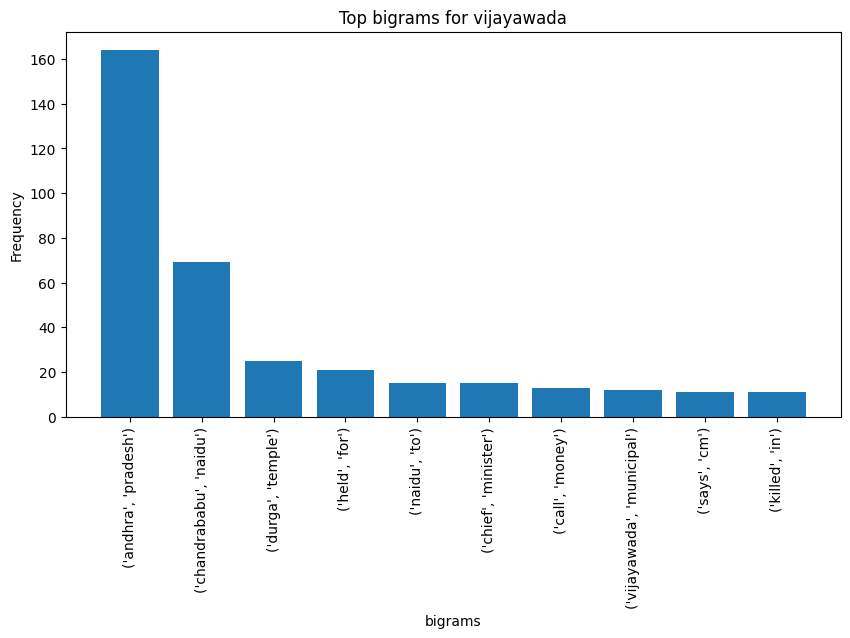

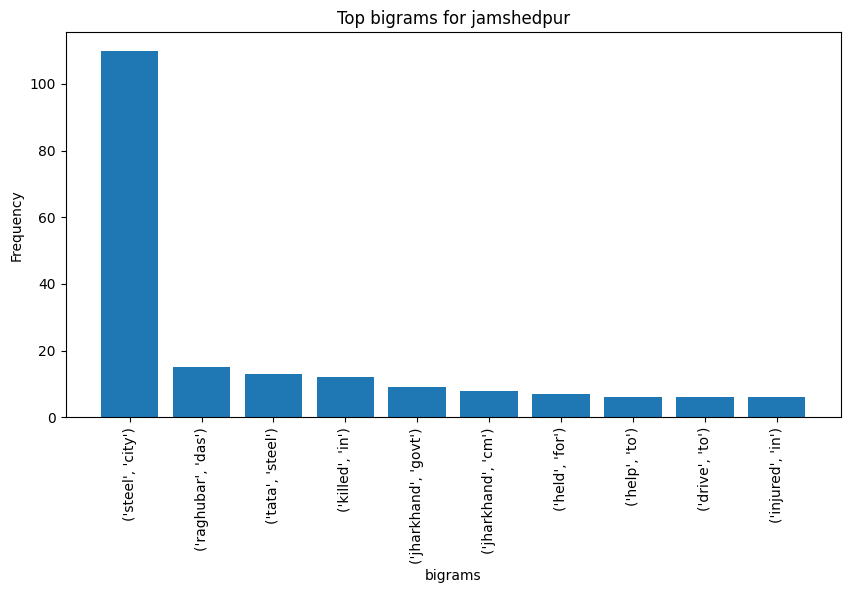

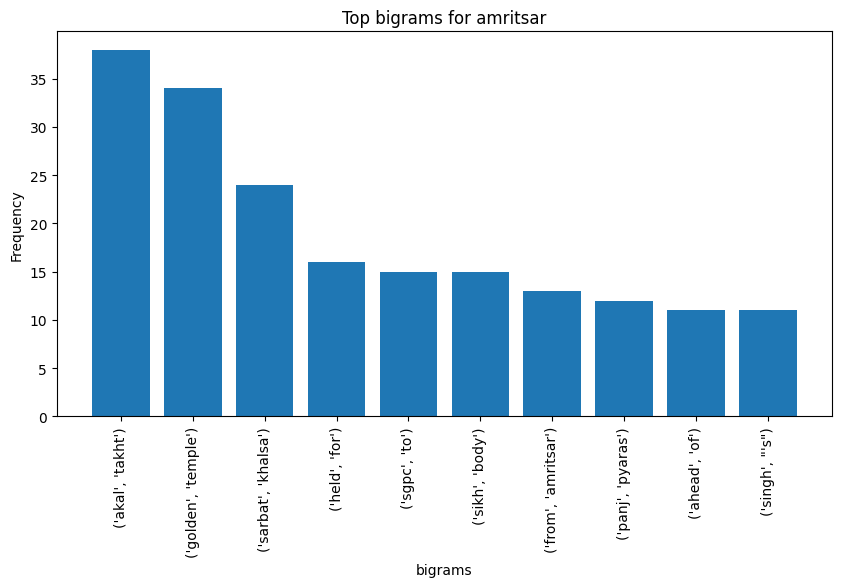

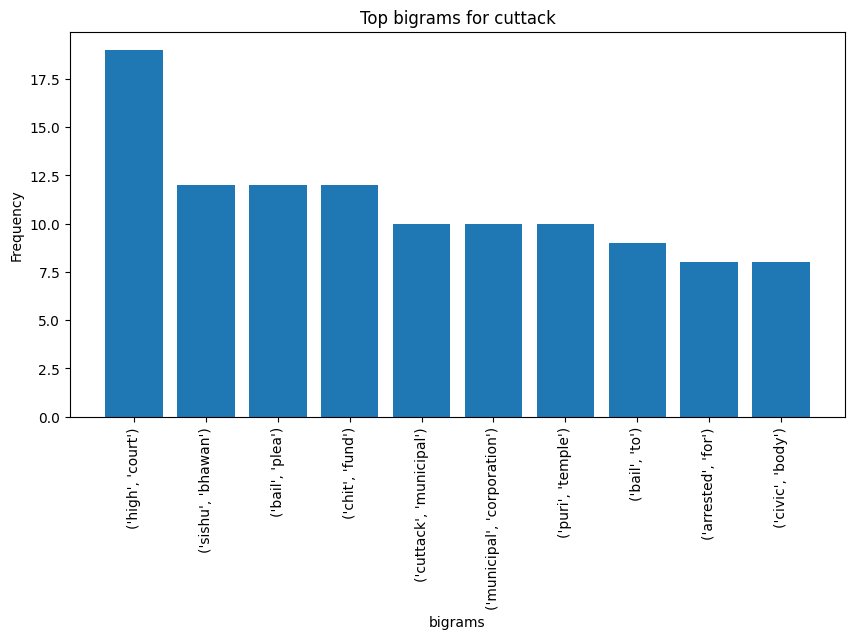

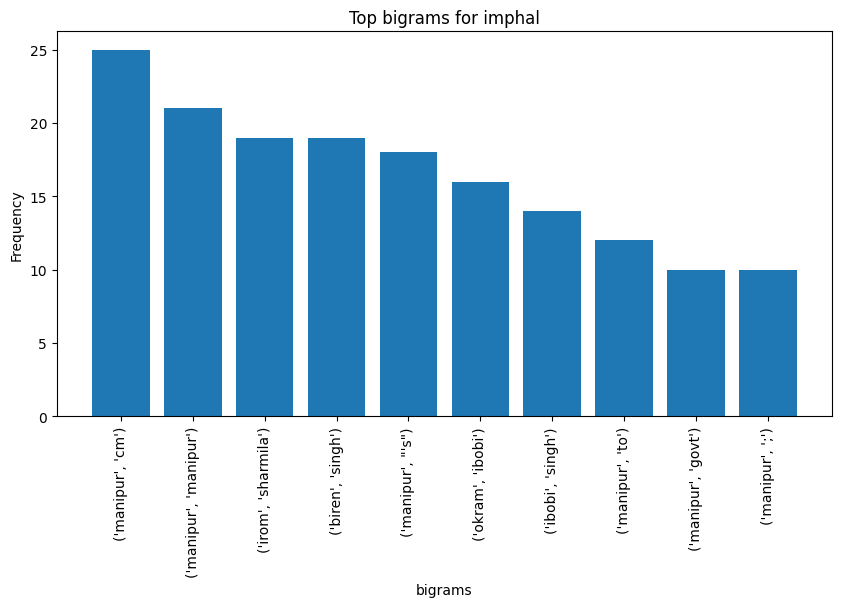

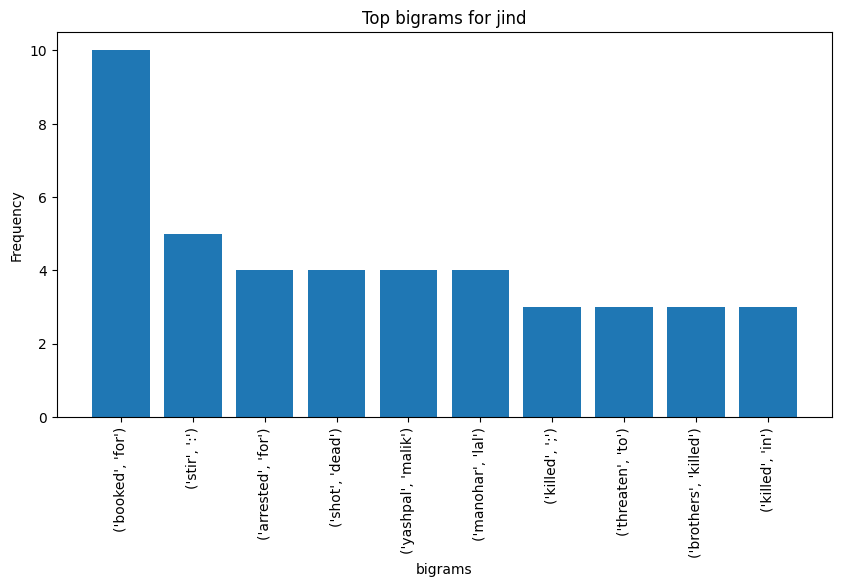

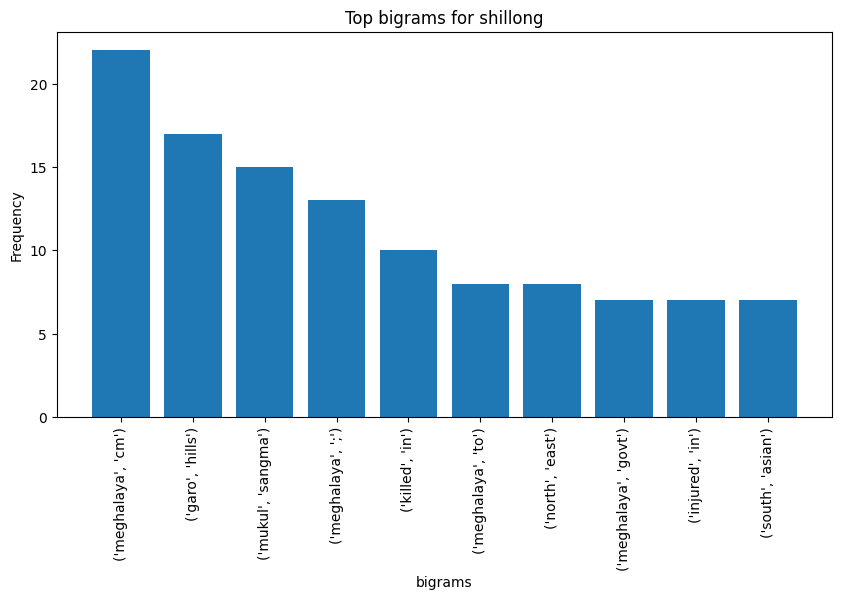

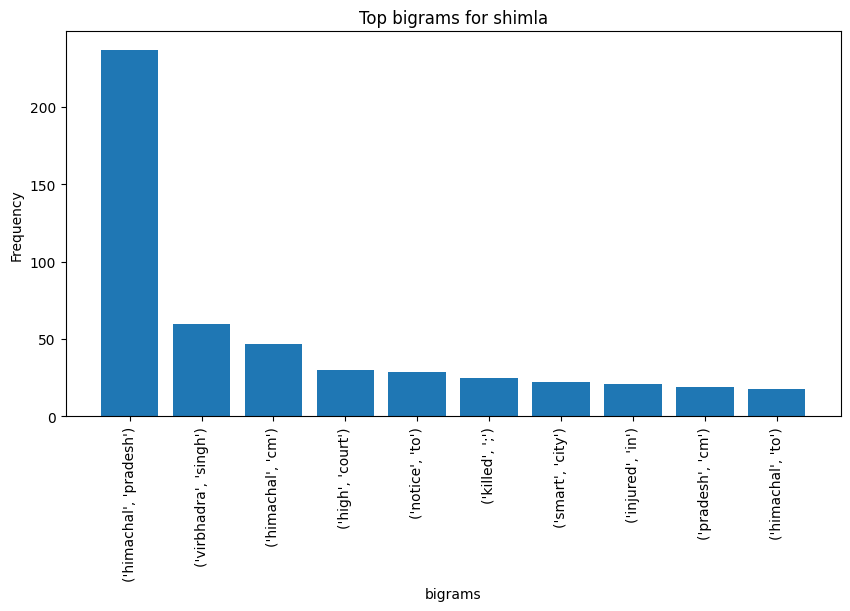

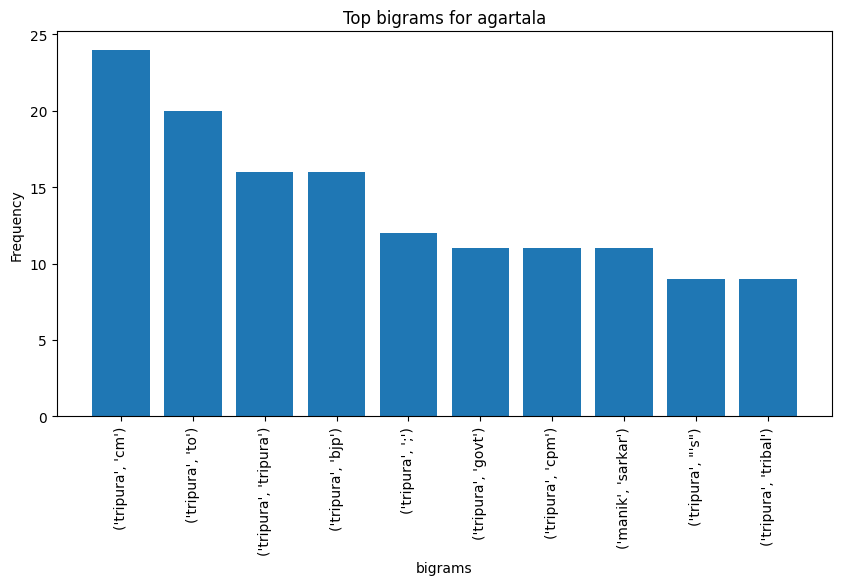

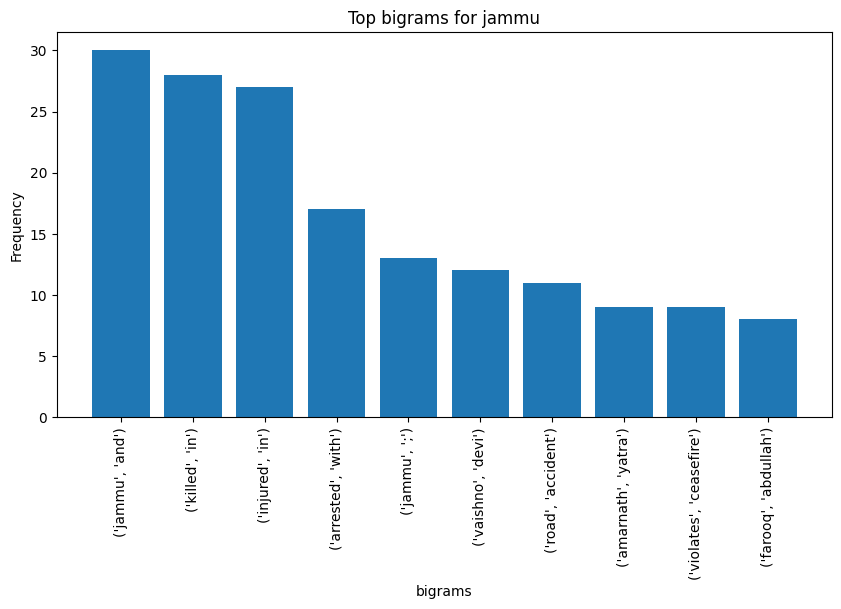

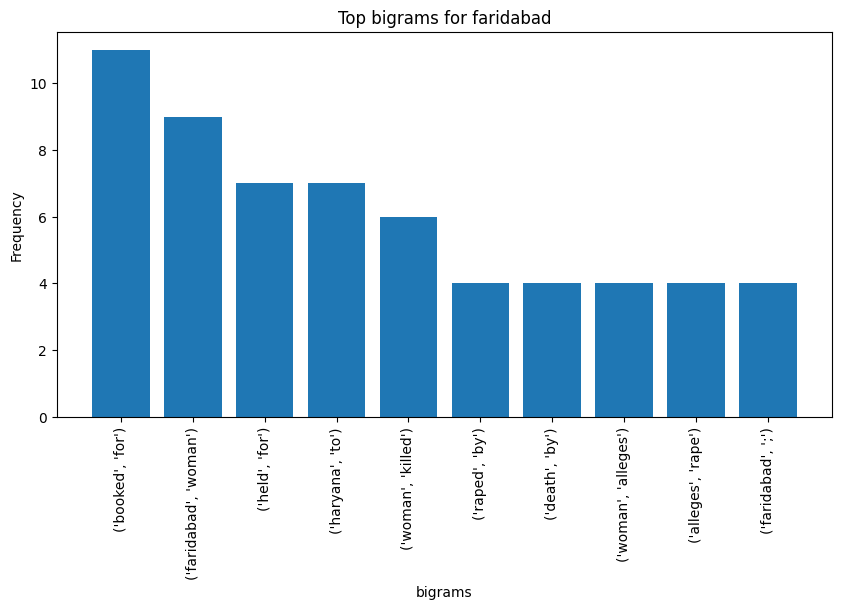

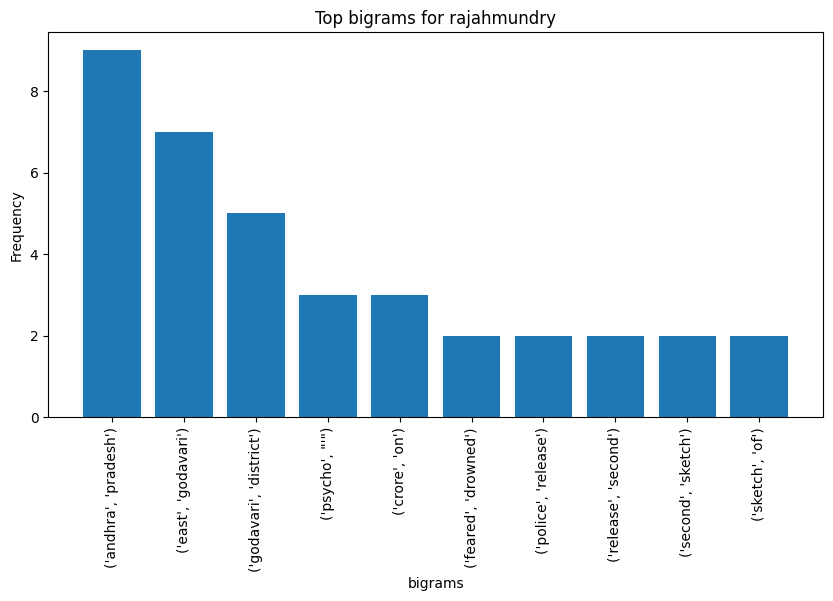

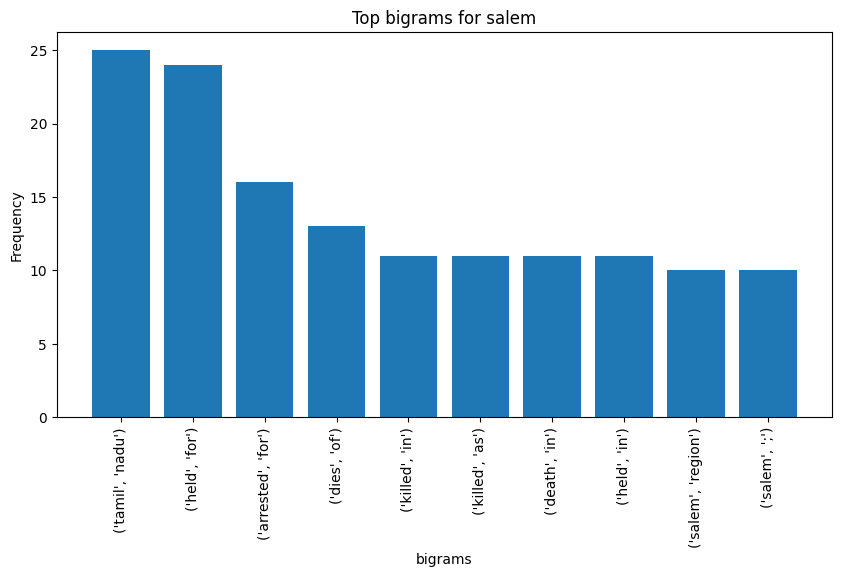

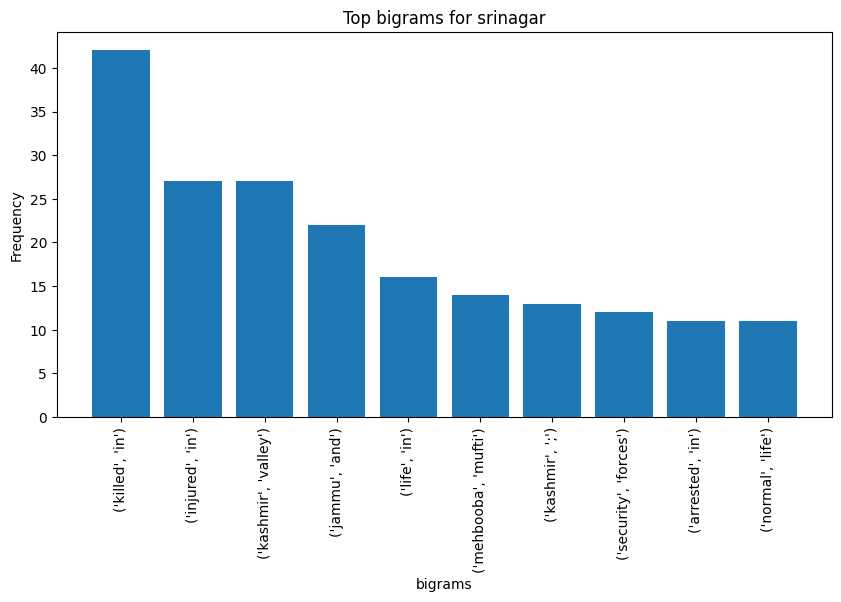

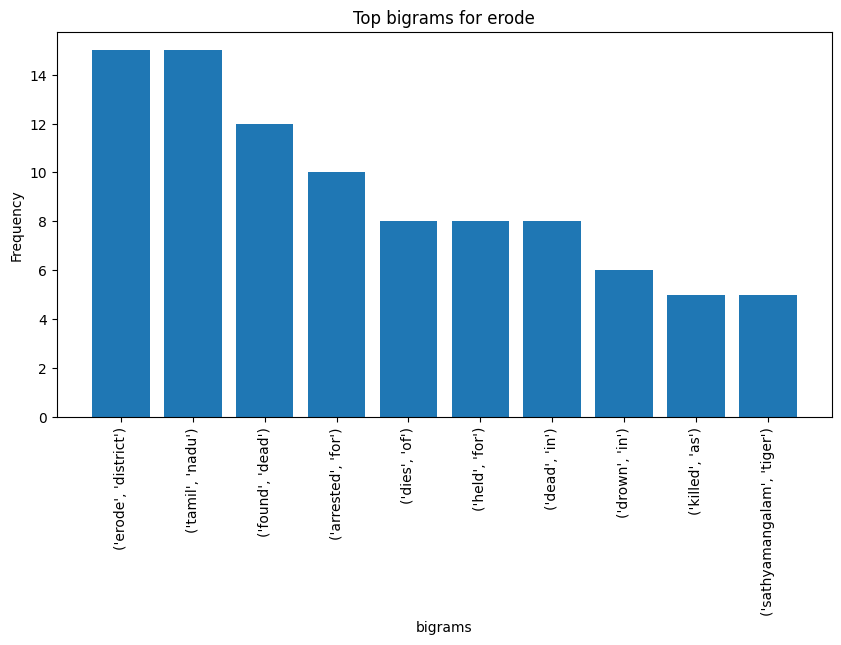

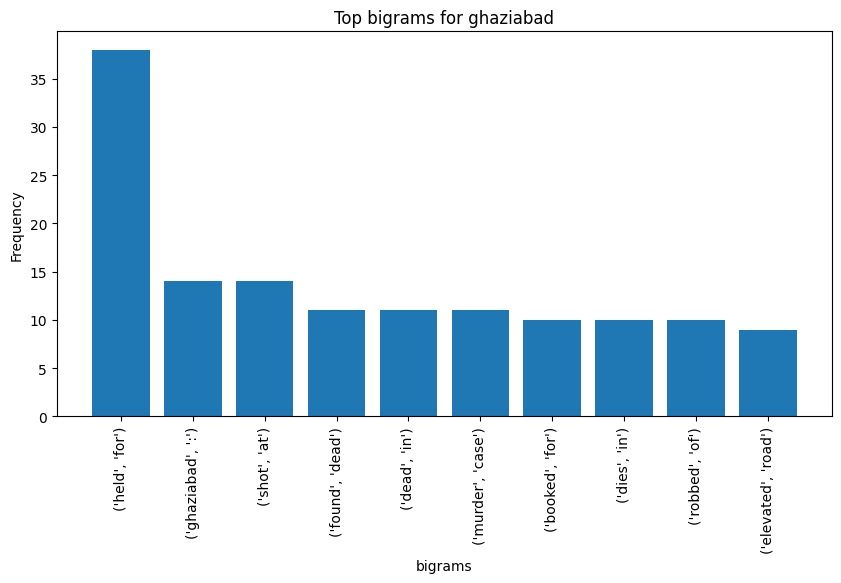

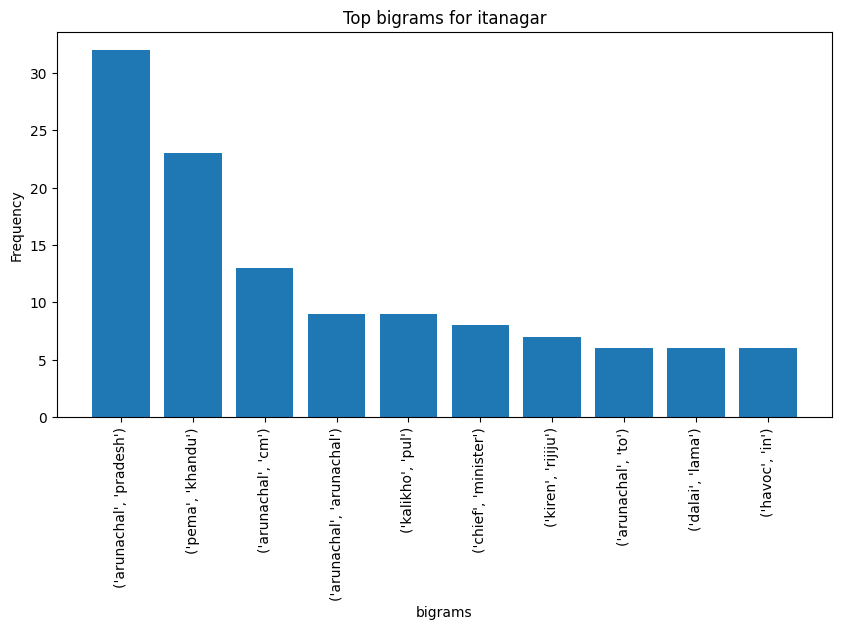

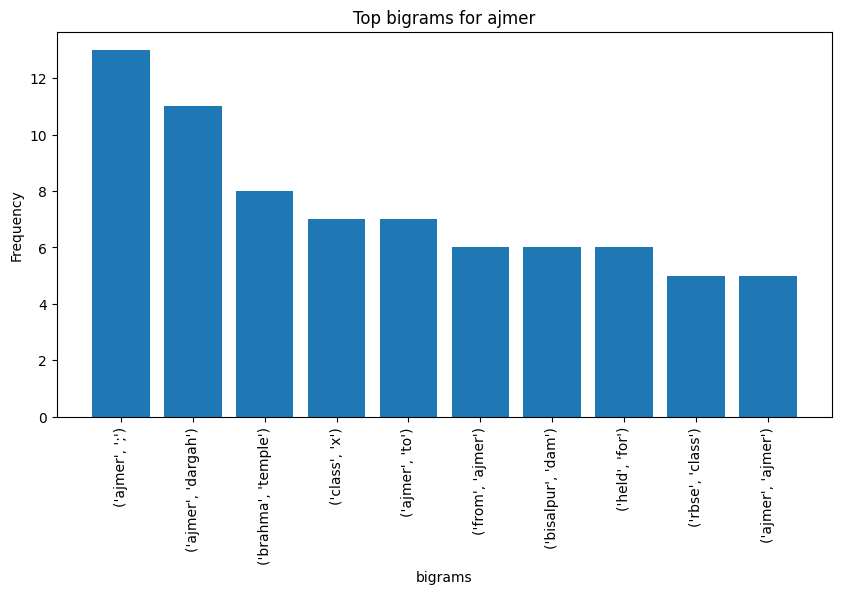

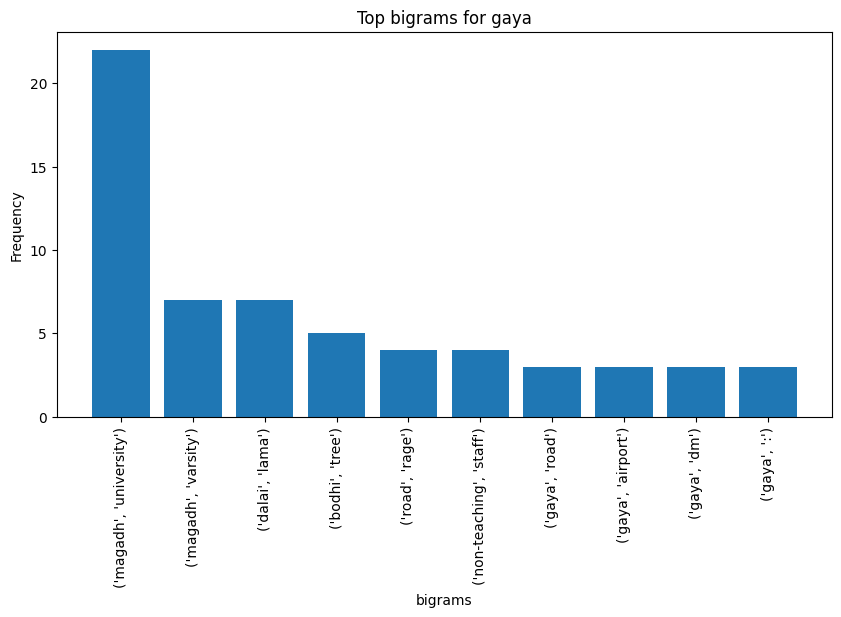

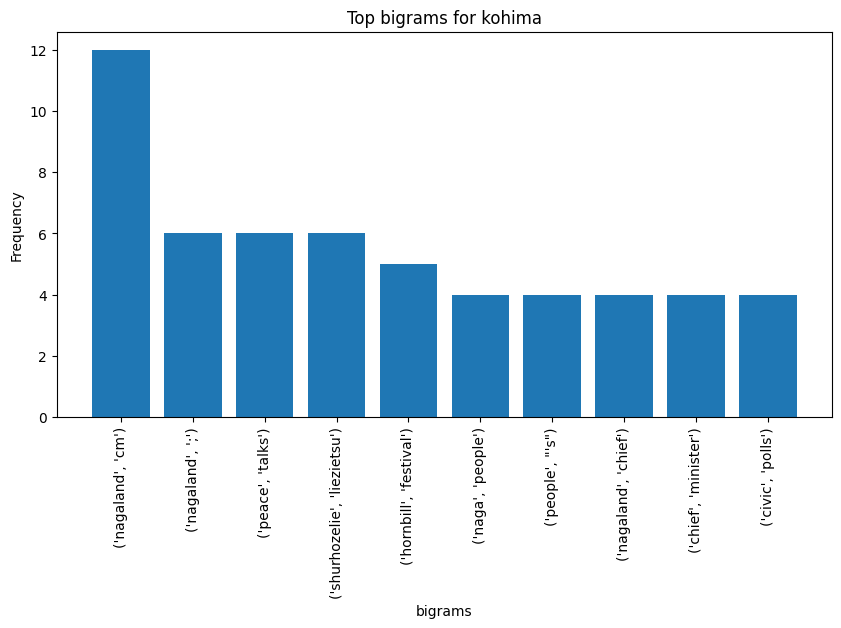

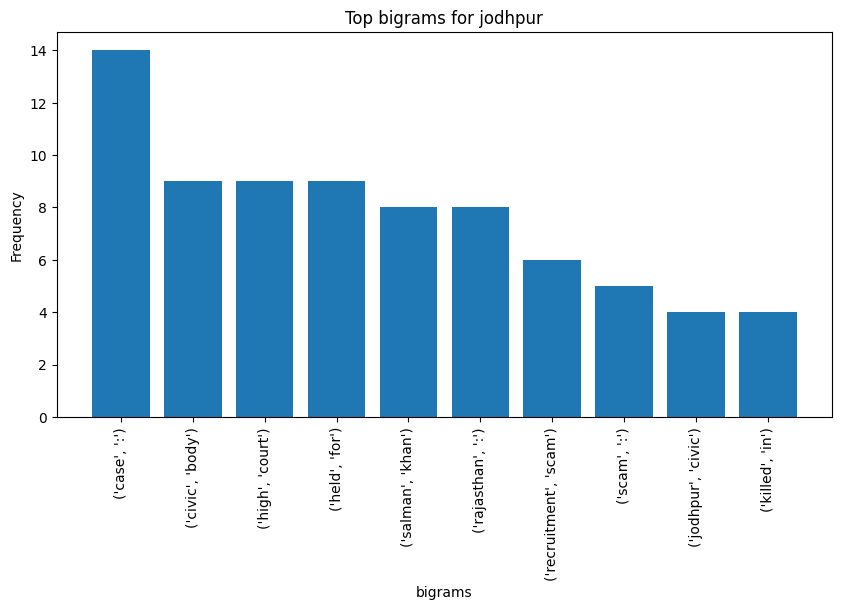

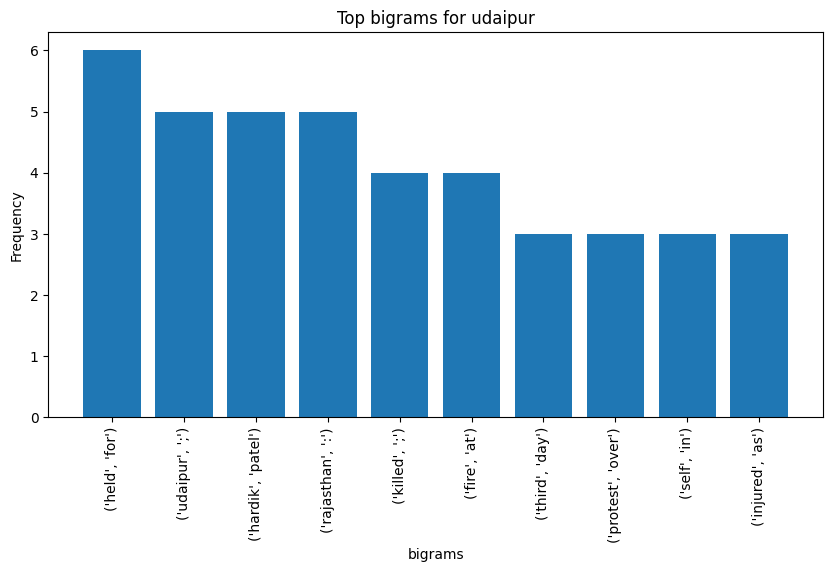

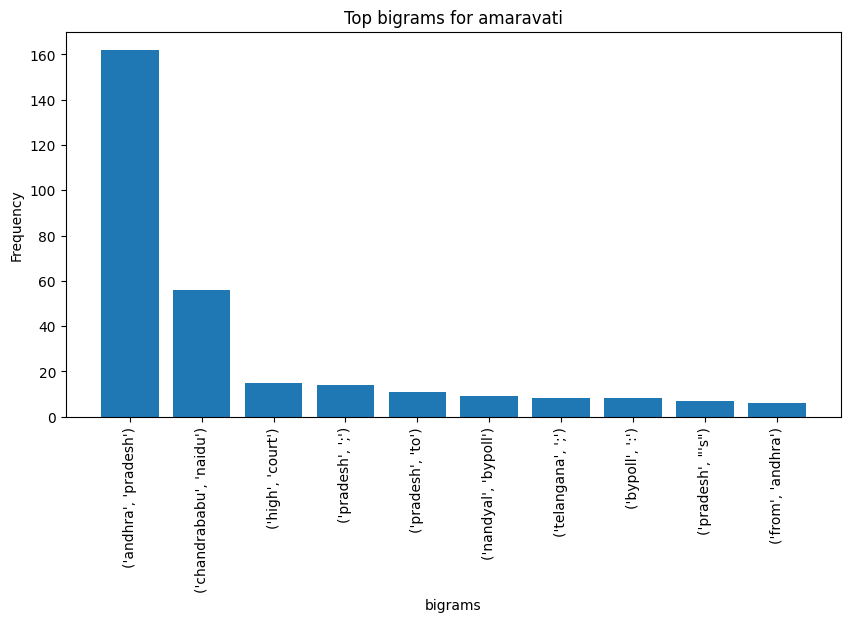

In [ ]:
# plot the frequency of the top unigrams for each city
for i, row in top_ngrams_df.iterrows():
    top_bigrams = row['top_bigrams']
    frequencies = [row['bigram_freq'][bigrams] for bigrams in top_bigrams]
    x_labels = [str(bigram) for bigram in top_bigrams]
    plt.figure(figsize=(10, 5))
    plt.bar(x_labels, frequencies)
    plt.xticks(rotation=90)
    plt.xlabel('bigrams')
    plt.ylabel('Frequency')
    plt.title(f"Top bigrams for {row['city_name']}")
    plt.show()